In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<div>
    <h1> <a id="Obj1">🎯Objectives</a></h1>
    <h3 style="text-align:justify; font-family: Calibri">Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). <br></h3>  
  
<p style = "font-family: Arial; font-size: 14px">Note: This project's dataset was created for pedagogical purposes and may not be indicative of the task .</p>
<hr>

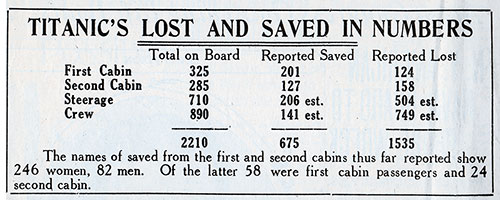

<div class="alert alert-block alert-warning">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">We must maintain objectivity when analyzing the data to gain valuable insights. This involves collecting, fact-checking, and challenging the data and other sources. Adopting a Genchi Genbutsu approach, which involves go-seeing for yourself or discussing with subject matter experts, allows us to delve into the data to gain firsthand understanding.</p>
    <p>Data should adhere to the <b>COV-FAST</b> principles: Clear, Objective, Valuable, Focused, Agile, Scientific, and Time-bound and Trustworthiness. Additionally, consider exploring alternative models such as logistic regression, random forest, neural networks, or others.</p>
</div>
    <h3>Framework and Methodologies</h3>
     A <b>methodology</b> offers <b>specific steps</b> for completing a project, while a <b>framework</b> provides broader guidance on tools, resources, and workflow processes. As an experienced Green Belt Lean Six Sigma professional, the methodology that I often use is DMAIC. I use PACE as a framework as I found it similar to <b>Knowledge Discovery in Databases (KDD)</b>. Both <b>PACE</b> and <b>KDD</b> aim to guide structured data projects. <b>PACE</b> specifically focuses on machine learning projects, whereas <b>KDD</b> covers a broader range of data discovery techniques.
     
<h3>Data Analysis PACE Steps:</h3>
   <ol style="font-family:Verdana; font-size:16px">
    <li><img style="float:left" src="https://i.imgur.com/gIne5bH.png" width="50"> Plan/Prepare - import the relevant libraries and data</li> 
    <blockquote>
    <ol>Align project with business needs, requirements and contraints. Select an approriate machine learning model based on the problem and business context. KDD: Selection, and Data Wrangling (Pre-processing and Transformation).
    </ol>
    </blockquote>
        <li><img style="float:left" src="https://i.imgur.com/rb8V6X5.png" width="50">Analyze - EDA</li>
    <blockquote>
    <ol> Understanding data for accurate predictions, focus on the response variable (what the model predicts) and leverage exploratory data analysis to uncover patterns and address irregularities. KDD: Data Mining.
     </ol>
    </blockquote>
    <li><img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">Construct - model </li>
    <blockquote>
    <ol>Construct and evaluate model. KDD: Evaluation.
     </ol>
    </blockquote>
    <li><img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50">Execute - share</li>
    <blockquote>
    <ol>Interpret model and share the story. KDD: Communicate to stakeholders.
     </ol>
    </blockquote>

<a id="top"></a>
<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">

<ol>
    <li><a href="#Obj1">Objectives</a></li>
    <li><a href="#Plan">Plan - import the relevant libraries and data</a></li>
    <ul>
        <li><a href="#Def">Data Info</a></li>
        <li><a href="#Clea">Data Cleaning</a></li>  
    </ul>
    <li><a href="#EDA">Explarotary Data Analysis (EDA)</a></li>
    <ul>
        <li><a href="#EDA_1">Explarotary Data Analysis (EDA)</a></li>
    </ul>
    <li><a href="#Construct">Construct - model</a></li>
    <ul>
        <li><a href="#Log_Reg">Task002-P01-ML-Titanic-20250516</a></li>
    </ul>
    <li><a href="#Exe">Execute - share</a></li>
    <ul>
        <li><a href="#Sum">Summary </a></li>
    </ul>
</ol>
</div>

<img style="float:left" src="https://i.imgur.com/gIne5bH.png" width="50">

<h1><a id="Plan">Plan -import the relevant libraries and data</a></h1> 

In [2]:
# For linear algebra and data processing (available in kaggle)
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import math
%matplotlib inline

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For text WordCloud package
from wordcloud import WordCloud
import re # Fill missing or only-letter

# For statistic: distribution, process capability and control chart
from scipy import stats # statistics

# For geo data visualization

# For data modeling

# For saving models

<h2><a id="Def">Data Info</a></h2>
<h3 style="text-align:justify; font-family: Calibri"><br> Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”. <br> 
    <br>  The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.  <br> 
   <br>   Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.  <br> 
  <br>    Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.</h3>

### Features info

In [3]:
# Define the data as a list of dictionaries
features_data = [
    {"Var": "survival", "Def": "Survival", "Key": "0 = No, 1 = Yes"},
    {"Var": "pclass", "Def": "Ticket class", "Key": "1 = Upper, 2 = Middle, 3 = Lower"},
    {"Var": "sex", "Def": "Sex", "Key": ""},
    {"Var": "Age", "Def": "Age in years", "Key": ""},
    {"Var": "sibsp", "Def": "# of siblings / spouses aboard the Titanic", "Key": ""},
    {"Var": "parch", "Def": "# of parents / children aboard the Titanic", "Key": ""},
    {"Var": "ticket", "Def": "Ticket number", "Key": ""},
    {"Var": "fare", "Def": "Passenger fare", "Key": ""},
    {"Var": "cabin", "Def": "Cabin number", "Key": ""},
    {"Var": "embarked", "Def": "Port of Embarkation", "Key": "C = Cherbourg, Q = Queenstown, S = Southampton"},
]

# Create the DataFrame
df_features_info = pd.DataFrame(features_data)

# Display the DataFrame
print(df_features_info)

        Var                                         Def  \
0  survival                                    Survival   
1    pclass                                Ticket class   
2       sex                                         Sex   
3       Age                                Age in years   
4     sibsp  # of siblings / spouses aboard the Titanic   
5     parch  # of parents / children aboard the Titanic   
6    ticket                               Ticket number   
7      fare                              Passenger fare   
8     cabin                                Cabin number   
9  embarked                         Port of Embarkation   

                                              Key  
0                                 0 = No, 1 = Yes  
1                1 = Upper, 2 = Middle, 3 = Lower  
2                                                  
3                                                  
4                                                  
5                                     

In [4]:
def features_info(col_name):
    row = df_features_info[df_features_info['Var']== col_name]
    if not row.empty:
        print('Definition:', row.iloc[0]['Def'])
        print('Key:', row.iloc[0]['Key'])
    else:
        print(f"'{col_name}' not found in feature info.")

In [5]:
features_info("sibsp")

Definition: # of siblings / spouses aboard the Titanic
Key: 


In [6]:
features_info("parch")

Definition: # of parents / children aboard the Titanic
Key: 


In [7]:
df_features_info.head()

Var                                         Def  \
0  survival                                    Survival   
1    pclass                                Ticket class   
2       sex                                         Sex   
3       Age                                Age in years   
4     sibsp  # of siblings / spouses aboard the Titanic   

                                Key  
0                   0 = No, 1 = Yes  
1  1 = Upper, 2 = Middle, 3 = Lower  
2                                    
3                                    
4

### Load the data

In [8]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df['train_set'] = 1
test_df['train_set'] = 0
test_df['Survived']=np.NAN

all_data_df = pd.concat([train_df,test_df])

In [9]:
train_df.sample(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


PassengerId  Survived  Pclass  \
384          385         0       3   
702          703         0       3   
313          314         0       3   
415          416         0       3   
821          822         1       3   
710          711         1       1   
846          847         0       3   
838          839         1       3   
601          602         0       3   
199          200         0       2   

                                                 Name     Sex   Age  SibSp  \
384                            Plotcharsky, Mr. Vasil    male   NaN      0   
702                             Barbara, Miss. Saiide  female  18.0      0   
313                            Hendekovic, Mr. Ignjac    male  28.0      0   
415           Meek, Mrs. Thomas (Annie Louise Rowley)  female   NaN      0   
821                                 Lulic, Mr. Nikola    male  27.0      0   
710  Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  female  24.0      0   
846                          Sage, Mr. Douglas Bullen    male   NaN      8   
838                                   Chip, Mr. Chang    male  32.0      0   
601                              Slabenoff, Mr. Petco    male   NaN      0   
199            Yrois, Miss. Henriette ("Mrs Harbeck")  female  24.0      0   

     Parch    Ticket     Fare Cabin Embarked  train_set  
384      0    349227   7.8958   NaN        S          1  
702      1      2691  14.4542   NaN        C          1  
313      0    349243   7.8958   NaN        S          1  
415      0    343095   8.0500   NaN        S          1  
821      0    315098   8.6625   NaN        S          1  
710      0  PC 17482  49.5042   C90        C          1  
846      2  CA. 2343  69.5500   NaN        S          1  
838      0      1601  56.4958   NaN        S          1  
601      0    349214   7.8958   NaN        S          1  
199      0    248747  13.0000   NaN        S          1

In [10]:
test_df.sample(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


PassengerId  Pclass                                              Name  \
59           951       1                       Chaudanson, Miss. Victorine   
93           985       3                                 Guest, Mr. Robert   
71           963       3                                Minkoff, Mr. Lazar   
365         1257       3                    Sage, Mrs. John (Annie Bullen)   
153         1045       3    Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)   
225         1117       3  Moubarek, Mrs. George (Omine Amenia" Alexander)"   
198         1090       2                    Baimbrigge, Mr. Charles Robert   
399         1291       3                          Conlon, Mr. Thomas Henry   
331         1223       1                      Dulles, Mr. William Crothers   
398         1290       3                    Larsson-Rondberg, Mr. Edvard A   

        Sex   Age  SibSp  Parch      Ticket      Fare Cabin Embarked  \
59   female  36.0      0      0    PC 17608  262.3750   B61        C   
93     male   NaN      0      0      376563    8.0500   NaN        S   
71     male  21.0      0      0      349211    7.8958   NaN        S   
365  female   NaN      1      9    CA. 2343   69.5500   NaN        S   
153  female  36.0      0      2      350405   12.1833   NaN        S   
225  female   NaN      0      2        2661   15.2458   NaN        C   
198    male  23.0      0      0  C.A. 31030   10.5000   NaN        S   
399    male  31.0      0      0       21332    7.7333   NaN        Q   
331    male  39.0      0      0    PC 17580   29.7000   A18        C   
398    male  22.0      0      0      347065    7.7750   NaN        S   

     train_set  Survived  
59           0       NaN  
93           0       NaN  
71           0       NaN  
365          0       NaN  
153          0       NaN  
225          0       NaN  
198          0       NaN  
399          0       NaN  
331          0       NaN  
398          0       NaN

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_set    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [12]:
train_df.describe(include='all').transpose()

count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   
train_set    891.0    NaN                      NaN  NaN        1.0   

                    std   min     25%      50%    75%       max  
PassengerId  257.353842   1.0   223.5    446.0  668.5     891.0  
Survived       0.486592   0.0     0.0      0.0    1.0       1.0  
Pclass         0.836071   1.0     2.0      3.0    3.0       3.0  
Name                NaN   NaN     NaN      NaN    NaN       NaN  
Sex                 NaN   NaN     NaN      NaN    NaN       NaN  
Age           14.526497  0.42  20.125     28.0   38.0      80.0  
SibSp          1.102743   0.0     0.0      0.0    1.0       8.0  
Parch          0.806057   0.0     0.0      0.0    0.0       6.0  
Ticket              NaN   NaN     NaN      NaN    NaN       NaN  
Fare          49.693429   0.0  7.9104  14.4542   31.0  512.3292  
Cabin               NaN   NaN     NaN      NaN    NaN       NaN  
Embarked            NaN   NaN     NaN      NaN    NaN       NaN  
train_set           0.0   1.0     1.0      1.0    1.0       1.0

In [13]:
train_df.describe().transpose()

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   
train_set    891.0    1.000000    0.000000  1.00    1.0000    1.0000    1.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  
train_set      1.0000

[go to top](#top)  

<h2><a id="Clea">Data Cleaning</a></h2>

### Missing values

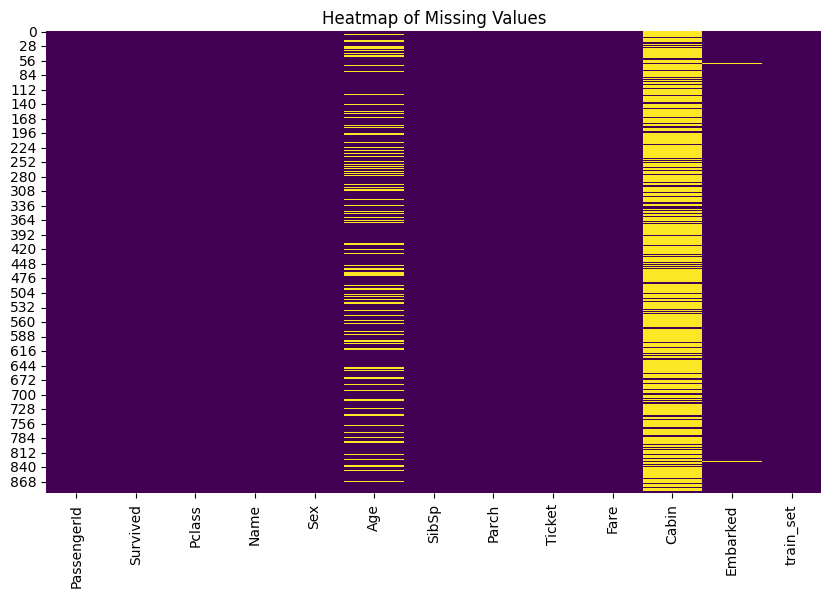

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(),cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [15]:
train_df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
train_set       0.000000
dtype: float64

Missing values are `Age` (19.87%), `Cabin`(77.1%) and `Embarked`(0.25%)

In [16]:
features_info('embarked')

Definition: Port of Embarkation
Key: C = Cherbourg, Q = Queenstown, S = Southampton


In [17]:
features_info('cabin')

Definition: Cabin number
Key: 


#### Explore the missing values

In [18]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
train_df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [20]:
train_df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

#### Distribute NaN values
##### Embarked (2%)

In [21]:
embarked_counts = train_df['Embarked'].value_counts(normalize=True)
print(f'Embarked proportions:\n:', embarked_counts)

Embarked proportions:
: Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


In [22]:
missing_counts = train_df['Embarked'].isna().sum()
print(f'Missing Embarked values:', missing_counts)

Missing Embarked values: 2


##### Distribute NaN Values to the highest `Embarked`

In [23]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [24]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [25]:
all_data_df['Embarked'] = all_data_df['Embarked'].fillna(all_data_df['Embarked'].mode()[0])

##### Age (20%)

In [26]:
train_df['Age'].isna().sum()

177

In [27]:
# Count how many people have Age > 17
age_above_17_count = train_df[train_df['Age'] > 17].shape[0]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [28]:
age_above_17_count

601

#### Explore distibution of age
##### Explore the baseline of Age

In [29]:
def plot_num_graph(data, target_col, feat_num):
    """
    Plots a boxplot and a histogram of a numerical feature with respect to a target column.
    
    Parameters:
    - data: pd.DataFrame
    - target_col: str, column name to group by (x in boxplot, hue in histplot)
    - feat_num: str, column name of the numerical feature to plot
    """

    # Set colorblind-friendly palette
    cb_palette = sns.color_palette("colorblind")
    sns.set_palette(cb_palette)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Boxplot
    sns.boxplot(data=data, x=target_col, y=feat_num, ax=axes[0])
    axes[0].set_title(f'{feat_num} Boxplot by {target_col}')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel(feat_num)

    # Histogram + KDE
    sns.histplot(data=data, x=feat_num, hue=target_col, kde=True,
                 bins=30, multiple='stack', ax=axes[1])
    axes[1].set_title(f'{feat_num} Distribution by {target_col}')
    axes[1].set_xlabel(feat_num)
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

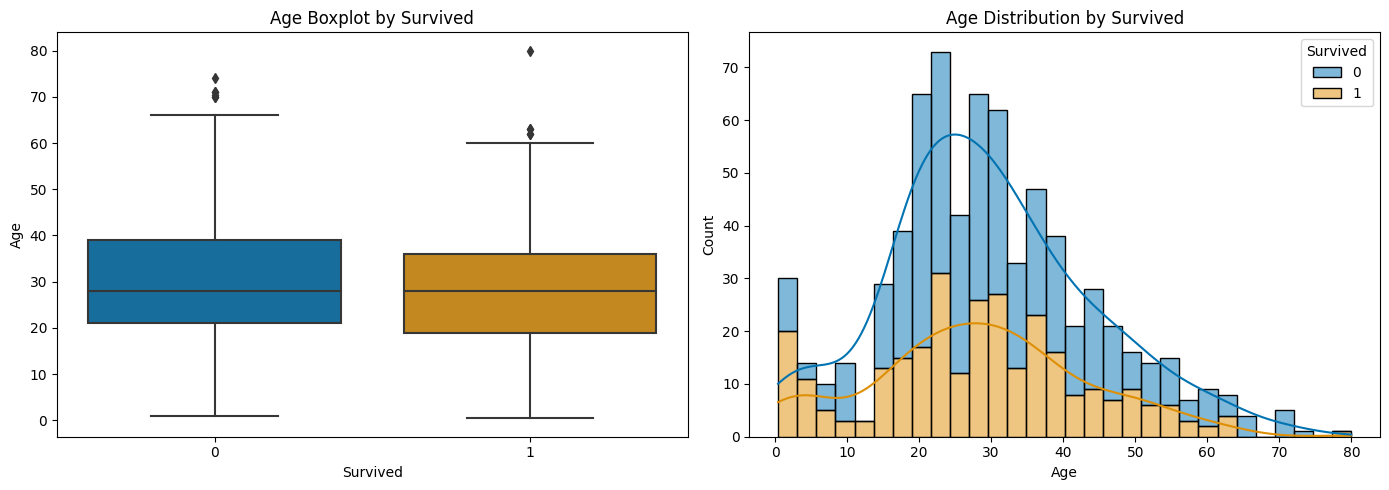

In [30]:
plot_num_graph(train_df, target_col='Survived', feat_num='Age')

In [31]:
# Bin ages into categories to simplify visualization
#age_bins = [0, 12, 18, 30, 50, 80]
#age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
#train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels)

In [32]:
def age_bins(df):
    """
    Assigns AgeGroup labels to passengers based on predefined age bins.
    Returns a DataFrame with a new column 'AgeGroup'.
    """
    # Define bins and labels
    age_bins = [0, 12, 18, 30, 50, 80]
    age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

    # Apply binning only to non-null ages
    df['AgeGroup'] = pd.cut(df['Age'],
                            bins=age_bins,
                            labels=age_labels,
                            right=False,  # Change to True for upper-bound inclusive
                            include_lowest=True)

    return df

In [33]:
# Binning preparing for the graph
train_df = age_bins(train_df)

In [34]:
def plot_num_stacked(data, group1, group2, target='Survived'):
    """
    Plots a stacked bar chart of counts and percentages grouped by two categorical features.
    
    Parameters:
    - data: pd.DataFrame
    - group1: str, first grouping column (e.g., 'AgeGroup')
    - group2: str, second grouping column (e.g., 'Sex')
    - target: str, binary target column (default='Survived')
    """

    # Set colorblind-friendly palette
    cb_colors = sns.color_palette("colorblind")[:2]

    # Crosstab of group1 + group2 vs target
    ct_counts = pd.crosstab(index=[data[group1], data[group2]], columns=data[target])

    # Rename target class columns for clarity if binary (0/1)
    if set(ct_counts.columns) == {0, 1}:
        ct_counts.columns = [f'Not {target}', target]

    # Ensure consistent order
    ct_counts = ct_counts[sorted(ct_counts.columns)]

    # Calculate row-wise percentages
    ct_percent = ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100

    # Plot stacked bar chart
    ax = ct_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=cb_colors[::-1])  # Blue first
    plt.title(f"{target} Count and Percentage by {group1} and {group2}")
    plt.ylabel("Count")
    plt.xlabel(f"{group1} and {group2}")
    plt.xticks(rotation=45)

    # Annotate bars
    for bar_idx, (count_vals, percent_vals) in enumerate(zip(ct_counts.values, ct_percent.values)):
        cumulative_height = 0
        for i, (count, pct) in enumerate(zip(count_vals, percent_vals)):
            if count > 0:
                cumulative_height += count
                ax.text(bar_idx, cumulative_height - count / 2,
                        f'{int(count)}\n({pct:.1f}%)',
                        ha='center', va='center', fontsize=9, color='white', weight='bold')

    plt.tight_layout()
    plt.show()

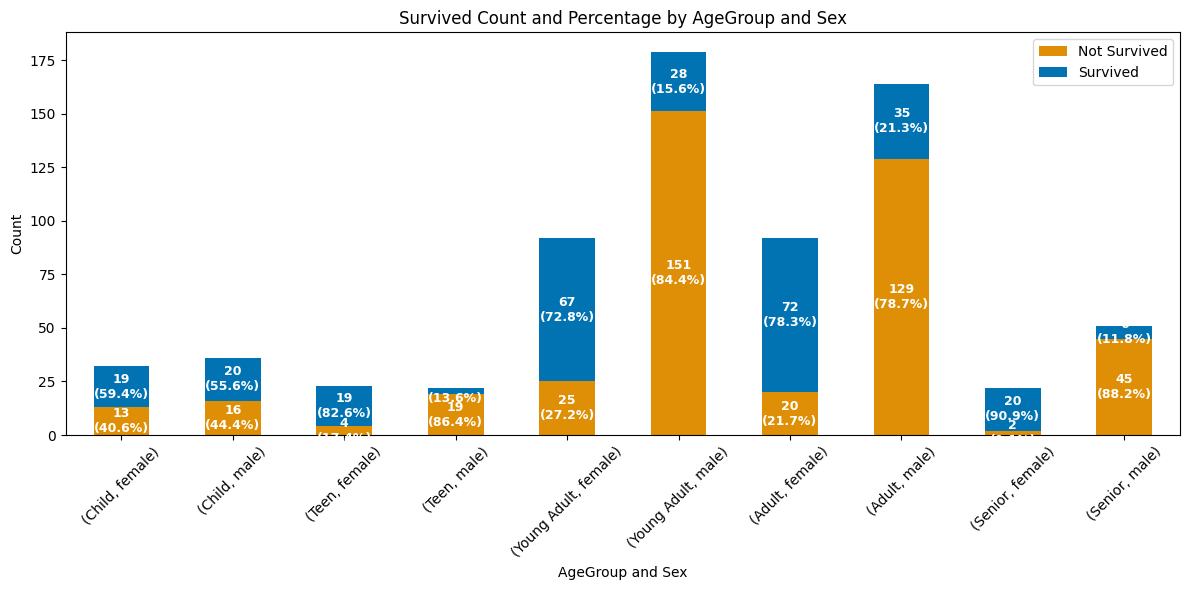

In [35]:
plot_num_stacked(train_df, group1='AgeGroup', group2='Sex')

In [36]:
# Crosstab of group1 + group2 vs target
ct_counts = pd.crosstab(index=[train_df['AgeGroup'], train_df['Sex']], columns=train_df['Survived'])

# Total the crosstab ct_counts
ct_counts['Total'] = ct_counts.sum(axis=1)
ct_counts

Survived              0   1  Total
AgeGroup    Sex                   
Child       female   13  19     32
            male     16  20     36
Teen        female    4  19     23
            male     19   3     22
Young Adult female   25  67     92
            male    151  28    179
Adult       female   20  72     92
            male    129  35    164
Senior      female    2  20     22
            male     45   6     51

##### Distribute missing `Age` values evenly up to 50% cumulative frequency

In [37]:
# Get value counts and cumulative distribution of known ages
age_counts = train_df['Age'].dropna().value_counts(normalize=True).sort_values(ascending=False)
cumulative_age = age_counts.cumsum()

# Select ages contributing to the first 50% of the data
top_ages = cumulative_age[cumulative_age < 0.51].index.tolist()

In [38]:
cumulative_age

Age
24.00    0.042017
22.00    0.079832
18.00    0.116246
19.00    0.151261
28.00    0.186275
           ...   
66.00    0.994398
0.67     0.995798
0.42     0.997199
34.50    0.998599
74.00    1.000000
Name: proportion, Length: 88, dtype: float64

In [39]:
top_ages

[24.0,
 22.0,
 18.0,
 19.0,
 28.0,
 30.0,
 21.0,
 25.0,
 36.0,
 29.0,
 26.0,
 27.0,
 35.0,
 32.0,
 16.0,
 31.0]

In [40]:
# Normalize Ages probabilities again to sum to 1
top_age_probs = age_counts[age_counts.index.isin(top_ages)]
top_age_probs = top_age_probs / top_age_probs.sum()

In [41]:
top_age_probs 

Age
24.0    0.084986
22.0    0.076487
18.0    0.073654
19.0    0.070822
28.0    0.070822
30.0    0.070822
21.0    0.067989
25.0    0.065156
36.0    0.062323
29.0    0.056657
26.0    0.050992
27.0    0.050992
35.0    0.050992
32.0    0.050992
16.0    0.048159
31.0    0.048159
Name: proportion, dtype: float64

In [42]:
# Function to impute missing Age values using the top 50% distribution
def impute_age_with_top_50(df):
    missing_count = df['Age'].isna().sum()
    imputed_values = np.random.choice(top_ages, size=missing_count, p=top_age_probs.values)
    df.loc[df['Age'].isna(), 'Age'] = imputed_values
    return df

# Apply to df
top_50_df = impute_age_with_top_50(train_df)

In [43]:
top_50_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  25.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  train_set     AgeGroup  
0        0         A/5 21171   7.2500   NaN        S          1  Young Adult  
1        0          PC 17599  71.2833   C85        C          1        Adult  
2        0  STON/O2. 3101282   7.9250   NaN        S          1  Young Adult  
3        0            113803  53.1000  C123        S          1        Adult  
4        0            373450   8.0500   NaN        S          1        Adult  
..     ...               ...      ...   ...      ...        ...          ...  
886      0            211536  13.0000   NaN        S          1  Young Adult  
887      0            112053  30.0000   B42        S          1  Young Adult  
888      2        W./C. 6607  23.4500   NaN        S          1          NaN  
889      0            111369  30.0000  C148        C          1  Young Adult  
890      0            370376   7.7500   NaN        Q          1        Adult  

[891 rows x 14 columns]

In [44]:
# Apply to df
age_50_df = impute_age_with_top_50(train_df)

In [45]:
age_50_df = age_bins(age_50_df)

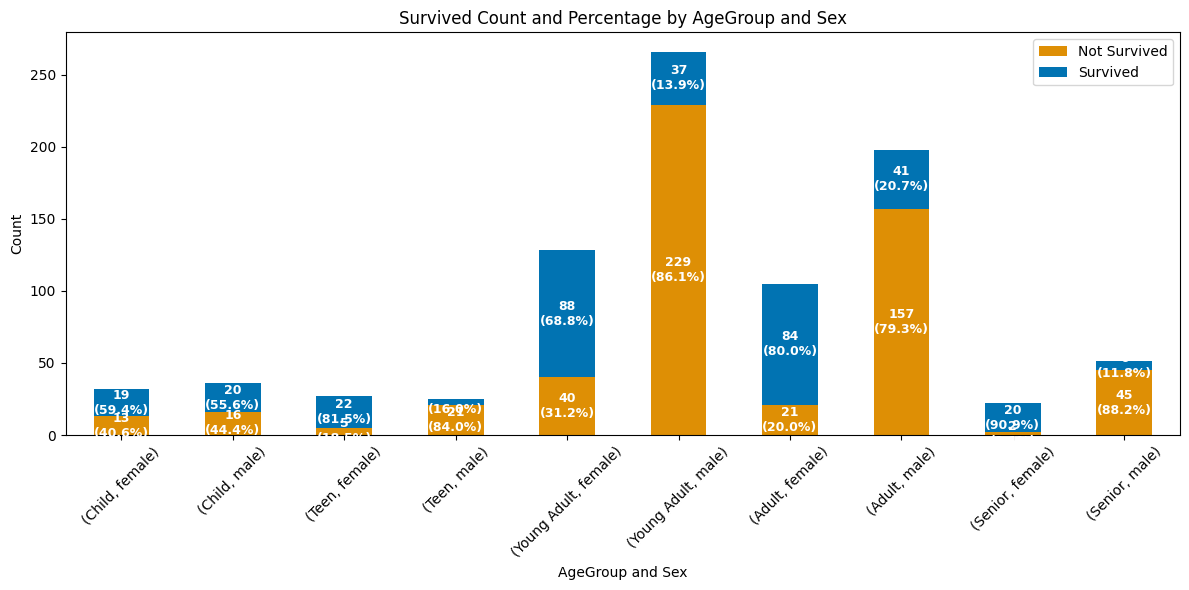

In [46]:
plot_num_stacked(age_50_df, group1='AgeGroup', group2='Sex')

In [47]:
# Pareto 80:20 to Age distribution
def impute_age_with_top_80(df):
    # Get value counts and cumulative distribution of known ages
    age_counts = df['Age'].dropna().value_counts(normalize=True).sort_values(ascending=False)
    cumulative_age = age_counts.cumsum()
    # Select ages contributing to the first 80% of the data
    top_ages = cumulative_age[cumulative_age < 0.81].index.tolist()
    
    # Normalize Ages probabilities again to sum to 1
    top_age_probs = age_counts[age_counts.index.isin(top_ages)]
    top_age_probs = top_age_probs / top_age_probs.sum()
    # Function to impute missing Age values using the top 50% distribution

    missing_count = df['Age'].isna().sum()
    imputed_values = np.random.choice(top_ages, size=missing_count, p=top_age_probs.values)
    df.loc[df['Age'].isna(), 'Age'] = imputed_values
    return df

##### We use 80:20 Pareto principles

In [48]:
# Apply distribution Pareto 80:20 in NaN
age_80_df = impute_age_with_top_80(train_df)
#all_data_df=impute_age_with_top_80(all_data_df)
# Binning age group preparing for the graph
age_80_df = age_bins(age_80_df)
#all_data_df = age_bins(all_data_df) 

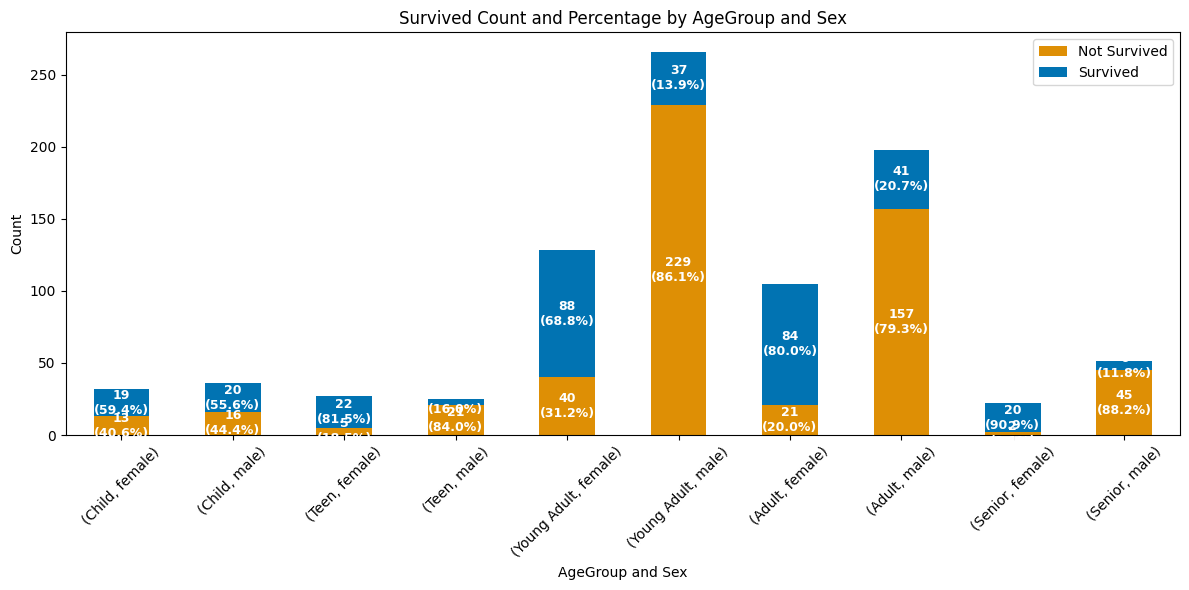

In [49]:
plot_num_stacked(age_80_df, group1='AgeGroup', group2='Sex')

In [50]:
# Apply distribution Pareto 80:20 in NaN
train_df = impute_age_with_top_80(train_df)
all_data_df=impute_age_with_top_80(all_data_df)
# Binning age group preparing for the graph
train_df = age_bins(age_80_df)
all_data_df = age_bins(all_data_df) 

In [51]:
train_df['Age'].isna().sum()

0

In [52]:
train_df[train_df['AgeGroup'].isna()]

PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  train_set AgeGroup  
630  male  80.0      0      0  27042  30.0   A23        S          1      NaN

In [53]:
# Fill missing AgeGroup with 'Senior'
train_df['AgeGroup'] = train_df['AgeGroup'].fillna('Senior')

##### Cabin (Feature Enginnering 1)

In [54]:
# Handle missing Cabin values
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')

# Extract CabinGroup (first letter of the Cabin)
train_df['CabinGroup'] = train_df['Cabin'].str[0]

# Extract CabinNo using regex (extract first numeric part if exists)
train_df['CabinNo'] = train_df['Cabin'].str.extract(r'(\d+)', expand=False)

# Fill missing or only-letter CabinNo with 0
train_df['CabinNo'] = train_df.apply(
    lambda row: 0 if row['Cabin'] == 'Unknown' or not re.search(r'\d+', row['Cabin']) 
    else pd.to_numeric(row['CabinNo'], errors='coerce'),
    axis=1
).astype('Int64')  # Keeps integers and <NA>

# Count how many cabins are listed (e.g., "C22 C26" = 2)
train_df['CabinCnt'] = train_df['Cabin'].apply(lambda x: 0 if x == 'Unknown' else len(x.split()))

# Display value counts of CabinGroup
cabin_group_counts = train_df['CabinGroup'].value_counts(dropna=False)
print("Cabin Group (Alphabet) Counts:\n")
print(cabin_group_counts)

# Show a sample of extracted columns
print("\nSample of extracted Cabin information:")
print(train_df[['Cabin', 'CabinGroup', 'CabinNo', 'CabinCnt']].head(10))

Cabin Group (Alphabet) Counts:

CabinGroup
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

Sample of extracted Cabin information:
     Cabin CabinGroup  CabinNo  CabinCnt
0  Unknown          U        0         0
1      C85          C       85         1
2  Unknown          U        0         0
3     C123          C      123         1
4  Unknown          U        0         0
5  Unknown          U        0         0
6      E46          E       46         1
7  Unknown          U        0         0
8  Unknown          U        0         0
9  Unknown          U        0         0



<div class="alert alert-block alert-warning">
<b style = "font-family: Arial; font-size: 16px">Note:</b><p style = "font-family:Verdana; font-size:14px">Cabin "Unknown" represents passengers with missing cabin information, not necessarily those without cabins, suggesting incomplete Titanic passenger records. `Cabin` will be drop and represet by `CabinGroup` and `CabinNo` and `CabinCnt`</p>

In [55]:
train_df['CabinNo'].unique()

<IntegerArray>
[  0,  85, 123,  46,   6, 103,  56,  23,  78,  33,  30,  52,  28,  83,  73,
  31,   5,  10,  26, 110,  58, 101,  69,  47,  86,   2,  19,   7,  49,   4,
  32,  80,  36,  15,  93,  35,  87,  77,  67,  94, 125,  99, 118,  22, 106,
  65,  54,  57,  34,  18, 124,  91,  40, 128,  37,  50,  82,  96,  44, 104,
 111,  92,  38,  21,  12,  63,  14,  20,  79,  25,  95,  39,  70,  16,  68,
  41,   9,  48, 126,  71,  51,  62,  24,  90,  45,   8, 121,  11,   3,  17,
 102,  42, 148]
Length: 93, dtype: Int64

https://www.encyclopedia-titanica.org/cabins.html

#### Apply also in all_data_df 

In [56]:
# Fill missing Cabin with 'Unknown'
all_data_df['Cabin'] = all_data_df['Cabin'].fillna('Unknown')

# Extract CabinGroup (first letter of Cabin)
all_data_df['CabinGroup'] = all_data_df['Cabin'].str[0]

# Extract CabinNo using regex (extract first numeric part if exists)
all_data_df['CabinNo'] = all_data_df['Cabin'].str.extract(r'(\d+)', expand=False)

# Fill missing or only-letter CabinNo with 0
all_data_df['CabinNo'] = all_data_df.apply(
    lambda row: 0 if row['Cabin'] == 'Unknown' or not re.search(r'\d+', row['Cabin']) 
    else pd.to_numeric(row['CabinNo'], errors='coerce'),
    axis=1
).astype('Int64')  # Keeps integers and <NA>

# Count how many cabins are listed (e.g., "C22 C26" = 2)
all_data_df['CabinCnt'] = all_data_df['Cabin'].apply(lambda x: 0 if x == 'Unknown' else len(x.split()))

# Drop 'Cabin'
all_data_df.drop('Cabin', axis=1, inplace=True)

In [57]:
all_data_df.sample(10)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

PassengerId  Survived  Pclass  \
281          282       0.0       3   
107          999       NaN       3   
514          515       0.0       3   
307          308       1.0       1   
282          283       0.0       3   
601          602       0.0       3   
201         1093       NaN       3   
75            76       0.0       3   
508          509       0.0       3   
203          204       0.0       3   

                                                  Name     Sex    Age  SibSp  \
281                   Olsson, Mr. Nils Johan Goransson    male  28.00      0   
107                                   Ryan, Mr. Edward    male  17.00      0   
514                                  Coleff, Mr. Satio    male  24.00      0   
307  Penasco y Castellana, Mrs. Victor de Satode (M...  female  17.00      1   
282                          de Pelsmaeker, Mr. Alfons    male  16.00      0   
601                               Slabenoff, Mr. Petco    male  30.00      0   
201            Danbom, Master. Gilbert Sigvard Emanuel    male   0.33      0   
75                             Moen, Mr. Sigurd Hansen    male  25.00      0   
508                           Olsen, Mr. Henry Margido    male  28.00      0   
203                               Youseff, Mr. Gerious    male  45.50      0   

     Parch    Ticket      Fare Embarked  train_set     AgeGroup CabinGroup  \
281      0    347464    7.8542        S          1  Young Adult          U   
107      0    383162    7.7500        Q          0         Teen          U   
514      0    349209    7.4958        S          1  Young Adult          U   
307      0  PC 17758  108.9000        C          1         Teen          C   
282      0    345778    9.5000        S          1         Teen          U   
601      0    349214    7.8958        S          1        Adult          U   
201      2    347080   14.4000        S          0        Child          U   
75       0    348123    7.6500        S          1  Young Adult          F   
508      0    C 4001   22.5250        S          1  Young Adult          U   
203      0      2628    7.2250        C          1        Adult          U   

     CabinNo  CabinCnt  
281        0         0  
107        0         0  
514        0         0  
307       65         1  
282        0         0  
601        0         0  
201        0         0  
75        73         2  
508        0         0  
203        0         0

In [58]:
# Create a crosstab (pivot-style) to count cabins across Pclass
cabin_pivot = pd.crosstab(train_df['CabinGroup'], train_df['Pclass'])

# Optional: Show only cabins with the highest total counts (top 10)
cabin_pivot['Total'] = cabin_pivot.sum(axis=1)
cabin_pivot_top10 = cabin_pivot.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column for cleaner display if needed
cabin_pivot_top10 = cabin_pivot_top10.drop(columns='Total')

# Display the result
print("\nTop 10 Cabin counts by Pclass (Pivot Table format):")
print(cabin_pivot_top10)


Top 10 Cabin counts by Pclass (Pivot Table format):
Pclass       1    2    3
CabinGroup              
U           40  168  479
C           59    0    0
B           47    0    0
D           29    4    0
E           25    4    3
A           15    0    0
F            0    8    5
G            0    0    4
T            1    0    0


In [59]:
features_info("pclass")

Definition: Ticket class
Key: 1 = Upper, 2 = Middle, 3 = Lower


In [60]:
# Create a crosstab (pivot-style) to count cabins across Pclass
cabin_pivot = pd.crosstab(train_df['CabinNo'], train_df['Pclass'])

# Show only cabins with the highest total counts (top 10)
cabin_pivot['Total'] = cabin_pivot.sum(axis=1)
cabin_pivot_top10 = cabin_pivot.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column for cleaner display if needed
cabin_pivot_top10 = cabin_pivot_top10.drop(columns='Total')

# Display the result
print("\nTop 10 Cabin counts by Pclass (Pivot Table format):")
print(cabin_pivot_top10)


Top 10 Cabin counts by Pclass (Pivot Table format):
Pclass    1    2    3
CabinNo              
0        41  171  479
33        4    3    0
6         2    0    4
101       2    3    0
49        5    0    0
2         2    3    0
23        5    0    0
22        5    0    0
20        5    0    0
36        4    0    0


In [61]:
# Group by Pclass and count top Cabin values (optional: show top 10 in each Pclass)
print("\nUpdated Cabin value counts grouped by Pclass:")

# Use groupby and value_counts to get Cabin frequency per Pclass
cabin_counts_by_pclass = (
    train_df.groupby('Pclass')['CabinGroup']
    .value_counts()
    .groupby(level=0, group_keys=False)
    .nlargest(10)
)

print(cabin_counts_by_pclass)


Updated Cabin value counts grouped by Pclass:
Pclass  CabinGroup
1       C              59
        B              47
        U              40
        D              29
        E              25
        A              15
        T               1
2       U             168
        F               8
        D               4
        E               4
3       U             479
        F               5
        G               4
        E               3
Name: count, dtype: int64


### Duplicated

In [62]:
train_df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

[go to top](#top)  

<img style="float:left" src="https://i.imgur.com/rb8V6X5.png" width="50">

<h1><a id="EDA">Analyze - Explarotary Data Analysis (EDA)</a></h1> 

<h2><a id="Cur">Current Data</a></h2>

### Separate numerical, categorical and count values (after cleaning)

In [63]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
train_set      0
AgeGroup       0
CabinGroup     0
CabinNo        0
CabinCnt       0
dtype: int64

#### Dependant variable (y) Survived

In [64]:
def separate_data_types(df, continuous_manual=None, count_manual=None, categorical_manual=None):
    """
    Separates a DataFrame into numerical (continuous), count-like, and categorical dataframes.

    Parameters:
    - df: pd.DataFrame
    - continuous_manual: list of str, manually specified continuous numeric columns
    - count_manual: list of str, manually specified count columns
    - categorical_manual: list of str, manually specified categorical numeric columns

    Returns:
    - train_num_df, train_cnt_df, train_cat_df
    """

    # Default empty lists if not provided
    continuous_manual = continuous_manual or []
    count_manual = count_manual or []
    categorical_manual = categorical_manual or []

    # Detect categorical columns by dtype
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Add manually-specified categorical numeric columns
    cat_cols += categorical_manual
    cat_cols = list(set(cat_cols))

    # Detect all numeric columns
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Remove count and categorical from numeric to isolate continuous
    continuous_cols = [col for col in num_cols if col not in count_manual + categorical_manual]
    continuous_cols += continuous_manual
    continuous_cols = list(set(continuous_cols))  # Ensure uniqueness

    # Finalize count columns
    count_cols = count_manual

    # Create dataframes
    train_num_df = df[continuous_cols].copy()
    train_cnt_df = df[count_cols].copy()
    train_cat_df = df[cat_cols].copy()

    return train_num_df, train_cnt_df, train_cat_df

In [65]:
t_num_df, t_cnt_df, t_cat_df = separate_data_types(
    train_df,
    continuous_manual=None, # Should be determined Age', 'Fare', 'Survived'
    count_manual=None, # Should be determined 'SibSp', 'Parch', 'CabinCnt', 'Survived'
    categorical_manual=None # Should be determined 'Pclass','CabinNo', 'Survived'
)

print("Continuous Columns:\n", t_num_df.columns.tolist())
print("\nCount Columns:\n", t_cnt_df.columns.tolist())
print("\nCategorical Columns:\n", t_cat_df.columns.tolist())

Continuous Columns:
 ['CabinCnt', 'SibSp', 'Age', 'CabinNo', 'PassengerId', 'Survived', 'Fare', 'Parch', 'train_set', 'Pclass']

Count Columns:
 []

Categorical Columns:
 ['AgeGroup', 'Cabin', 'Ticket', 'Name', 'CabinGroup', 'Embarked', 'Sex']


In [66]:
# Separate continuous numerical columns (excluding counts and IDs)
continuous_cols = ['Age', 'Fare', 'Survived']
train_num_df = train_df[continuous_cols].copy()

# Select count-like columns (treated separately from continuous)
count_cols = ['SibSp', 'Parch', 'CabinCnt', 'Survived']
train_cnt_df = train_df[count_cols].copy()

# Select categorical columns (object types and other known categorical numerics)
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
# Add numeric categorical features manually
cat_cols += ['Pclass','CabinNo', 'Survived']  # Add any others consider categorical
cat_cols = list(set(cat_cols))  # Ensure uniqueness
train_cat_df = train_df[cat_cols].copy()

# Display results
print("Continuous Columns:\n", train_num_df.columns.tolist())
print("\nCount Columns:\n", train_cnt_df.columns.tolist())
print("\nCategorical Columns:\n", train_cat_df.columns.tolist())


Continuous Columns:
 ['Age', 'Fare', 'Survived']

Count Columns:
 ['SibSp', 'Parch', 'CabinCnt', 'Survived']

Categorical Columns:
 ['AgeGroup', 'Cabin', 'CabinNo', 'Ticket', 'Name', 'CabinGroup', 'Survived', 'Embarked', 'Sex', 'Pclass']


In [67]:
train_df.PassengerId.nunique()

891

In [68]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [69]:
# Count how many survived (where Survived == 1)
survived_count = train_df[train_df['Survived'] == 1].shape[0]

# Print the result
print(f"Number of passengers who survived: {survived_count}")

Number of passengers who survived: 342


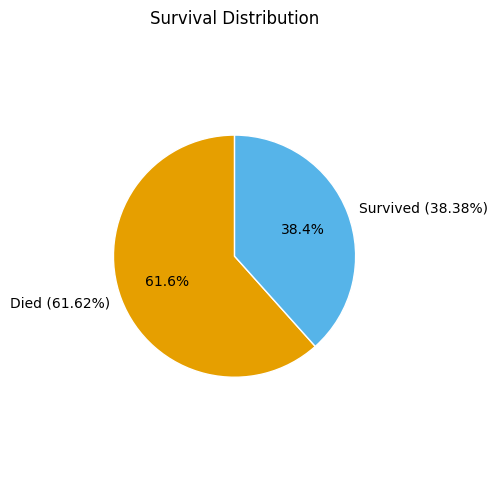

In [70]:
# Count values
survival_counts = train_df['Survived'].value_counts().sort_index()

# Map for clarity
survival_labels = {0: 'Died', 1: 'Survived'}
survival_counts.index = survival_counts.index.map(survival_labels)

# Calculate percentages
total = survival_counts.sum()
survival_percent = (survival_counts / total * 100).round(2)

# Blue (for survived), Orange (for died)
cud_colors = ['#E69F00', '#56B4E9']  # Orange (died), Blue (survived)
custom_colors = [cud_colors[0], cud_colors[1]] if 'Died' in survival_counts.index[0] else [cud_colors[1], cud_colors[0]]

plt.figure(figsize=(5, 5))
plt.pie(
    survival_counts,
    labels=[f'{label} ({percent}%)' for label, percent in zip(survival_counts.index, survival_percent)],
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(edgecolor='w')
)
plt.title('Survival Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

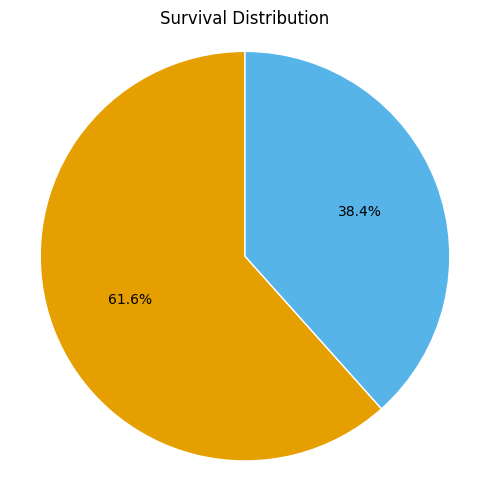

In [71]:
plt.figure(figsize=(5, 5))
plt.pie(
    survival_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(edgecolor='w')
)
plt.title('Survival Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Mining Continuous values
### Outliers

In [72]:
train_num_df.sample(5)

Age     Fare  Survived
8    27.0  11.1333         1
336  29.0  66.6000         0
63    4.0  27.9000         0
678  43.0  46.9000         0
187  45.0  26.5500         1

In [73]:
def plot_box(df, num_cols, target_col='Survived', title='Boxplot'):
    """
    Plot boxplots of numerical features against a binary target.

    Parameters:
    - df: pandas DataFrame
    - num_cols: list of column names to analyze
    - target_col: target variable (binary, e.g., 'Survived')
    - title: overall title of the plot
    """
    # Color-blind friendly palette
    cb_palette = {0: '#E69F00', 1: '#56B4E9'}

    # Determine the layout: try 2 plots per row
    n_cols = 2
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    plt.suptitle(title, fontsize=16)

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=target_col, y=col, data=df, palette=cb_palette)
        plt.title(f'Boxplot of {col} by {target_col}')
        plt.xlabel(target_col)
        plt.ylabel(col)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
    plt.show()

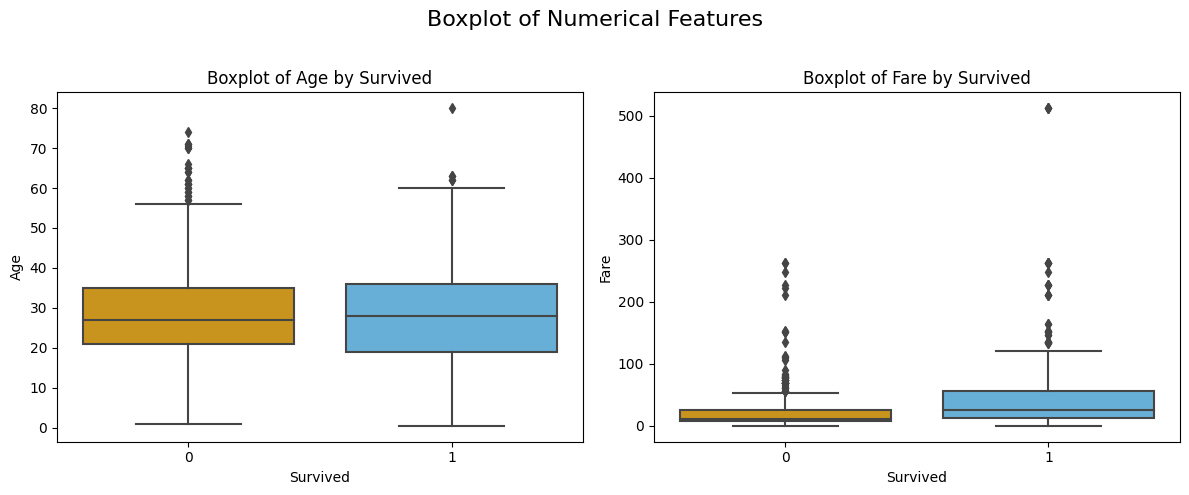

In [74]:
# Exclude 'Survived' and 'train_set' from the numerical columns
num_cols = [col for col in train_num_df.columns if col not in ['Survived', 'train_set']]
plot_box(train_num_df, num_cols, target_col='Survived', title='Boxplot of Numerical Features')

In [75]:
# Exclude 'Survived' and 'train_set' from the numerical columns
#numerical_cols = [col for col in train_num_df.columns if col not in ['Survived', 'train_set']]

# Set the figure size
#plt.figure(figsize=(12, 6))

# Define color-blind friendly palette
# 0: Not Survived (orange), 1: Survived (blue)
#cb_palette = {0: '#E69F00', 1: '#56B4E9'}

# Loop through numerical columns and create subplots
#for i, col in enumerate(numerical_cols, 1):
    #plt.subplot(1, 2, i)  # Adjust as needed for number of plots
    #sns.boxplot(x='Survived', y=col, data=train_df, palette=cb_palette)
    #plt.title(f'Boxplot of {col} by Survived')
    #plt.xlabel('Survived')
    #plt.ylabel(col)

#plt.tight_layout()
#plt.show()

In [76]:
def plot_hist(df, num_cols, target_col='Survived', title='Histogram'):
    """
    Plot histograms of numerical features with a binary target hue.

    Parameters:
    - df: pandas DataFrame
    - num_cols: list of column names to analyze
    - target_col: target variable (binary, e.g., 'Survived')
    - title: overall title of the plot
    """
    # Color-blind friendly palette
    cb_palette = {0: '#E69F00', 1: '#56B4E9'}

    # Grid layout
    n_cols = 2
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    plt.suptitle(title, fontsize=16)

    for i, column in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data=df, x=column, hue=target_col, kde=True, bins=30,
                     palette=cb_palette, multiple='stack', edgecolor='black')
        plt.title(f'{column} Distribution by {target_col}', fontsize=12)
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

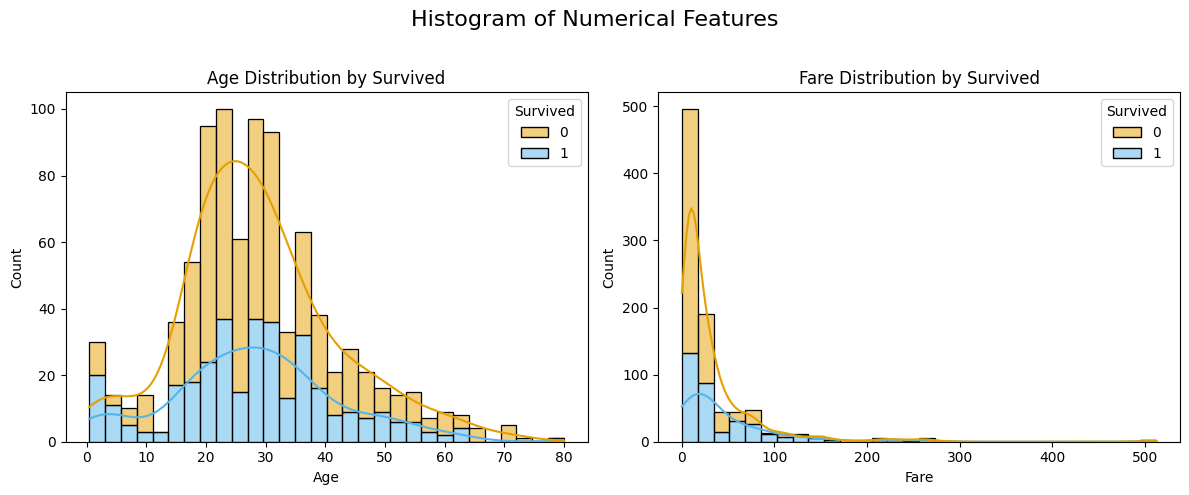

In [77]:
# Exclude 'Survived' and 'train_set' from the numerical columns
num_cols = [col for col in train_num_df.columns if col not in ['Survived', 'train_set']]
plot_hist(train_num_df, num_cols, target_col='Survived', title='Histogram of Numerical Features')

In [78]:
# Set up the plot grid
#plt.figure(figsize=(12,6))

# Loop through numerical columns
#for i, column in enumerate(numerical_cols, 1):
    #plt.subplot(1, 2, i)
    #sns.histplot(data=train_num_df, x=column, hue='Survived', kde=True, bins=30, palette=cb_palette, multiple='stack')
    #plt.title(f'{column} Distribution by Survival', fontsize=12)
    #plt.xlabel(column)
    #plt.ylabel('Count')

#plt.tight_layout()
#plt.show()

#### We have all numerical (2) features with outliers `Age`and `Fare`.

1. `Age`: The histogram suggests an approximately normal distribution; therefore, outliers were disregarded (mitigated using the IQR method).
2. `Fare`: This feature exhibits high skewness and a wide range (e.g., very high first-class fares). To reduce skewness, a log transformation was applied, and extreme values were capped.

#### Handling outliers

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

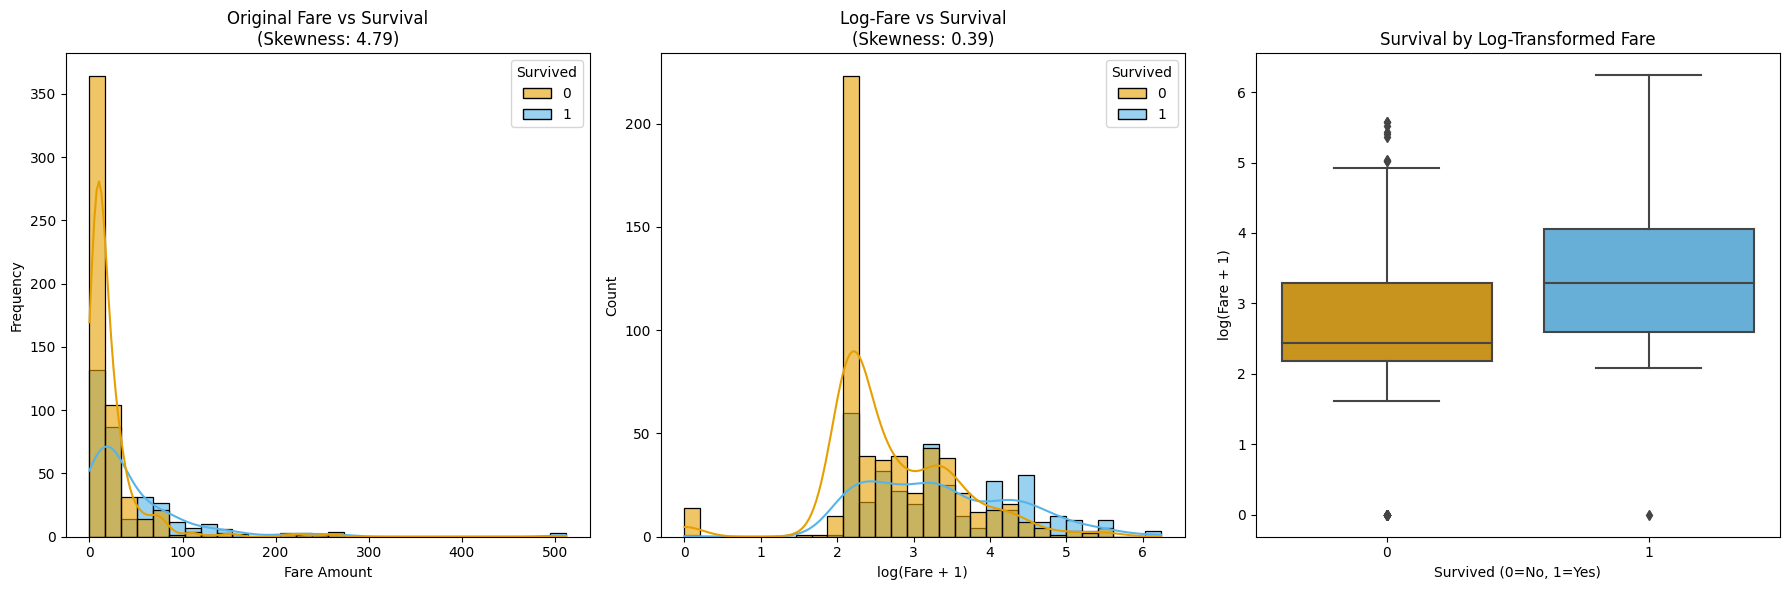

In [79]:
# Apply log transformation
train_num_df['Fare_log'] = np.log1p(train_num_df['Fare'])
# Color-blind friendly palette
cb_palette = {0: '#E69F00', 1: '#56B4E9'}

# Set up visualization
plt.figure(figsize=(18, 6))

# 1. Original vs Transformed Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=train_num_df, x='Fare', hue='Survived', bins=30, kde=True, 
             palette=cb_palette, alpha=0.6)
plt.title('Original Fare vs Survival\n(Skewness: {:.2f})'.format(train_num_df['Fare'].skew()))
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')

# 2. Log-Transformed Distribution
plt.subplot(1, 3, 2)
sns.histplot(data=train_num_df, x='Fare_log', hue='Survived', bins=30, kde=True,
             palette=cb_palette, alpha=0.6)
plt.title('Log-Fare vs Survival\n(Skewness: {:.2f})'.format(train_num_df['Fare_log'].skew()))
plt.xlabel('log(Fare + 1)')

# 3. Boxplot Comparison
plt.subplot(1, 3, 3)
sns.boxplot(data=train_num_df, x='Survived', y='Fare_log', 
            palette=cb_palette)
plt.title('Survival by Log-Transformed Fare')
plt.ylabel('log(Fare + 1)')
plt.xlabel('Survived (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

In [80]:
def interpret_normality(results_df):
    """Add interpretation columns to normality test results"""
    interpretations = []
    for _, row in results_df.iterrows():
        # Interpretation of p-values
        p_values = [row['Shapiro-Wilk p-value'], row["D'Agostino p-value"], row['Kolmogorov-Smirnov p-value']]
        p_interpret = "Non-normal" if all(p < 0.05 for p in p_values) else "Possibly normal"
        
        # Interpretation of skewness
        skew = row['Skewness']
        if abs(skew) <= 0.5:
            skew_interpret = "Symmetric"
        elif 0.5 < abs(skew) <= 1:
            skew_interpret = "Moderately skewed"
        else:
            skew_interpret = "Highly skewed"
        
        # Interpretation of kurtosis
        kurt = row['Kurtosis']
        if 2.5 <= kurt <= 3.5:
            kurt_interpret = "Normal tails"
        elif kurt > 3.5:
            kurt_interpret = "Heavy tails (outliers likely)"
        else:
            kurt_interpret = "Light tails"
        
        interpretations.append({
            'Variable': row['Variable'],
            'Normality Conclusion': p_interpret,
            'Skewness Interpretation': f"{skew_interpret} ({skew:.2f})",
            'Kurtosis Interpretation': f"{kurt_interpret} ({kurt:.2f})",
            'Recommendation': get_recommendation(p_interpret, skew, kurt) #function get_recommendation
        })
    
    return pd.DataFrame(interpretations)

In [81]:
def get_recommendation(normality, skew, kurt):
    """Generate transformation recommendations"""
    if normality == "Non-normal":
        if abs(skew) > 1:
            if kurt > 3.5:
                return "Try log/Box-Cox transform + outlier treatment"
            else:
                return "Try power transform (sqrt/cube root)"
        else:
            return "Consider non-parametric tests"
    else:
        return "No transformation needed"

In [82]:
train_num_df.sample(5)

Age     Fare  Survived  Fare_log
48   32.0  21.6792         0  3.121448
672  70.0  10.5000         0  2.442347
16    2.0  29.1250         0  3.405355
601  32.0   7.8958         0  2.185579
587  60.0  79.2000         1  4.384524

In [83]:
def analyze_normality(train_num_df, exclude_cols=['Survived']):
    """
    Perform Shapiro-Wilk, D'Agostino, and Kolmogorov-Smirnov normality tests on numerical columns.

    Parameters:
    - train_num_df: pd.DataFrame, numerical features only
    - exclude_cols: list of column names to exclude (e.g., target column)

    Returns:
    - results_df: DataFrame of normality test results
    - interpretation_df: DataFrame with added interpretation
    """

    numerical_cols = [col for col in train_num_df.columns if col not in exclude_cols]
    
    normality_results = []

    for col in numerical_cols:
        data = train_num_df[col].dropna()

        # Run tests
        shapiro_stat, shapiro_p = stats.shapiro(data)
        dagostino_stat, dagostino_p = stats.normaltest(data)
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
        
        normality_results.append({
            'Variable': col,
            'Shapiro-Wilk p-value': shapiro_p,
            "D'Agostino p-value": dagostino_p,
            'Kolmogorov-Smirnov p-value': ks_p,
            'Skewness': data.skew(),
            'Kurtosis': data.kurtosis()
        })
    
    results_df = pd.DataFrame(normality_results)
    interpretation_df = interpret_normality(results_df)

    # Display results
    print("="*70)
    print("Detailed Statistical Test Results:")
    display(results_df.round(4))

    print("\n" + "="*70)
    print("Practical Interpretations:")
    display(interpretation_df)

    return results_df, interpretation_df

In [84]:
results_df, interpretation_df = analyze_normality(train_num_df)

Detailed Statistical Test Results:


Variable  Shapiro-Wilk p-value  D'Agostino p-value  \
0       Age                   0.0                 0.0   
1      Fare                   0.0                 0.0   
2  Fare_log                   0.0                 0.0   

   Kolmogorov-Smirnov p-value  Skewness  Kurtosis  
0                         0.0    0.5540    0.7330  
1                         0.0    4.7873   33.3981  
2                         0.0    0.3949    0.9761


Practical Interpretations:


Variable Normality Conclusion   Skewness Interpretation  \
0       Age           Non-normal  Moderately skewed (0.55)   
1      Fare           Non-normal      Highly skewed (4.79)   
2  Fare_log           Non-normal          Symmetric (0.39)   

                 Kurtosis Interpretation  \
0                     Light tails (0.73)   
1  Heavy tails (outliers likely) (33.40)   
2                     Light tails (0.98)   

                                  Recommendation  
0                  Consider non-parametric tests  
1  Try log/Box-Cox transform + outlier treatment  
2                  Consider non-parametric tests

[go to top](#top)  

### Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

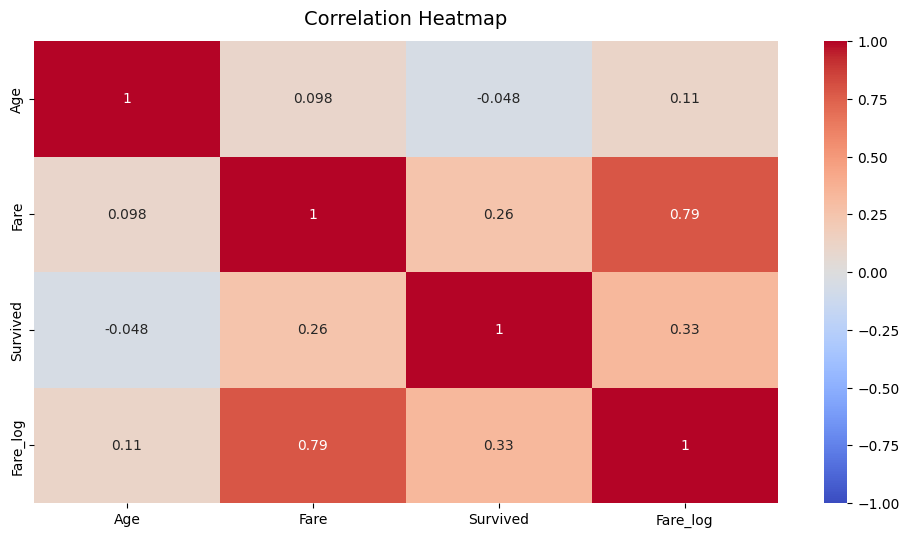

In [85]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(train_num_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

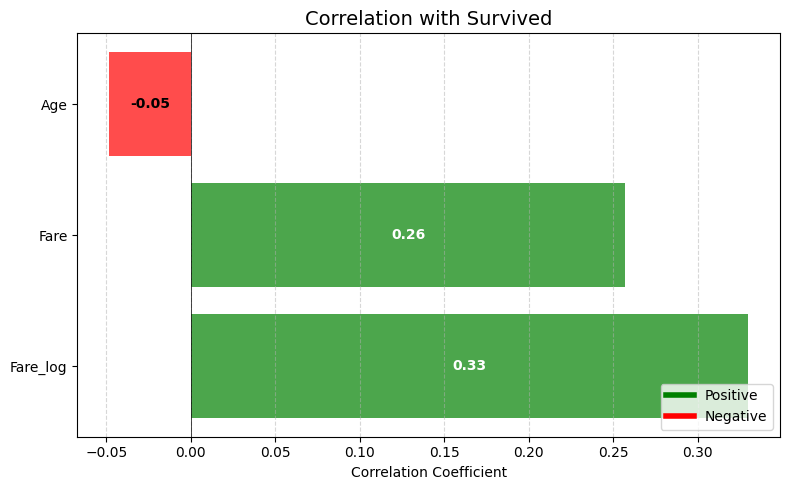

In [86]:
# Calculate and sort correlation with 'Survived'
corr = train_num_df.corr()['Survived'].drop(['Survived', 'train_set'], errors='ignore').sort_values(key=abs, ascending=False)

# Bar color based on sign
colors = ['green' if val > 0 else 'red' for val in corr]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(corr.index, corr.values, color=colors, alpha=0.7)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Correlation with Survived', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add value labels in the center of the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2,
             bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}',
             va='center',
             ha='center',
             color='white' if abs(width) > 0.15 else 'black',  # ensures text visibility
             fontweight='bold')

# Add legend
legend = [Line2D([0], [0], color='green', lw=4, label='Positive'),
          Line2D([0], [0], color='red', lw=4, label='Negative')]
plt.legend(handles=legend, loc='lower right')

plt.tight_layout()
plt.show()

### Does Control Chart have an effect? What is the Survival Rate?

In [87]:
def plot_p_charts(df, feature_cols, target_col='Survived', data_type='num', title='P-Charts', max_categories=10, bins=5):
    """
    Plot P-Charts for numerical or categorical features against a binary target.

    Parameters:
    - df: pandas DataFrame
    - feature_cols: list of column names to analyze
    - target_col: target variable (binary, e.g., 'Survived')
    - data_type: 'num' for numerical features, 'cat' for categorical features
    - title: title of the plot
    - max_categories: max categories to show in categorical plots
    - bins: number of quantile bins for numerical plots
    """
    if data_type == 'num':
        n_cols = len(feature_cols)
        fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 6))
        axes = axes.flatten()

        for i, col in enumerate(feature_cols):
            ax = axes[i]
            data = df[[col, target_col]].dropna().copy()

            if pd.api.types.is_numeric_dtype(data[col]):
                data['binned'] = pd.qcut(data[col], q=bins, duplicates='drop')
            else:
                data['binned'] = data[col]

            grouped = data.groupby('binned')[target_col]
            p_hat = grouped.mean()
            n_per_bin = grouped.count()
            p_bar = data[target_col].mean()
            ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / n_per_bin)
            lcl = (p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / n_per_bin)).clip(lower=0)

            bin_labels = p_hat.index.astype(str)
            ax.plot(bin_labels, p_hat.values, 'bo-', label='Survival Rate')
            ax.axhline(p_bar, color='r', linestyle='--', label='CL')
            ax.plot(bin_labels, ucl.values, 'g--', label='UCL')
            ax.plot(bin_labels, lcl.values, 'g--', label='LCL')
            ax.set_title(f'Survival by {col}')
            ax.set_xticklabels(bin_labels, rotation=45, ha='right')
            ax.set_ylim(0, 1.1)
            ax.grid(True)

        for j in range(n_cols, len(axes)):
            fig.delaxes(axes[j])

        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig.suptitle(title, fontsize=16, y=1.02)
        plt.show()

    elif data_type == 'cat':
        n_cols = len(feature_cols)
        n_rows = int(np.ceil(n_cols / 2))
        fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
        axes = axes.flatten()

        for idx, col in enumerate(feature_cols):
            if col not in df.columns:
                continue

            if df[col].nunique() > max_categories:
                top_values = df[col].value_counts().nlargest(max_categories).index
                filtered_df = df[df[col].isin(top_values)]
            else:
                filtered_df = df

            count_per_group = filtered_df.groupby(col)[target_col].count()
            survived_per_group = filtered_df.groupby(col)[target_col].sum()
            p_hat = survived_per_group / count_per_group
            p_bar = df[target_col].mean()
            ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
            lcl = (p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)).clip(lower=0)

            ax = axes[idx]
            ax.plot(range(len(p_hat)), p_hat.values, 'bo-', label='Survival Rate')
            ax.axhline(p_bar, color='red', linestyle='--', label='CL')
            ax.plot(range(len(p_hat)), ucl, 'g--', label='UCL')
            ax.plot(range(len(p_hat)), lcl, 'g--', label='LCL')
            ax.set_xticks(range(len(p_hat)))
            ax.set_xticklabels(p_hat.index.astype(str), rotation=45, ha='right')
            ax.set_title(f'P-Chart: Survival Rate by {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Proportion Survived')
            ax.set_ylim(0, 1)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend()

        for j in range(n_cols, len(axes)):
            fig.delaxes(axes[j])

        fig.tight_layout()
        fig.suptitle(title, fontsize=16, y=1.02)
        plt.show()

    else:
        print("Invalid data_type. Use 'num' or 'cat'.")

<ipython-input-87-d01b67dc74f4>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('binned')[target_col]
<ipython-input-87-d01b67dc74f4>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bin_labels, rotation=45, ha='right')
<ipython-input-87-d01b67dc74f4>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('binned')[target_col]
<ipython-input-87-d01b67dc74f4>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bin_labels, rotation=45, ha='right')
<ipython-input-87-d01b67

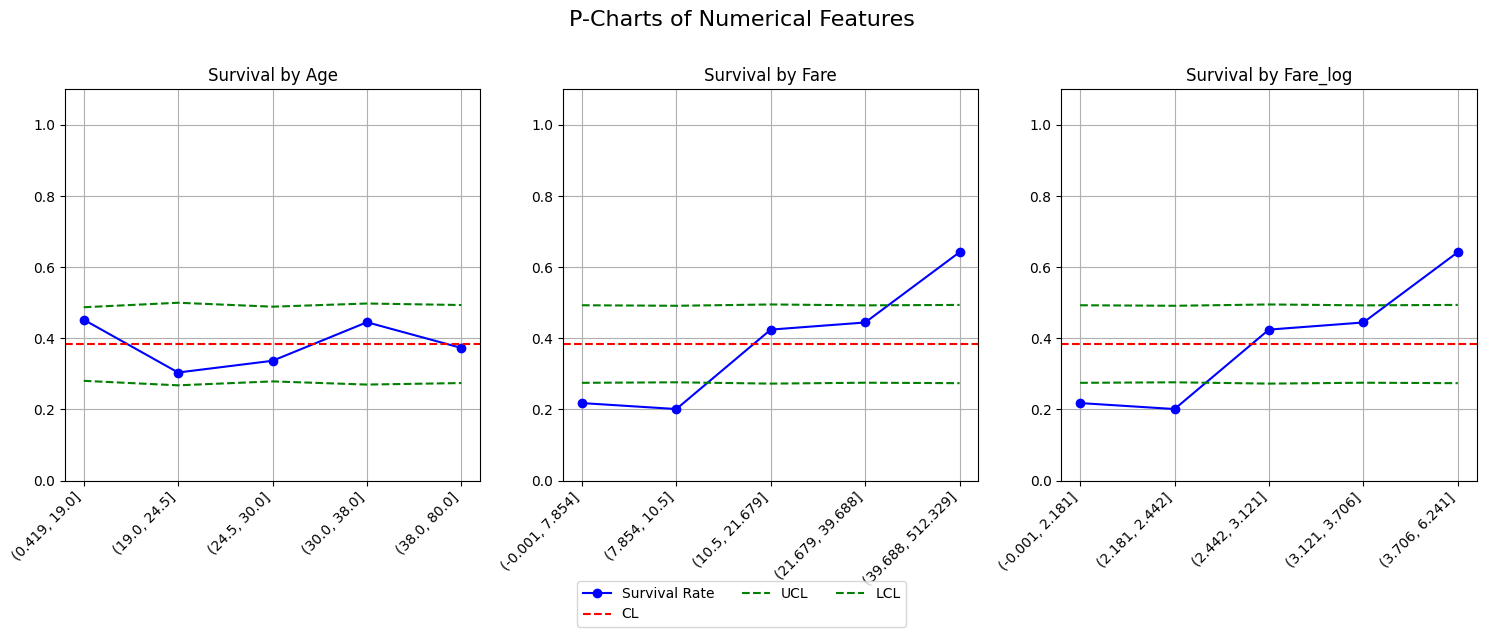

In [88]:
num_cols = [col for col in train_num_df.columns if col not in ['Survived', 'train_set']]
plot_p_charts(train_num_df, num_cols, target_col='Survived', data_type='num', title='P-Charts of Numerical Features')

In [89]:
# Define numerical columns excluding the target 'Survived' and 'train_set'
#numerical_cols = [col for col in train_num_df.columns if col not in ['Survived', 'train_set']]
#target_col = 'Survived'

# Prepare subplots (3x3)
#fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 3 rows x 3 cols
#axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Loop through numerical columns and plot P-Charts
#for i, col in enumerate(numerical_cols):
    #ax = axes[i]
    #data = train_num_df[[col, target_col]].dropna().copy()

    # Bin if continuous
    #if pd.api.types.is_numeric_dtype(data[col]):
        #data['binned'] = pd.qcut(data[col], q=5, duplicates='drop')
    #else:
        #data['binned'] = data[col]

    # Calculate survival rate and sample size per bin
    #grouped = data.groupby('binned')[target_col]
    #survival_rate = grouped.mean()
    #n_per_bin = grouped.count()
    #p_bar = data[target_col].mean()
    #ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / n_per_bin)
    #lcl = (p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / n_per_bin)).clip(lower=0)

    # Plot in subplot
    #bin_labels = survival_rate.index.astype(str)
    #ax.plot(bin_labels, survival_rate.values, 'bo-', label='Survival Rate')
    #ax.axhline(p_bar, color='r', linestyle='--', label='CL')
    #ax.plot(bin_labels, ucl.values, 'g--', label='UCL')
    #ax.plot(bin_labels, lcl.values, 'g--', label='LCL')
    #ax.set_title(f'Survival by {col}')
    #ax.set_xticklabels(bin_labels, rotation=45)
    #ax.set_ylim(0, 1.1)
    #ax.grid(True)

# Hide any unused subplots
#for j in range(len(numerical_cols), len(axes)):
    #fig.delaxes(axes[j])

# Add a global legend and layout
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))
#fig.tight_layout(rect=[0, 0.03, 1, 0.97])
#fig.suptitle('P-Charts of Survival Rate by Age, Fare and Fare_Log', fontsize=16, y=1.02)
#plt.show()

                Age       Fare  Fare_log
Survived                                
0         29.379781  22.117887  2.710095
1         28.060439  48.395408  3.367015


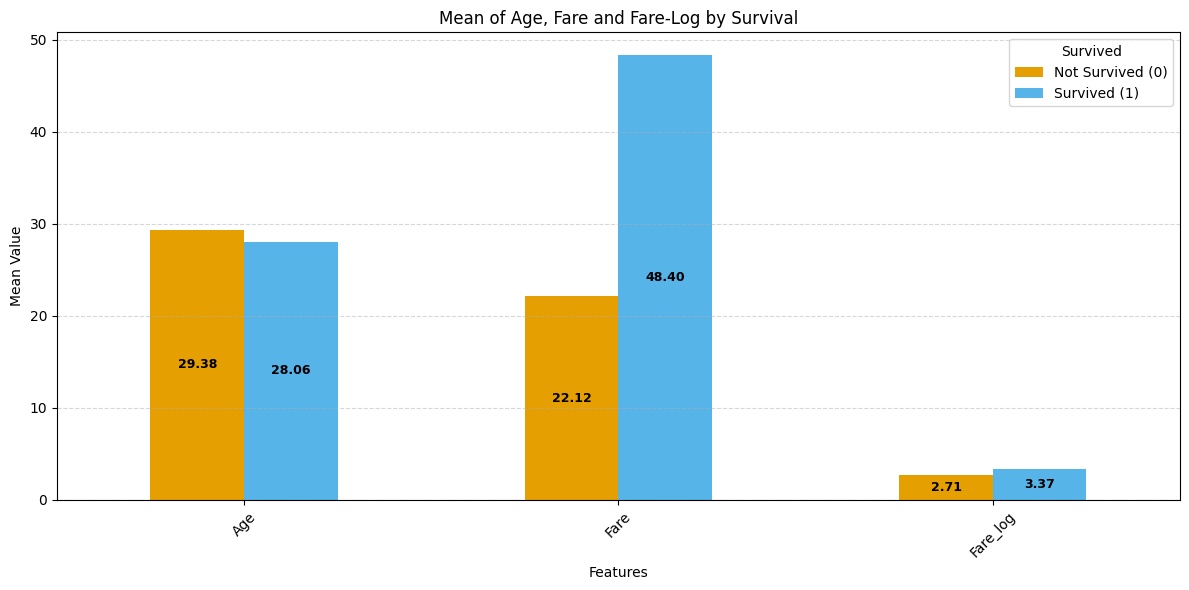

In [90]:
# Create pivot table of average values grouped by 'Survived'
pivot = pd.pivot_table(
    train_num_df,
    index='Survived',
    values=[col for col in train_num_df.columns if col not in ['Survived', 'train_set']],
    aggfunc='mean'
)

# Display the pivot table
print(pivot)

# Plot the pivot table
ax = pivot.T.plot(
    kind='bar',
    figsize=(12, 6),
    color=[cb_palette[sv] for sv in pivot.index]  # Map colors to Survived values
)

plt.title('Mean of Age, Fare and Fare-Log by Survival')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'])
plt.tight_layout()

# Add centered value labels on each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,  # Center of the bar
            f'{height:.2f}',
            ha='center',
            va='center',
            color='black',
            fontsize=9,
            fontweight='bold'
        )

plt.show()

In [91]:
# Total revenue from survivors
revenue_survived = all_data_df[all_data_df['Survived'] == 1]['Fare'].sum()

# Total revenue from those who died
revenue_died = all_data_df[all_data_df['Survived'] == 0]['Fare'].sum()

# Display results
print(f"Total Revenue from Survived Passengers: ${revenue_survived:,.2f}")
print(f"Total Revenue from Deceased Passengers: ${revenue_died:,.2f}")

Total Revenue from Survived Passengers: $16,551.23
Total Revenue from Deceased Passengers: $12,142.72


In [92]:
# Total number of users in each group
count_survived = train_df[train_df['Survived'] == 1].shape[0]
count_died = train_df[train_df['Survived'] == 0].shape[0]

# Revenue per user
revenue_per_user_survived = revenue_survived / count_survived
revenue_per_user_died = revenue_died / count_died

# Display
print(f"Survived Passenger: {count_survived:}")
print(f"Deceased Passenger: {count_died:}")
print(f"Revenue per Survived Passenger: ${revenue_per_user_survived:,.2f}")
print(f"Revenue per Deceased Passenger: ${revenue_per_user_died:,.2f}")

Survived Passenger: 342
Deceased Passenger: 549
Revenue per Survived Passenger: $48.40
Revenue per Deceased Passenger: $22.12


In [93]:
# Total number of passengers
total_passengers = train_df.shape[0]

# Percentage calculations
percent_survived = (count_survived / total_passengers) * 100
percent_died = (count_died / total_passengers) * 100

# Display results
print(f"Survived: {count_survived} passengers ({percent_survived:.2f}%)")
print(f"Died: {count_died} passengers ({percent_died:.2f}%)")

Survived: 342 passengers (38.38%)
Died: 549 passengers (61.62%)


In [94]:
total_passengers

891

#### Apply to all_data_df FareLog

In [95]:
# Apply log transformation and drop original 'Fare'
all_data_df['Fare_log'] = np.log1p(all_data_df['Fare'])
#all_data_df.drop(columns=['Fare'], inplace=True)
train_num_df.drop(columns=['Fare'], inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


[go to top](#top)  

### Mining Categorical values

In [96]:
train_cat_df.sample(5)

AgeGroup    Cabin  CabinNo      Ticket  \
432    Adult  Unknown        0  SC/AH 3085   
202    Adult  Unknown        0     3101264   
265    Adult  Unknown        0  C.A. 17248   
174   Senior       A7        7       17764   
806    Adult      A36       36      112050   

                                                  Name CabinGroup  Survived  \
432  Louch, Mrs. Charles Alexander (Alice Adelaide ...          U         1   
202                         Johanson, Mr. Jakob Alfred          U         0   
265                                  Reeves, Mr. David          U         0   
174                            Smith, Mr. James Clinch          A         0   
806                             Andrews, Mr. Thomas Jr          A         0   

    Embarked     Sex  Pclass  
432        S  female       2  
202        S    male       3  
265        S    male       2  
174        C    male       1  
806        S    male       1

In [97]:
train_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AgeGroup    891 non-null    category
 1   Cabin       891 non-null    object  
 2   CabinNo     891 non-null    Int64   
 3   Ticket      891 non-null    object  
 4   Name        891 non-null    object  
 5   CabinGroup  891 non-null    object  
 6   Survived    891 non-null    int64   
 7   Embarked    891 non-null    object  
 8   Sex         891 non-null    object  
 9   Pclass      891 non-null    int64   
dtypes: Int64(1), category(1), int64(2), object(6)
memory usage: 64.7+ KB


### Feature Engineering Name

In [98]:
train_cat_df['Name'].sample(5)

155                          Williams, Mr. Charles Duane
423    Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...
276                    Lindblom, Miss. Augusta Charlotta
797                                     Osman, Mrs. Mara
290                         Barber, Miss. Ellen "Nellie"
Name: Name, dtype: object

In [99]:
train_cat_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)

0                                       1     2
0       Mr                             Owen Harris  None
1      Mrs   John Bradley (Florence Briggs Thayer)  None
2     Miss                                   Laina  None
3      Mrs           Jacques Heath (Lily May Peel)  None
4       Mr                           William Henry  None
..     ...                                     ...   ...
886    Rev                                  Juozas  None
887   Miss                          Margaret Edith  None
888   Miss                Catherine Helen "Carrie"  None
889     Mr                             Karl Howell  None
890     Mr                                 Patrick  None

[891 rows x 3 columns]

In [100]:
train_cat_df['Title'] = train_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())
all_data_df['Title'] = all_data_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())

In [101]:
train_cat_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [102]:
# Military: 'Col', 'Capt', 'Major'. Noble: 'Don', 'Lady', 'Sir', 'the Countess','Jonkheer'. Single Female: 'Mme', 'Ms', 'Mrs' (Alternative)

In [103]:
# Extract surname (family name)
def extract_surname(full_name):
    # Remove parentheses, quotes, commas, and periods
    clean_name = re.sub(r'[\(\)"“”,\.]', '', full_name)
    # Split into parts and take the first part as surname
    name_parts = clean_name.strip().split()
    if len(name_parts) > 0:
        return name_parts[0]
    return None

# Apply to the 'Name' column (correct column name)
train_cat_df['Surname'] = train_cat_df['Name'].apply(extract_surname)

# Display result
print(train_cat_df[['Surname']].head())

     Surname
0     Braund
1    Cumings
2  Heikkinen
3   Futrelle
4      Allen


In [104]:
train_cat_df['Surname'].nunique()

661

#### Apply to all_data_df

In [105]:
# Apply function to 'Name' column in all_data_df
all_data_df['Surname'] = all_data_df['Name'].apply(extract_surname)

#### Categorical performance

In [106]:
train_cat_df.columns

Index(['AgeGroup', 'Cabin', 'CabinNo', 'Ticket', 'Name', 'CabinGroup',
       'Survived', 'Embarked', 'Sex', 'Pclass', 'Title', 'Surname'],
      dtype='object')

In [107]:
#filtered_cat_cols = train_cat_df.drop(columns=['Cabin', 'Name', 'Survived']).columns

# Create 4x2 subplots (8 total)
#fig, axes = plt.subplots(5, 2, figsize=(16, 18))
#axes = axes.flatten()  # Flatten to easily index in loop

# Plot bar plots with count and proportion annotations
#for idx, col in enumerate(filtered_cat_cols):
    # Calculate counts and proportions
    #value_counts = train_cat_df[col].value_counts()
    #value_props = train_cat_df[col].value_counts(normalize=True)
    
    # Special handling for Pclass and CabinNo
    #if col == 'Pclass':
        # Order Pclass 1, 2, 3
        #sorted_index = sorted(value_counts.index, key=lambda x: int(x))
        #value_counts = value_counts.reindex(sorted_index)
        #value_props = value_props.reindex(sorted_index)
    #elif col == 'CabinNo':
        # Order CabinNo numerically (handle strings with numbers)
        #try:
            #sorted_index = sorted(value_counts.index, 
                                  #key=lambda x: float(x) if str(x).isdigit() else float('inf'))
            #value_counts = value_counts.reindex(sorted_index)
            #value_props = value_props.reindex(sorted_index)
        #except:
            #pass  # Fall back to original order if conversion fails
                
    # For ticket and other high-cardinality columns, keep only top 10
    #if len(value_counts) > 10:
        # Get top 10 values
        #top_values = value_counts.nlargest(10)
        #top_props = value_props.loc[top_values.index]
        
        # Sum the rest into "Other" category
        #other_count = value_counts.sum() - top_values.sum()
        #other_prop = value_props.sum() - top_props.sum()
        
        # Create new Series with top values and "Other"
        #value_counts = pd.concat([top_values, pd.Series({'Other': other_count})])
        #value_props = pd.concat([top_props, pd.Series({'Other': other_prop})])
    
    # Create DataFrame for plotting
    #plot_df = pd.DataFrame({
        #'Count': value_counts,
        #'Proportion': value_props
    #})
    
    # Plot on subplot
    #ax = axes[idx]
    #sns.barplot(x=plot_df.index.astype(str), y=plot_df['Count'], palette='Set2', ax=ax)
    
    # Add count and proportion labels only for categories with 5% or more
    #for i, (count, prop) in enumerate(zip(plot_df['Count'], plot_df['Proportion'])):
        #if prop >= 0.05:  # Only annotate bars that are 5% or more
            #ax.text(i, count + 1, f'{count} ({prop:.1%})', ha='center', va='bottom', fontsize=9)
    
    #ax.set_title(f'Value Counts & Proportions of {col}')
    #ax.set_xlabel(col)
    #ax.set_ylabel('Count')
    #ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
#for j in range(len(filtered_cat_cols), len(axes)):
    #fig.delaxes(axes[j])

#plt.tight_layout()
#plt.show()

In [108]:
def plot_cat_pie(df, cat_cols, title='Pie Charts of Categorical Features', min_pct_label=0.05):
    """
    Plot pie charts for categorical features with color-blind friendly palette.

    Parameters:
    - df: pandas DataFrame
    - cat_cols: list of categorical column names
    - title: main title for the plot
    - min_pct_label: minimum proportion threshold to display labels (default 5%)
    """
    n_cols = 2
    n_rows = math.ceil(len(cat_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle(title, fontsize=18)

    # Loop through each categorical column
    for idx, col in enumerate(cat_cols):
        value_counts = df[col].value_counts()
        value_props = df[col].value_counts(normalize=True)

        labels = [
            f'{val}\n{count} ({prop:.1%})' if prop >= min_pct_label else ''
            for val, count, prop in zip(value_counts.index, value_counts, value_props)
        ]

        ax = axes[idx]
        wedges, texts, autotexts = ax.pie(
            value_counts,
            labels=labels,
            autopct=lambda pct: f'{pct:.1f}%' if pct >= (min_pct_label * 100) else '',
            pctdistance=0.7,
            labeldistance=0.6,
            startangle=140,
            colors=sns.color_palette('Set2'),
            wedgeprops=dict(edgecolor='w')
        )

        for text in texts:
            text.set_horizontalalignment('center')
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_weight('bold')

        ax.set_title(f'{col}', fontsize=14)
        ax.axis('equal')

    # Hide any unused subplots
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

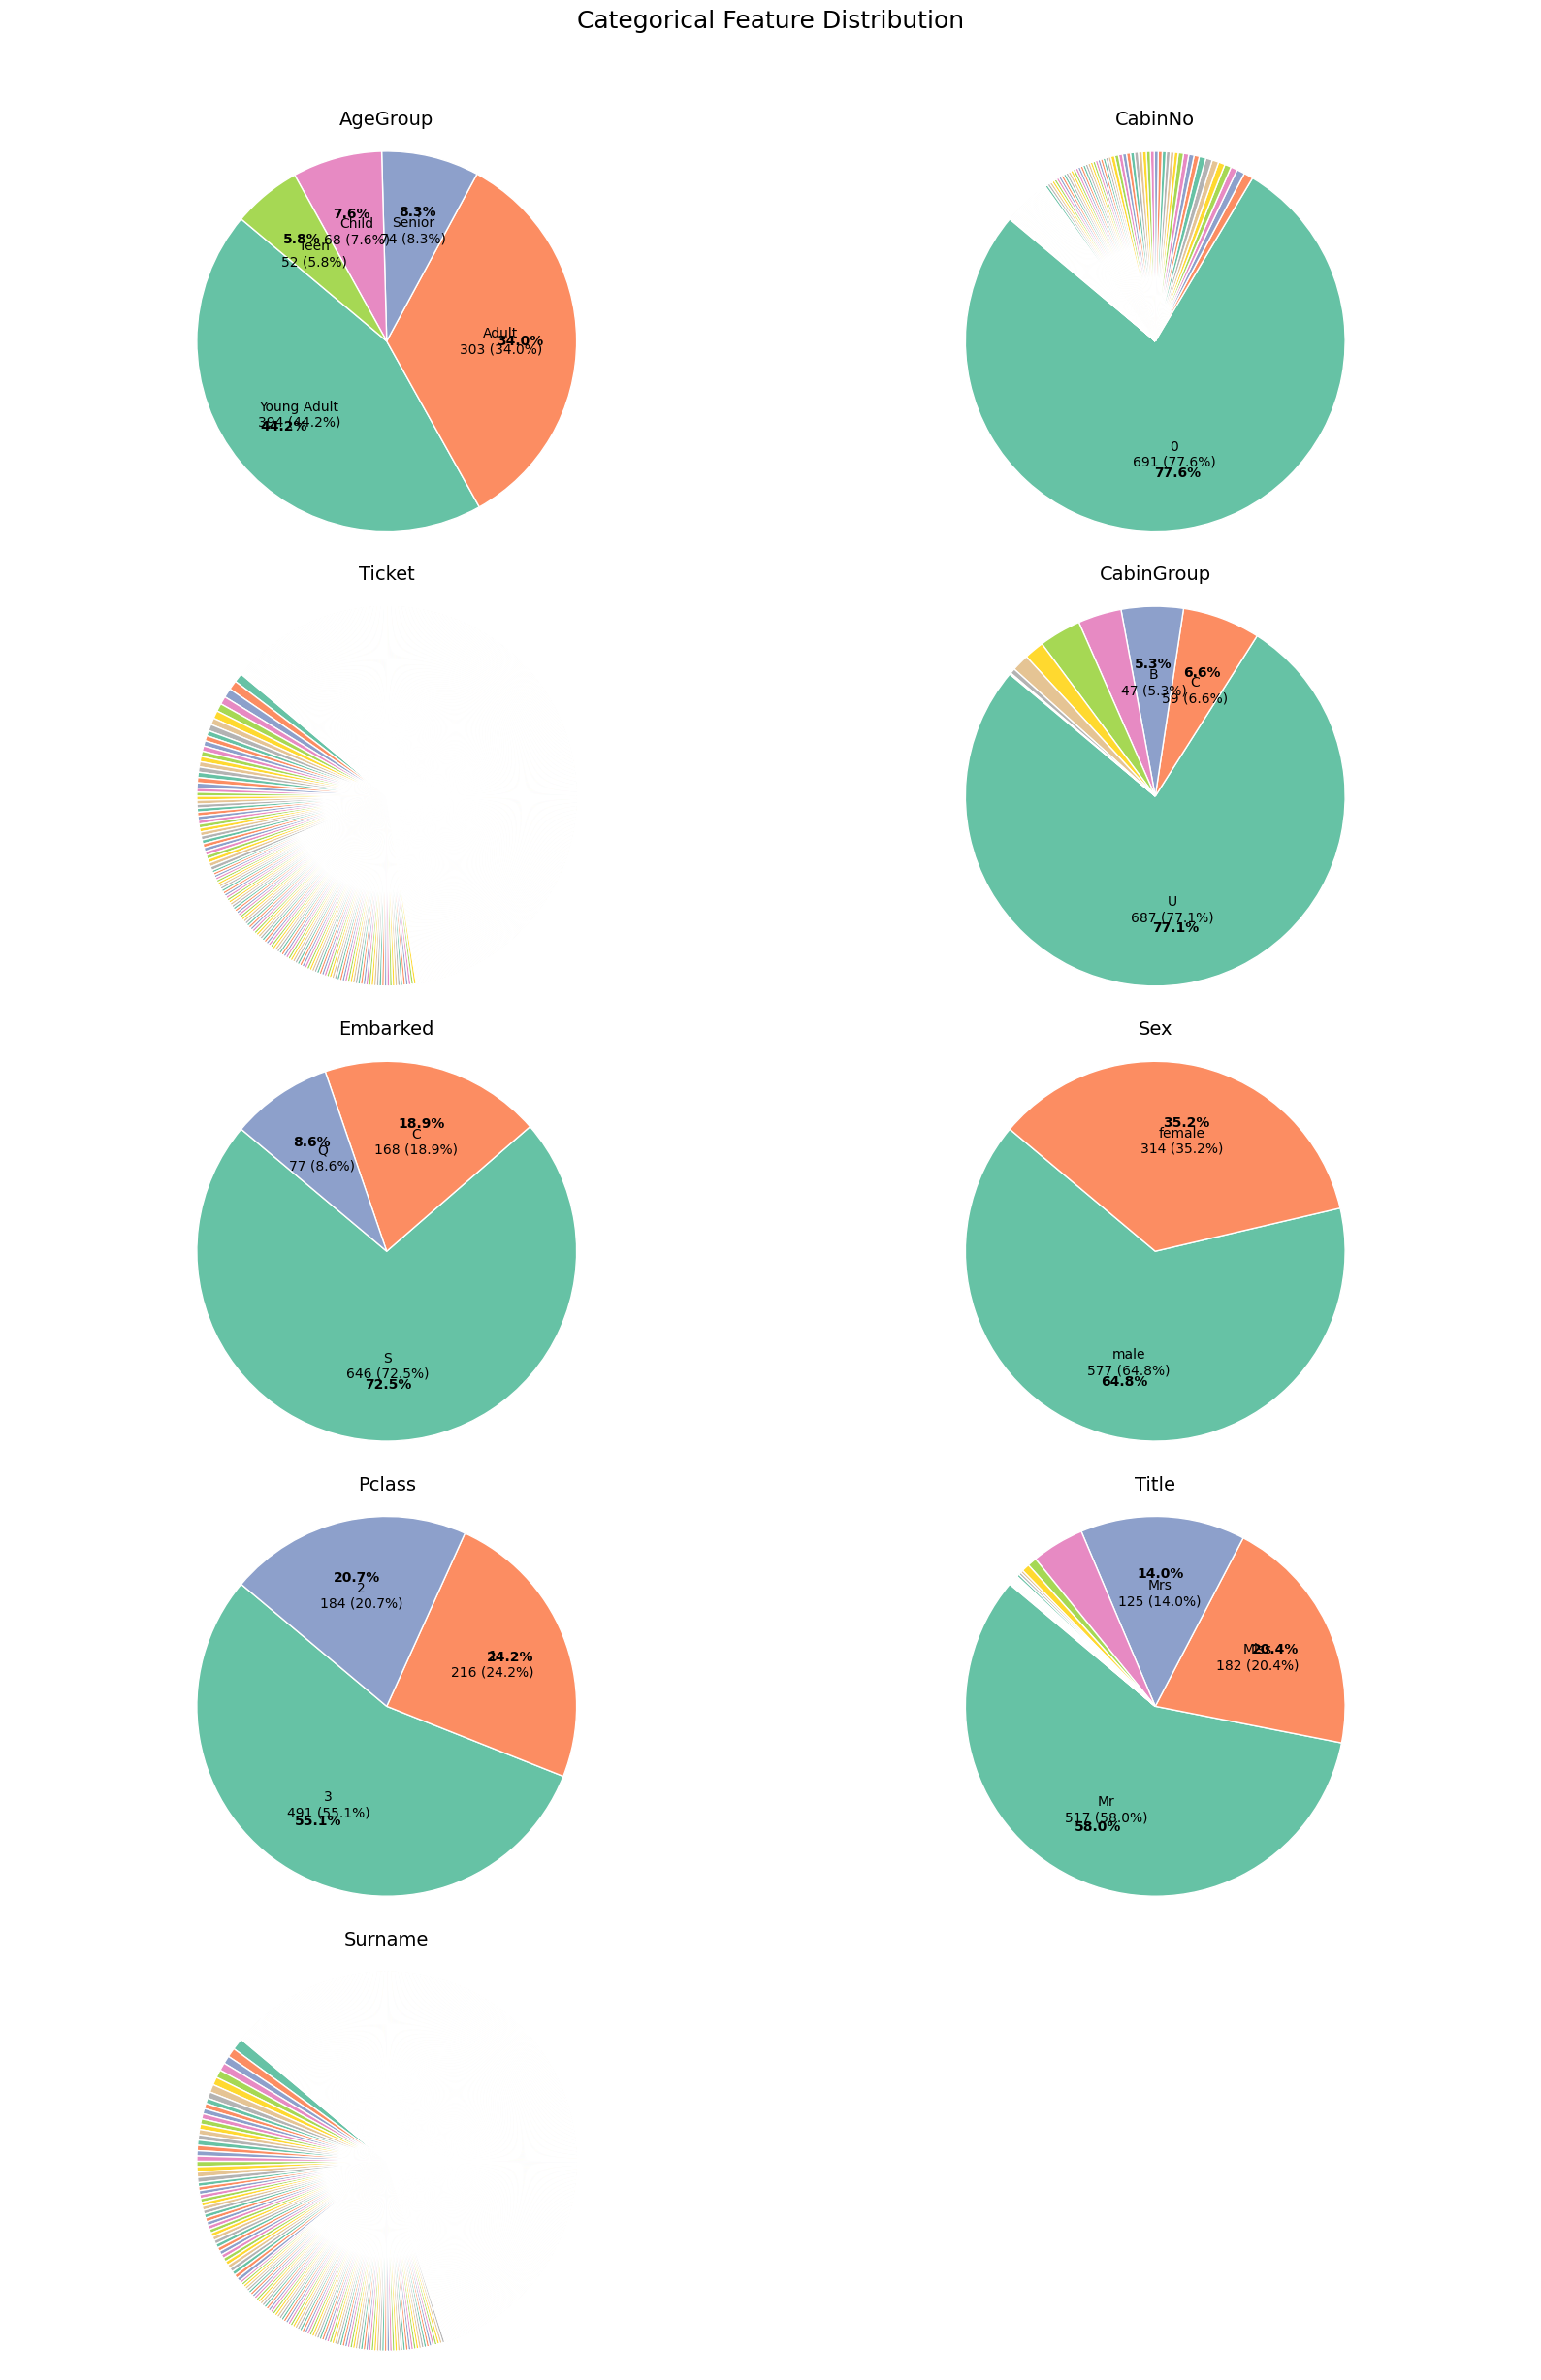

In [109]:
filtered_cat_cols = train_cat_df.drop(columns=['Cabin', 'Name', 'Survived']).columns
plot_cat_pie(train_cat_df, filtered_cat_cols, title='Categorical Feature Distribution')

In [110]:
#filtered_cat_cols = train_cat_df.drop(columns=['Cabin', 'Name', 'Survived']).columns

# Create 4x2 subplots (8 total)
#fig, axes = plt.subplots(5, 2, figsize=(16, 20))
#axes = axes.flatten() # Flatten to easily iterate

# Plot pie charts
#for idx, col in enumerate(filtered_cat_cols):
    # Calculate counts and proportions
    #value_counts = train_cat_df[col].value_counts()
    #value_props = train_cat_df[col].value_counts(normalize=True)
    
    # Filter out values below 5% for labels
    #significant_indices = value_props >= 0.05
    
    # Create labels only for significant values
    #labels = []
    #for i, (idx_val, count, prop) in enumerate(zip(value_counts.index, value_counts, value_props)):
        #if prop >= 0.05:
            #labels.append(f'{idx_val}\n{count} ({prop:.1%})')
        #else:
            #labels.append('')  # Empty label for small slices
    
    # Plot pie chart on subplot
    #ax = axes[idx]
    #wedges, texts, autotexts = ax.pie(
        #value_counts,
        #labels=labels,
        #autopct=lambda pct: f'{pct:.1f}%' if pct >= 5 else '',
        #pctdistance=0.7,  # Move percentage text inside the pie
        #labeldistance=0.6,  # Move labels inside the pie
        #startangle=140,
        #colors=sns.color_palette('Set2'),
        #wedgeprops=dict(edgecolor='w')
    #)
    
    # Adjust text properties for better visibility
    #for text in texts:
        #text.set_horizontalalignment('center')
    
    #for autotext in autotexts:
        #autotext.set_color('black')
        #autotext.set_weight('bold')
    
    #ax.set_title(f'Pie Chart of {col}')
    #ax.axis('equal')  # Equal aspect ratio ensures pie is a circle

# Hide any unused subplots if there are fewer than 8 features
#for j in range(len(filtered_cat_cols), len(axes)):
    #fig.delaxes(axes[j])

#plt.tight_layout()
#plt.show()

([<matplotlib.patches.Wedge at 0x79f2315dae60>,
 [Text(0.009696077779837801, -1.0999572655679344, ''),
  Text(0.2856375716037237, 1.0622669992465772, ''),
  Text(-0.6221674338010019, 0.9071425931558258, '')])

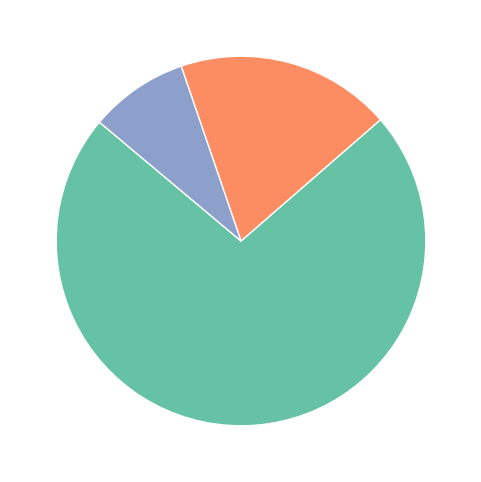

In [111]:
# Only plot pie chart for 'CabinNo' group for presentation
cabin_counts = train_cat_df['Embarked'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    cabin_counts,
    labels=None,  # No labels
    autopct=None,  # No percentages
    startangle=140,
    colors=sns.color_palette('Set2'),
    wedgeprops=dict(edgecolor='w')
)

In [112]:
def plot_cat_count(df, cat_cols, target_col='Survived', max_categories=10, title='Categorical Countplots'):
    """
    Create countplots for multiple categorical features with a binary target variable.

    Parameters:
    - df: pandas DataFrame
    - cat_cols: list of categorical column names
    - target_col: name of binary target column
    - max_categories: max number of unique values to display (others grouped into 'Other')
    - title: title for the entire plot grid
    """
    # Color-blind friendly palette: 0 = orange, 1 = blue
    cb_palette = {0: '#E69F00', 1: '#56B4E9'}

    n_cols = 2
    n_rows = math.ceil(len(cat_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle(title, fontsize=18)

    for idx, col in enumerate(cat_cols):
        # Handle high-cardinality columns
        if df[col].nunique() > max_categories:
            top_values = df[col].value_counts().nlargest(max_categories).index
            plot_df = df.copy()
            plot_df[col] = plot_df[col].astype(str)
            plot_df[col] = plot_df[col].where(plot_df[col].isin(top_values.astype(str)), 'Other')
        else:
            plot_df = df.copy()
            plot_df[col] = plot_df[col].astype(str)

        ax = axes[idx]
        plot = sns.countplot(data=plot_df, x=col, hue=target_col, palette=cb_palette, ax=ax)

        # Prepare group totals for percentage calculation
        group_totals = plot_df.groupby(col)[target_col].count()

        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                if height == 0:
                    continue
                x = bar.get_x() + bar.get_width() / 2
                label = bar.get_label()  # hue label (e.g., 0 or 1)
                cat = bar.get_x() + bar.get_width() / 2
                bar_x_cat = bar.get_x() + bar.get_width() / 2
                tick_label = bar.get_label()

                # Get x-category label (need to use x-ticks to get the right label)
                xticks = [tick.get_text() for tick in ax.get_xticklabels()]
                idx_x = round(bar.get_x() + bar.get_width() / 2)
                if idx_x < len(xticks):
                    x_category = xticks[idx_x]
                    total = group_totals.get(x_category, 0)
                    proportion = height / total if total else 0
                    if proportion >= 0.05:
                        text = f'{int(height)}\n({proportion:.1%})'
                        ax.text(x, height, text, ha='center', va='bottom', fontsize=8)

        ax.set_title(f'{col} by {target_col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

    # Remove unused axes
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

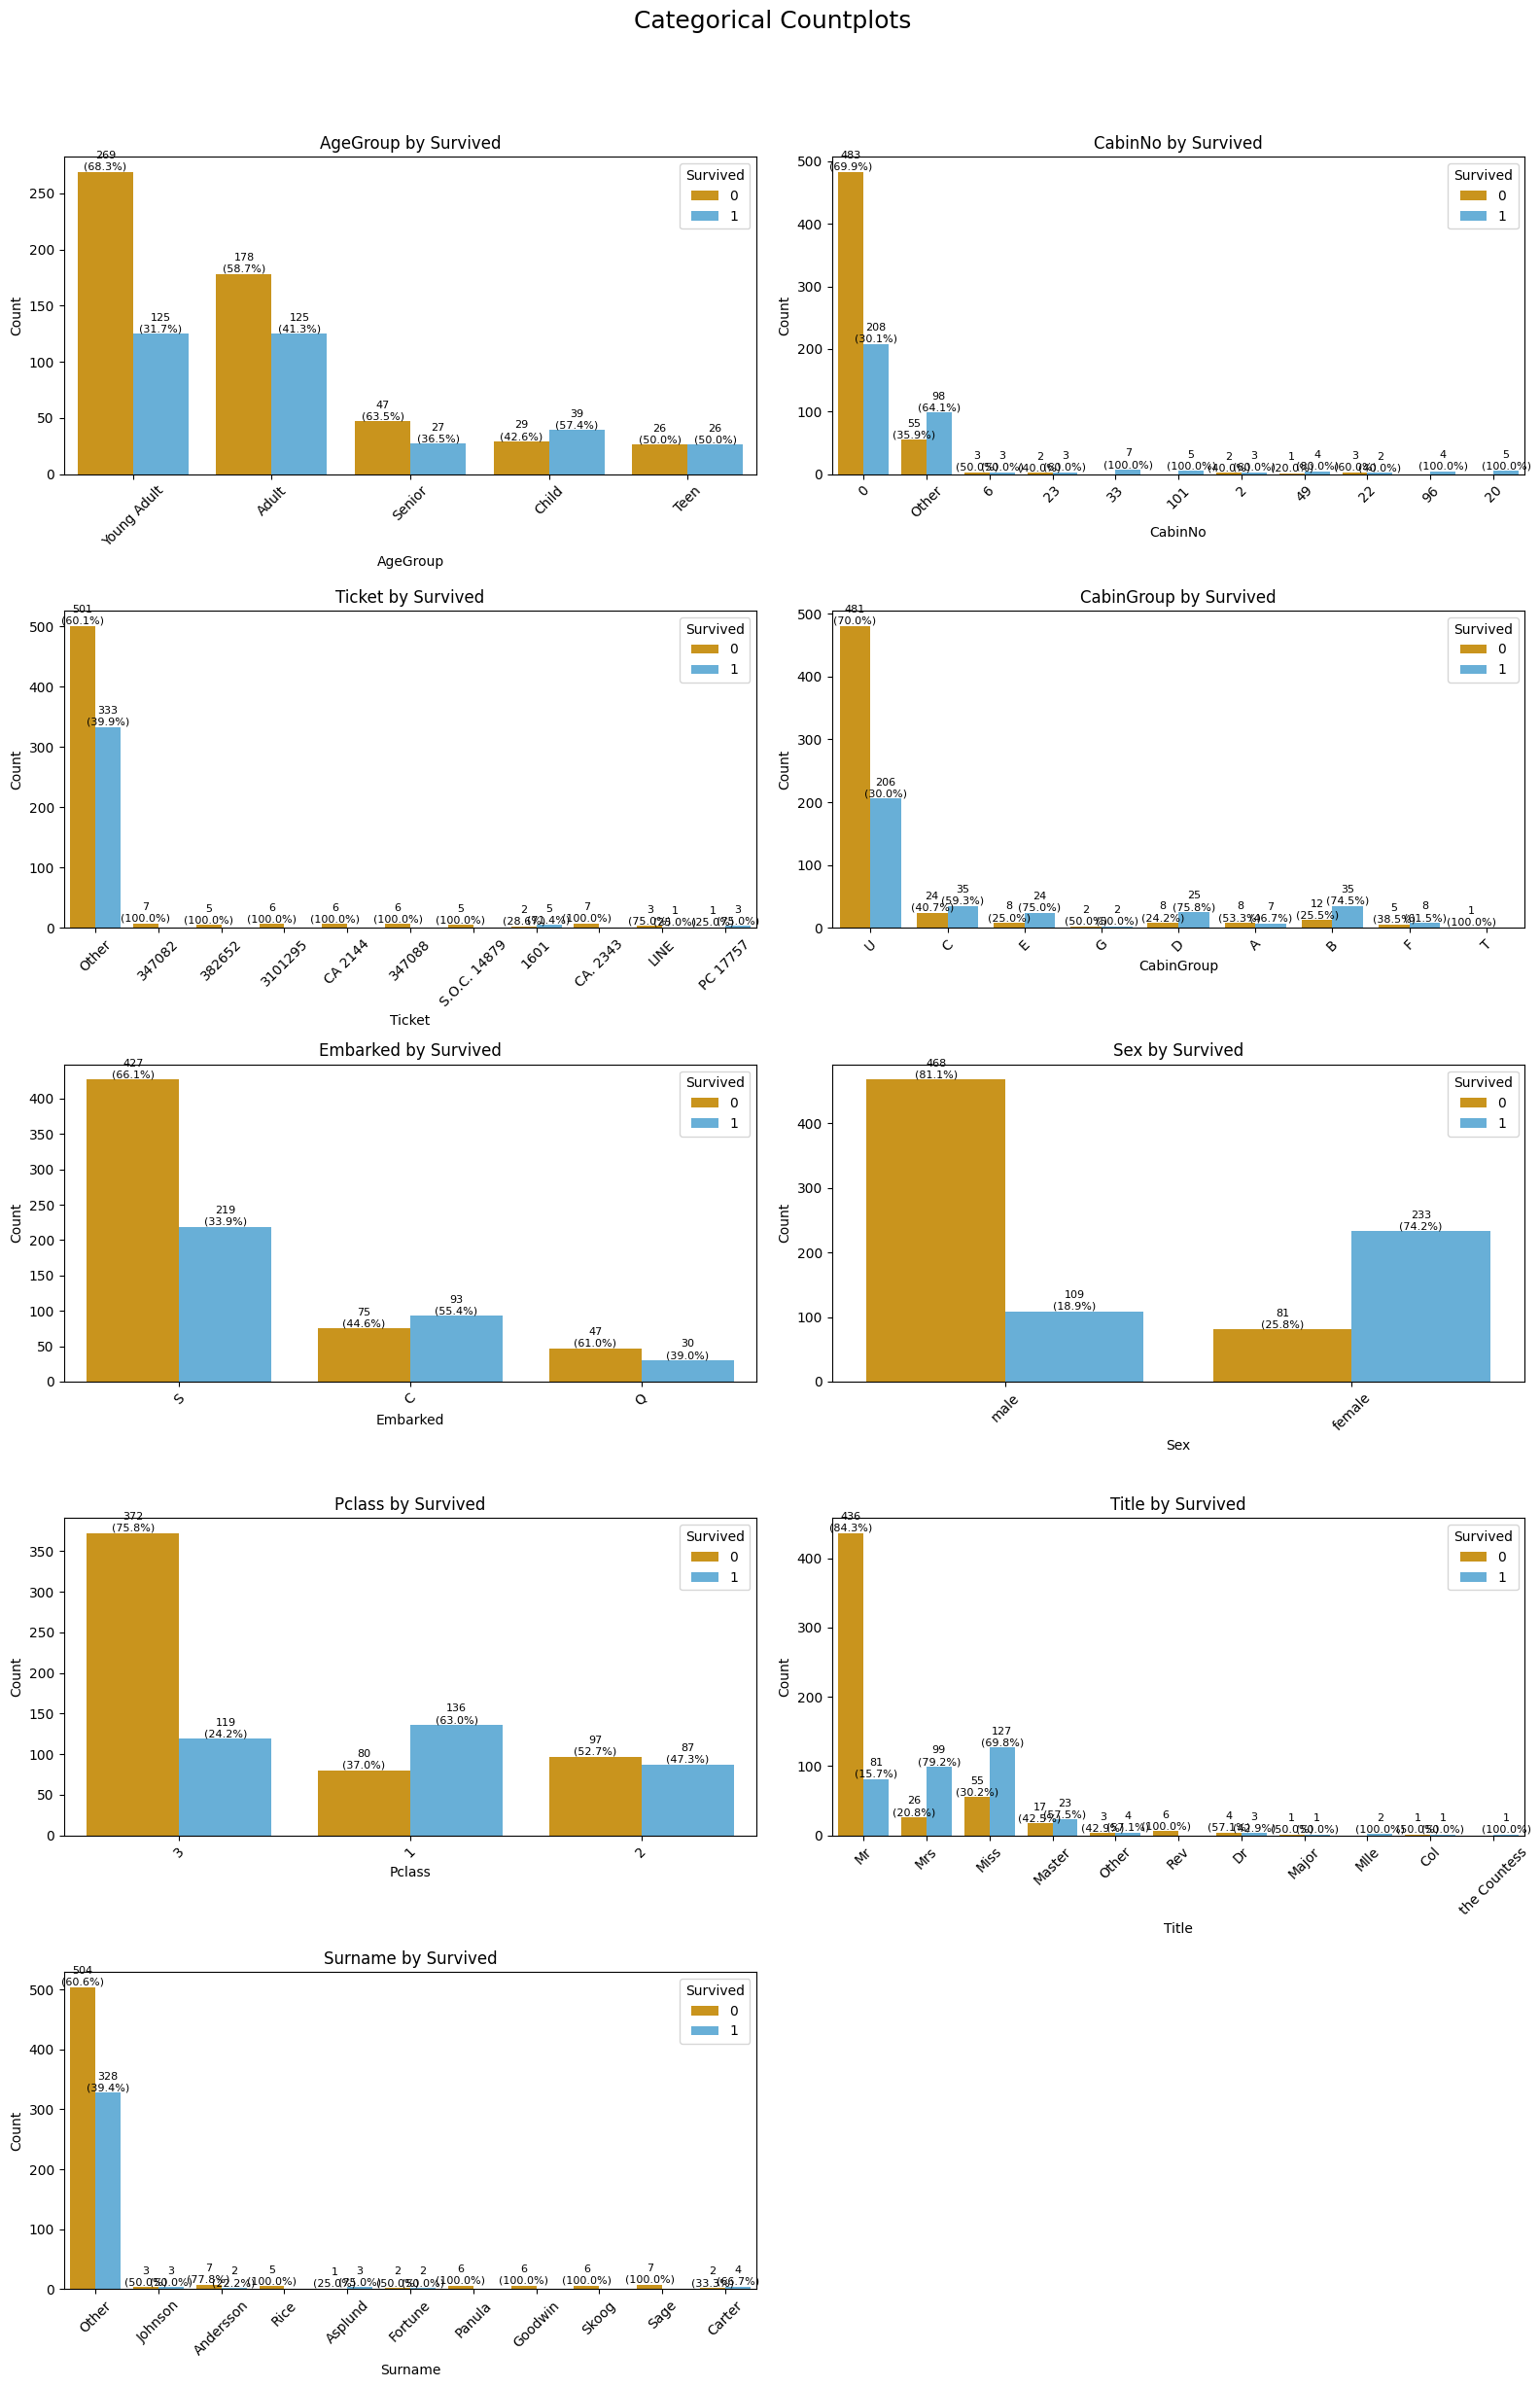

In [113]:
filtered_cat_cols = [col for col in train_cat_df.columns if col not in ['Survived', 'Cabin', 'Name']]
plot_cat_count(train_cat_df, filtered_cat_cols)

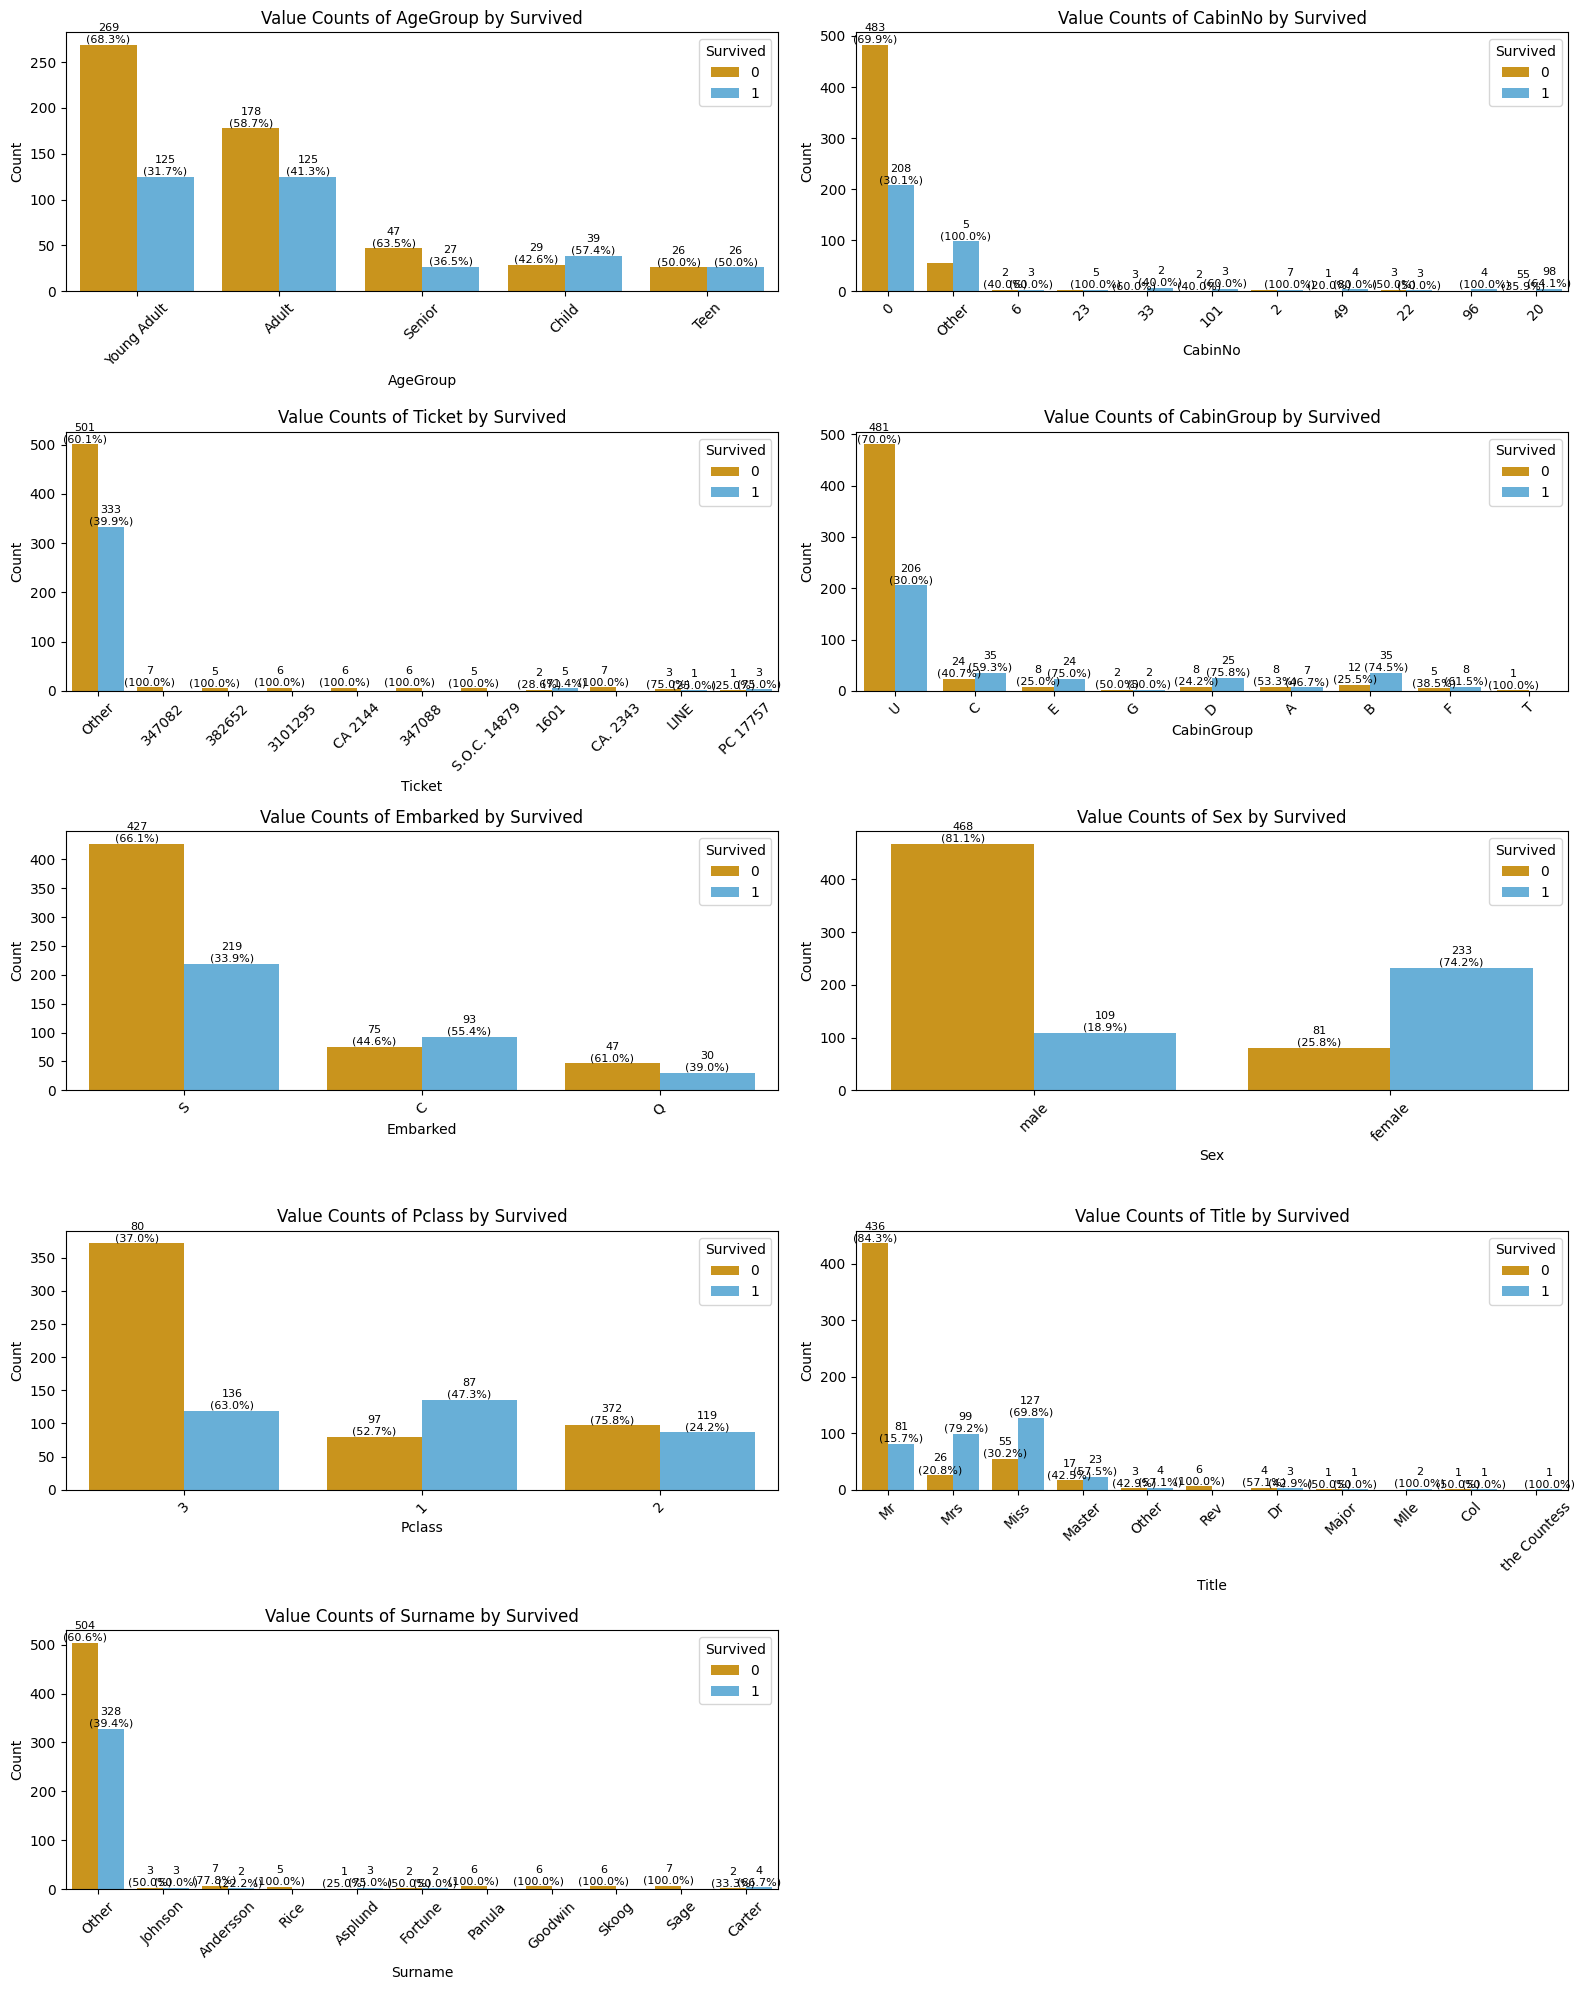

In [114]:
# Create 4x2 subplots (9 total)
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()  # Flatten to easily index in loop

for idx, col in enumerate(filtered_cat_cols):
    # For high-cardinality columns (like Ticket), limit to top 10 categories
    if len(train_cat_df[col].unique()) > 10:
        top_values = train_cat_df[col].value_counts().nlargest(10).index
        plot_df = train_cat_df.copy()
        plot_df[col] = plot_df[col].astype(str)
        plot_df[col] = plot_df[col].where(plot_df[col].isin(top_values.astype(str)), 'Other')
    else:
        plot_df = train_cat_df.copy()
        plot_df[col] = plot_df[col].astype(str)

    # Create count plot with hue = Survived on the current subplot
    ax = sns.countplot(data=plot_df, x=col, hue='Survived', palette=cb_palette, ax=axes[idx])
    
    # Get unique values and sort numerically if needed
    unique_values = plot_df[col].unique()
    if col in ['Pclass', 'CabinNo']:
        try:
            unique_values = sorted(unique_values, key=lambda x: int(x) if str(x).isdigit() else x)
        except:
            unique_values = sorted(unique_values)

    # Annotate bars
    for i, container in enumerate(ax.containers):
        survived_val = i % 2  # 0 for first container, 1 for second

        for j, bar in enumerate(container):
            x = bar.get_x() + bar.get_width() / 2
            height = bar.get_height()

            if j < len(unique_values):
                category_val = unique_values[j]
            else:
                continue

            # Count and proportion calculation
            total = len(plot_df[plot_df[col] == category_val])
            count = len(plot_df[(plot_df[col] == category_val) & (plot_df['Survived'] == survived_val)])
            proportion = count / total if total else 0

            if proportion >= 0.05:
                label = f'{count}\n({proportion:.1%})'
                ax.text(x, height, label, ha='center', va='bottom', fontsize=8)

    ax.set_title(f'Value Counts of {col} by Survived')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide unused subplots if fewer than 8 columns
for j in range(len(filtered_cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [115]:
# Crosstab with multiple levels in columns: Age Group and Survived
crosstab_survived = pd.crosstab(
    index=train_cat_df['AgeGroup'],
    columns=[train_cat_df['Sex'], train_cat_df['Survived']]
)
print(crosstab_survived)

Sex         female     male    
Survived         0   1    0   1
AgeGroup                       
Child           13  19   16  20
Teen             5  22   21   4
Young Adult     40  88  229  37
Adult           21  84  157  41
Senior           2  20   45   7


In [116]:
# Crosstab with multiple levels in columns: Age Group and Survived
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['Sex'], train_cat_df['Survived']]
)
print(crosstab_survived)

Sex          female      male    
Survived          0    1    0   1
Title                            
Capt              0    0    1   0
Col               0    0    1   1
Don               0    0    1   0
Dr                0    1    4   2
Jonkheer          0    0    1   0
Lady              0    1    0   0
Major             0    0    1   1
Master            0    0   17  23
Miss             55  127    0   0
Mlle              0    2    0   0
Mme               0    1    0   0
Mr                0    0  436  81
Mrs              26   99    0   0
Ms                0    1    0   0
Rev               0    0    6   0
Sir               0    0    0   1
the Countess      0    1    0   0


### Control Chart

In [117]:
def plot_p_charts(df, feature_cols, target_col='Survived', data_type='num', title='P-Charts', max_categories=10, bins=5):
    """
    Plot P-Charts for numerical or categorical features against a binary target.

    Parameters:
    - df: pandas DataFrame
    - feature_cols: list of column names to analyze
    - target_col: target variable (binary, e.g., 'Survived')
    - data_type: 'num' for numerical features, 'cat' for categorical features
    - title: title of the plot
    - max_categories: max categories to show in categorical plots
    - bins: number of quantile bins for numerical plots
    """
    if data_type == 'num':
        n_cols = len(feature_cols)
        fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 6))
        axes = axes.flatten()

        for i, col in enumerate(feature_cols):
            ax = axes[i]
            data = df[[col, target_col]].dropna().copy()

            if pd.api.types.is_numeric_dtype(data[col]):
                data['binned'] = pd.qcut(data[col], q=bins, duplicates='drop')
            else:
                data['binned'] = data[col]

            grouped = data.groupby('binned')[target_col]
            p_hat = grouped.mean()
            n_per_bin = grouped.count()
            p_bar = data[target_col].mean()
            ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / n_per_bin)
            lcl = (p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / n_per_bin)).clip(lower=0)

            bin_labels = p_hat.index.astype(str)
            ax.plot(bin_labels, p_hat.values, 'bo-', label='Survival Rate')
            ax.axhline(p_bar, color='r', linestyle='--', label='CL')
            ax.plot(bin_labels, ucl.values, 'g--', label='UCL')
            ax.plot(bin_labels, lcl.values, 'g--', label='LCL')
            ax.set_title(f'Survival by {col}')
            ax.set_xticklabels(bin_labels, rotation=45, ha='right')
            ax.set_ylim(0, 1.1)
            ax.grid(True)

        for j in range(n_cols, len(axes)):
            fig.delaxes(axes[j])

        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig.suptitle(title, fontsize=16, y=1.02)
        plt.show()

    elif data_type == 'cat':
        n_cols = len(feature_cols)
        n_rows = int(np.ceil(n_cols / 2))
        fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
        axes = axes.flatten()

        for idx, col in enumerate(feature_cols):
            if col not in df.columns:
                continue

            if df[col].nunique() > max_categories:
                top_values = df[col].value_counts().nlargest(max_categories).index
                filtered_df = df[df[col].isin(top_values)]
            else:
                filtered_df = df

            count_per_group = filtered_df.groupby(col)[target_col].count()
            survived_per_group = filtered_df.groupby(col)[target_col].sum()
            p_hat = survived_per_group / count_per_group
            p_bar = df[target_col].mean()
            ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
            lcl = (p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)).clip(lower=0)

            ax = axes[idx]
            ax.plot(range(len(p_hat)), p_hat.values, 'bo-', label='Survival Rate')
            ax.axhline(p_bar, color='red', linestyle='--', label='CL')
            ax.plot(range(len(p_hat)), ucl, 'g--', label='UCL')
            ax.plot(range(len(p_hat)), lcl, 'g--', label='LCL')
            ax.set_xticks(range(len(p_hat)))
            ax.set_xticklabels(p_hat.index.astype(str), rotation=45, ha='right')
            ax.set_title(f'P-Chart: Survival Rate by {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Proportion Survived')
            ax.set_ylim(0, 1)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.legend()

        for j in range(n_cols, len(axes)):
            fig.delaxes(axes[j])

        fig.tight_layout()
        fig.suptitle(title, fontsize=16, y=1.02)
        plt.show()

    else:
        print("Invalid data_type. Use 'num' or 'cat'.")

<ipython-input-117-d01b67dc74f4>:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_per_group = filtered_df.groupby(col)[target_col].count()
<ipython-input-117-d01b67dc74f4>:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_per_group = filtered_df.groupby(col)[target_col].sum()


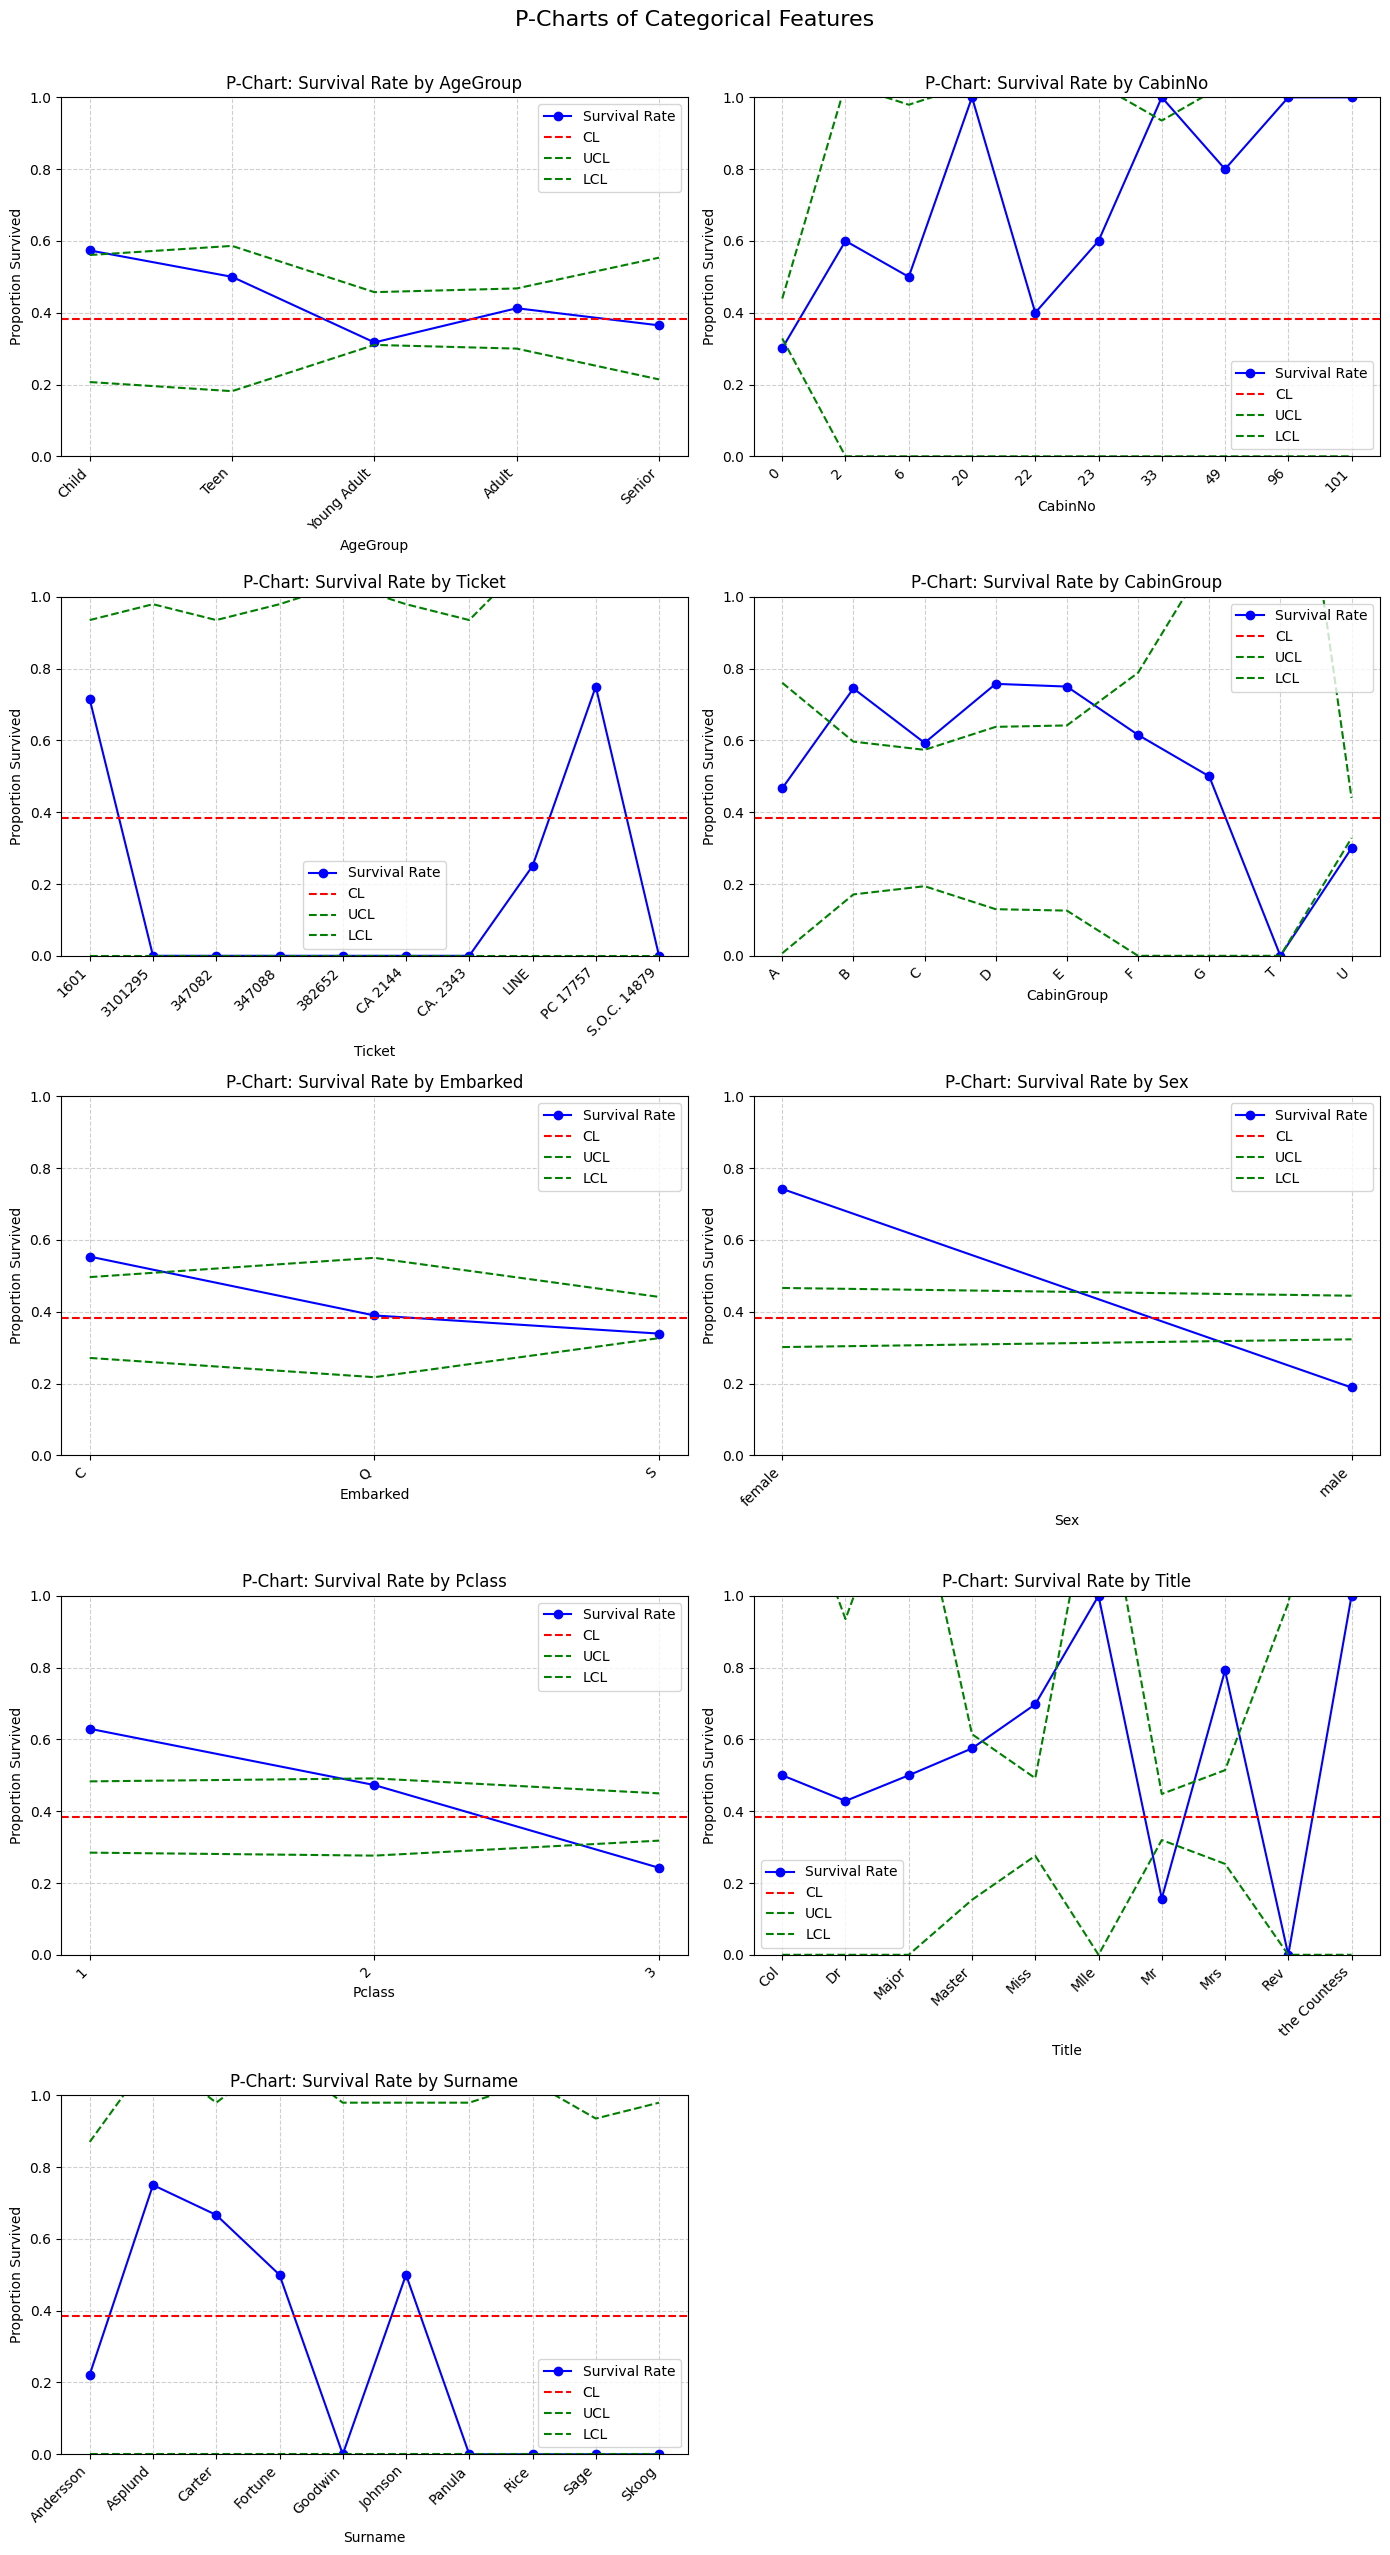

In [118]:
cat_cols = [col for col in train_cat_df.columns if col not in ['Name', 'Cabin', 'Survived']]
plot_p_charts(train_cat_df, cat_cols, target_col='Survived', data_type='cat', title='P-Charts of Categorical Features')

In [119]:
# Columns to analyze (excluding Name, Ticket, Cabin)
#cat_cols = [col for col in train_cat_df.columns if col not in ['Name', 'Cabin', 'Survived']]

# Create 5x2 subplot grid
#fig, axes = plt.subplots(5, 2, figsize=(16, 20))
#axes = axes.flatten()  # Flatten to easily index in loop

#for idx, col in enumerate(cat_cols):
    # For high-cardinality columns, limit to top categories
    #if len(train_cat_df[col].unique()) > 10:
        # Get the top 10 values by frequency
        #top_values = train_cat_df[col].value_counts().nlargest(10).index
        
        # Create a filtered dataframe with only those values
        #filtered_df = train_cat_df[train_cat_df[col].isin(top_values)]
    #else:
        #filtered_df = train_cat_df
    
    # Count total and survived per category
    #count_per_group = filtered_df.groupby(col)['Survived'].count()
    #survived_per_group = filtered_df.groupby(col)['Survived'].sum()
    
    # Proportion of survivors per group
    #p_hat = survived_per_group / count_per_group
    
    # Overall proportion of survivors - use the original dataset for this
    #p_bar = train_cat_df['Survived'].mean()
    
    # Control limits
    #ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
    #lcl = p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
    #lcl = lcl.clip(lower=0)  # Avoid negative lower limits
    
    # Get the current subplot
    #ax = axes[idx]
    
    # Plot on the current subplot
    #ax.plot(range(len(p_hat)), p_hat.values, 'bo-', label='Survival Rate')
    #ax.axhline(p_bar, color='red', linestyle='--', label='Center Line (p̄)')
    #ax.plot(range(len(p_hat)), ucl, 'g--', label='UCL')
    #ax.plot(range(len(p_hat)), lcl, 'g--', label='LCL')
    
    # Set x-ticks at appropriate positions with labels
    #ax.set_xticks(range(len(p_hat)))
    #ax.set_xticklabels(p_hat.index.astype(str), rotation=45, ha='right')
    
    # Add titles and labels
    #ax.set_title(f'P-Chart: Survival Rate by {col}')
    #ax.set_xlabel(col)
    #ax.set_ylabel('Proportion Survived')
    #ax.set_ylim(0, 1)
    #ax.grid(True, linestyle='--', alpha=0.6)
    #ax.legend()

# Hide any unused subplots
#for j in range(len(cat_cols), len(axes)):
    #fig.delaxes(axes[j])

#plt.tight_layout()
#plt.show()

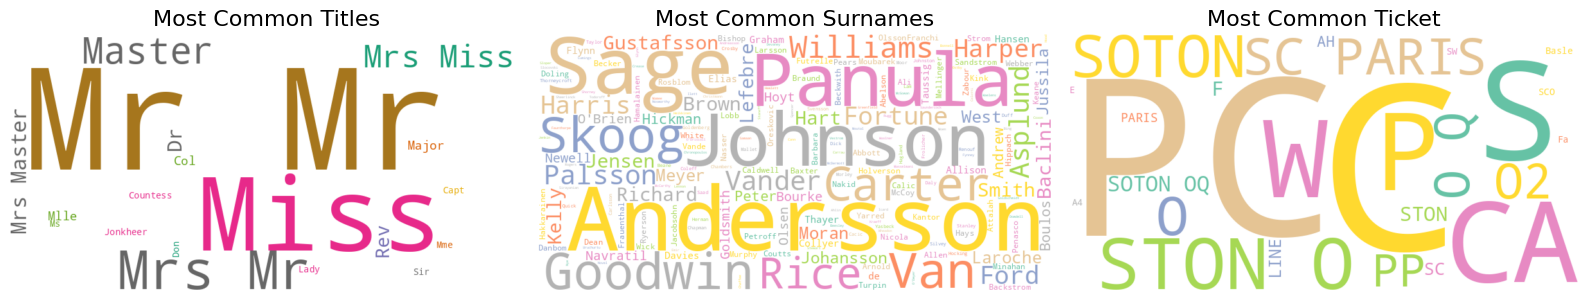

In [120]:
# Combine all values from 'Title' and 'Surname' columns into single strings
title_text = ' '.join(train_cat_df['Title'].dropna().astype(str))
surname_text = ' '.join(train_cat_df['Surname'].dropna().astype(str))
ticket_text = ' '.join(train_cat_df['Ticket'].dropna().astype(str))

# Create WordCloud objects
title_wc = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(title_text)
surname_wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(surname_text)
ticket_wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(ticket_text)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Title Word Cloud
plt.subplot(1, 3, 1)
plt.imshow(title_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Titles', fontsize=16)

# Surname Word Cloud
plt.subplot(1, 3, 2)
plt.imshow(surname_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Surnames', fontsize=16)

# Ticket Word Cloud
plt.subplot(1, 3, 3)
plt.imshow(ticket_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Ticket', fontsize=16)

plt.tight_layout()
plt.show()

In [121]:
# Crosstab with multiple levels in columns: Sex and Survived
crosstab_survived = pd.crosstab(
    index=train_cat_df['AgeGroup'],
    columns=[train_cat_df['Sex'], train_cat_df['Survived']]
)
print(crosstab_survived)

Sex         female     male    
Survived         0   1    0   1
AgeGroup                       
Child           13  19   16  20
Teen             5  22   21   4
Young Adult     40  88  229  37
Adult           21  84  157  41
Senior           2  20   45   7


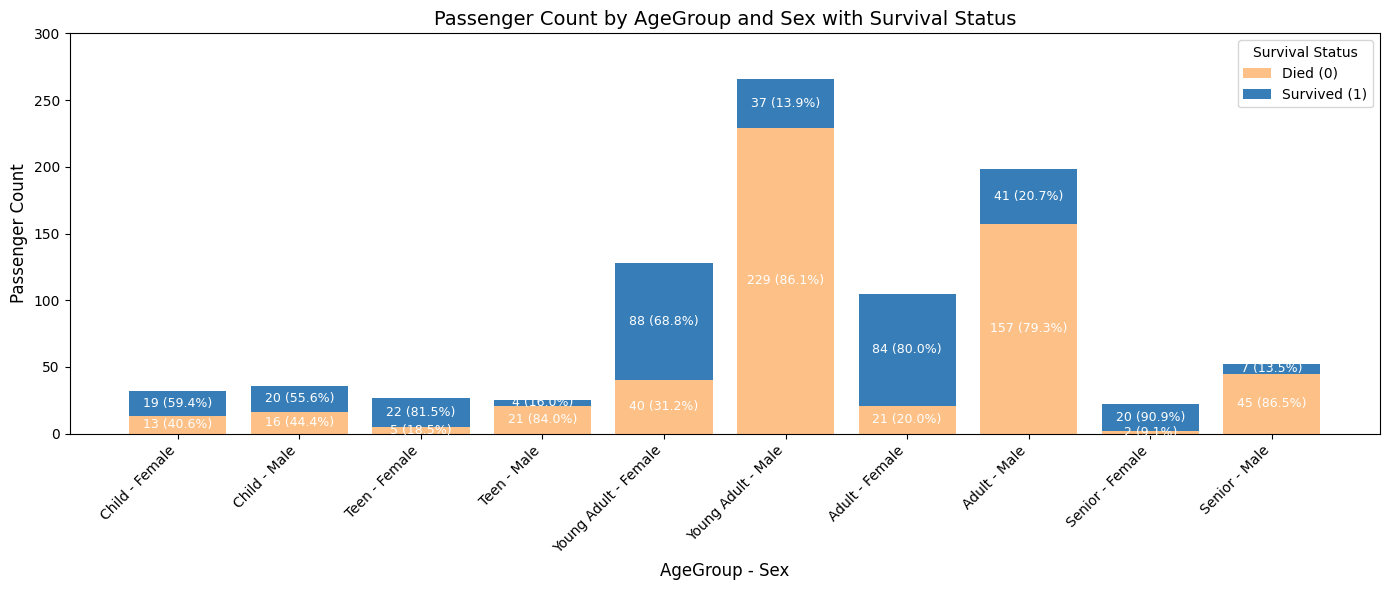

In [122]:
# Crosstab: (AgeGroup, Sex) vs Survived
crosstab = pd.crosstab(
    index=[train_cat_df['AgeGroup'], train_cat_df['Sex']],
    columns=train_cat_df['Survived']
)

# Ensure columns 0 and 1 exist
for col in [0, 1]:
    if col not in crosstab.columns:
        crosstab[col] = 0

# Rename for clarity
crosstab.columns = ['Died (0)', 'Survived (1)']

# Flatten index
crosstab = crosstab.reset_index()

# Create readable x-axis labels
crosstab['GroupLabel'] = crosstab['AgeGroup'].astype(str) + ' - ' + crosstab['Sex'].str.capitalize()

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
x = range(len(crosstab))

# Bar colors (colorblind-friendly): grey = died, blue = survived
colors = ['#fdc086', '#377eb8']

# Plot Died (bottom)
ax.bar(x, crosstab['Died (0)'], color=colors[0], label='Died (0)')

# Plot Survived (stacked above Died)
ax.bar(x, crosstab['Survived (1)'], bottom=crosstab['Died (0)'], color=colors[1], label='Survived (1)')

# Annotate each segment with count and %
for i in x:
    died = crosstab.loc[i, 'Died (0)']
    survived = crosstab.loc[i, 'Survived (1)']
    total = died + survived

    if died > 0:
        percent = (died / total) * 100
        ax.text(i, died / 2, f'{died} ({percent:.1f}%)', ha='center', va='center', fontsize=9, color='white')
    if survived > 0:
        percent = (survived / total) * 100
        ax.text(i, died + survived / 2, f'{survived} ({percent:.1f}%)', ha='center', va='center', fontsize=9, color='white')

# Formatting
ax.set_title('Passenger Count by AgeGroup and Sex with Survival Status', fontsize=14)
ax.set_xlabel('AgeGroup - Sex', fontsize=12)
ax.set_ylabel('Passenger Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(crosstab['GroupLabel'], rotation=45, ha='right')

# Y-axis ticks
max_y = (crosstab['Died (0)'] + crosstab['Survived (1)']).max()
ax.set_yticks(range(0, int(max_y) + 50, 50))

# Legend
ax.legend(title='Survival Status')

plt.tight_layout()
plt.show()

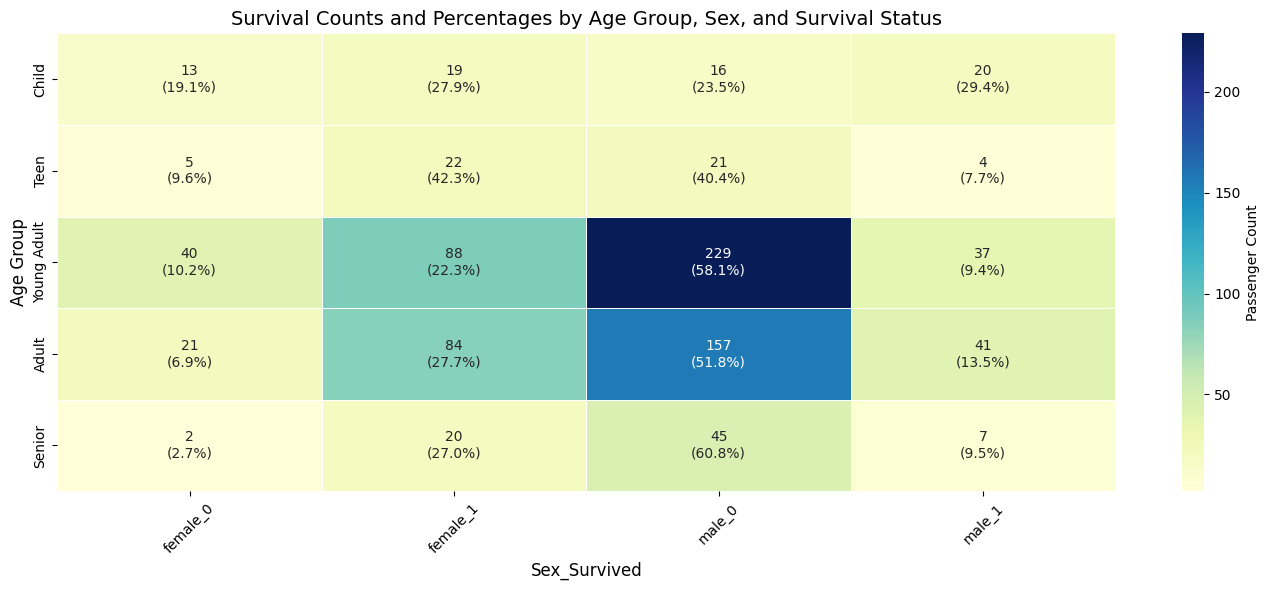

In [123]:
# Create crosstab: AgeGroup vs (Sex, Survived)
crosstab_survived = pd.crosstab(
    index=train_cat_df['AgeGroup'],
    columns=[train_cat_df['Sex'], train_cat_df['Survived']]
)

# Total row-wise sum (to compute % later)
row_totals = crosstab_survived.sum(axis=1)

# Create % DataFrame for annotation
percent_df = crosstab_survived.div(row_totals, axis=0) * 100
percent_annot = percent_df.round(1).astype(str) + '%'

# Combine count and percentage for annotation
annot_df = crosstab_survived.astype(str) + '\n(' + percent_annot + ')'

# Flatten MultiIndex for heatmap column names
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]
annot_df.columns = crosstab_survived.columns

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    crosstab_survived,
    annot=annot_df,
    fmt='',
    cmap='YlGnBu',
    cbar_kws={'label': 'Passenger Count'},
    linewidths=0.5
)

plt.title('Survival Counts and Percentages by Age Group, Sex, and Survival Status', fontsize=14)
plt.xlabel('Sex_Survived', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [124]:
# Crosstab with multiple levels in columns: Sex and Survived
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['Sex'], train_cat_df['Survived']]
)
print(crosstab_survived)

Sex          female      male    
Survived          0    1    0   1
Title                            
Capt              0    0    1   0
Col               0    0    1   1
Don               0    0    1   0
Dr                0    1    4   2
Jonkheer          0    0    1   0
Lady              0    1    0   0
Major             0    0    1   1
Master            0    0   17  23
Miss             55  127    0   0
Mlle              0    2    0   0
Mme               0    1    0   0
Mr                0    0  436  81
Mrs              26   99    0   0
Ms                0    1    0   0
Rev               0    0    6   0
Sir               0    0    0   1
the Countess      0    1    0   0


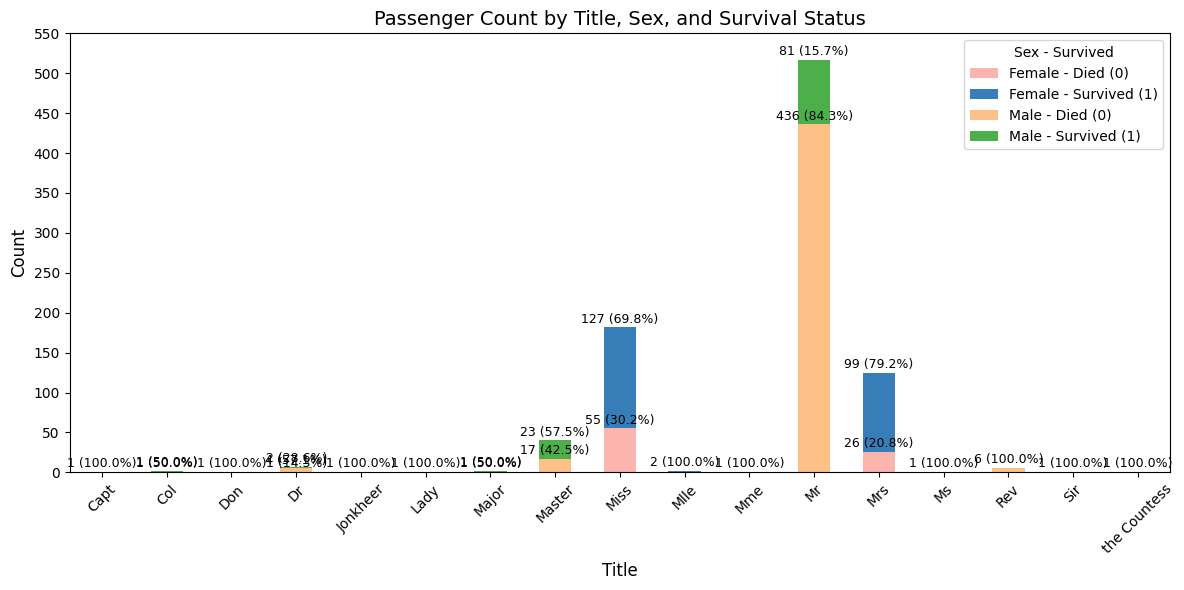

In [125]:
# Crosstab: Title vs (Sex, Survived)
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['Sex'], train_cat_df['Survived']]
)

# Ensure column order: Female 0, Female 1, Male 0, Male 1
expected_order = [('female', 0), ('female', 1), ('male', 0), ('male', 1)]
crosstab_survived = crosstab_survived.reindex(columns=expected_order, fill_value=0)

# Colorblind-friendly palette
colors = [
    '#fbb4ae',  # Light pink - Female Died
    '#377eb8',  # Blue - Female Survived
    '#fdc086',  # Light orange - Male Died
    '#4daf4a'   # Green - Male Survived
]

# Plot
ax = crosstab_survived.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=colors
)

# Titles and labels
plt.title('Passenger Count by Title, Sex, and Survival Status', fontsize=14)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Set y-axis ticks every 50
max_y = crosstab_survived.sum(axis=1).max()
plt.yticks(range(0, int(max_y) + 50, 50))

# Legend
plt.legend([
    'Female - Died (0)', 'Female - Survived (1)',
    'Male - Died (0)', 'Male - Survived (1)'
], title='Sex - Survived')

# Add annotations on top of each segment
for i, title in enumerate(crosstab_survived.index):
    bottom = 0
    total = crosstab_survived.loc[title].sum()
    for j, count in enumerate(crosstab_survived.loc[title]):
        if count > 0:
            percent = (count / total) * 100
            ax.text(
                i,                             # x
                bottom + count + 2,            # y: just above the bar segment
                f'{count} ({percent:.1f}%)',
                ha='center',
                va='bottom',
                fontsize=9,
                color='black'
            )
            bottom += count  # update bottom for stacking

plt.tight_layout()
plt.show()

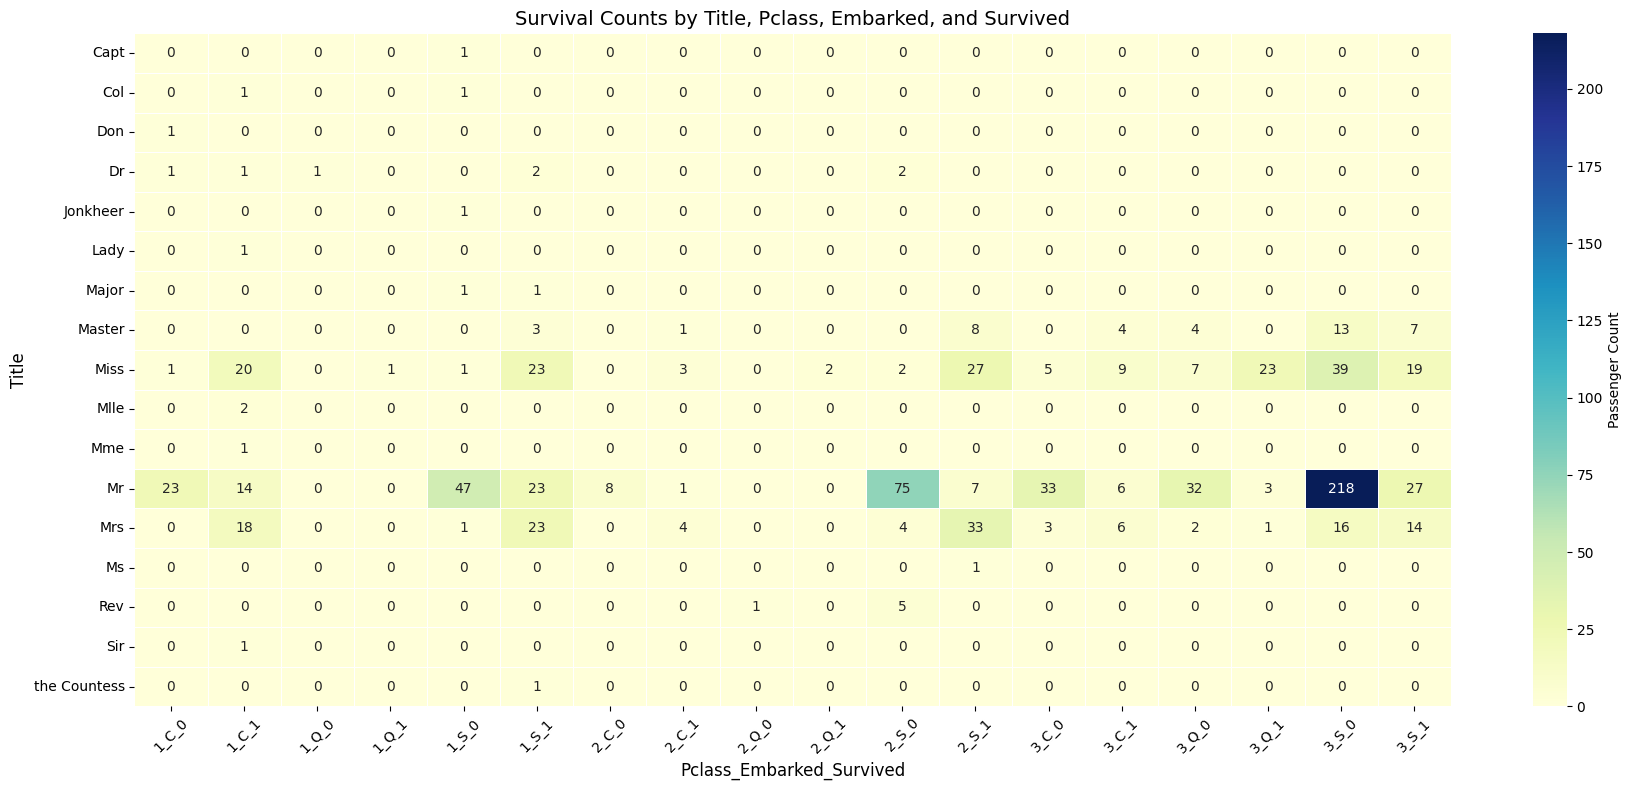

In [126]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['Pclass'], train_cat_df['Embarked'], train_cat_df['Survived']]
)

# Total row-wise sum (to compute % later)
#row_totals = crosstab_survived.sum(axis=1)

# Create % DataFrame for annotation
#percent_df = crosstab_survived.div(row_totals, axis=0) * 100
#percent_annot = percent_df.round(1).astype(str) + '%'

# Combine count and percentage for annotation
#annot_df = crosstab_survived.astype(str) + '\n(' + percent_annot + ')'

# Flatten MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]
#annot_df.columns = crosstab_survived.columns

# Plot heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(
    crosstab_survived,
    annot=True, #Change annot_df display annotate
    fmt='',  # <-- Set to empty string since annot contains strings
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Passenger Count'}
)

plt.title('Survival Counts by Title, Pclass, Embarked, and Survived', fontsize=14)
plt.xlabel('Pclass_Embarked_Survived', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

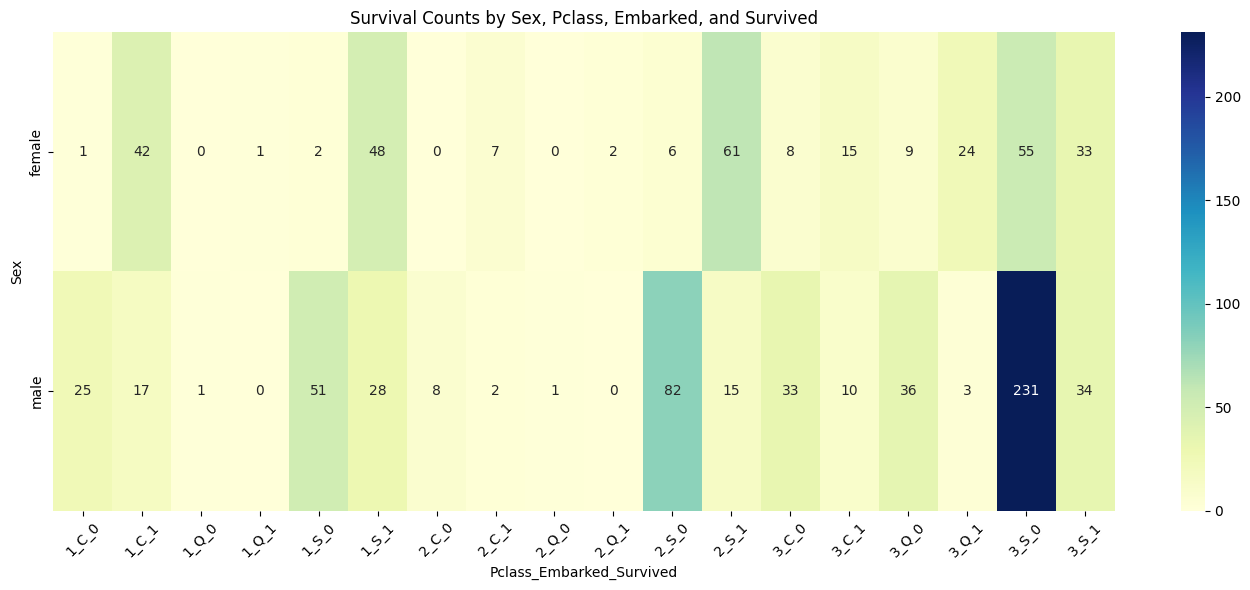

In [127]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['Sex'],
    columns=[train_cat_df['Pclass'], train_cat_df['Embarked'], train_cat_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Sex, Pclass, Embarked, and Survived')
plt.xlabel('Pclass_Embarked_Survived')
plt.ylabel('Sex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[go to top](#top)  

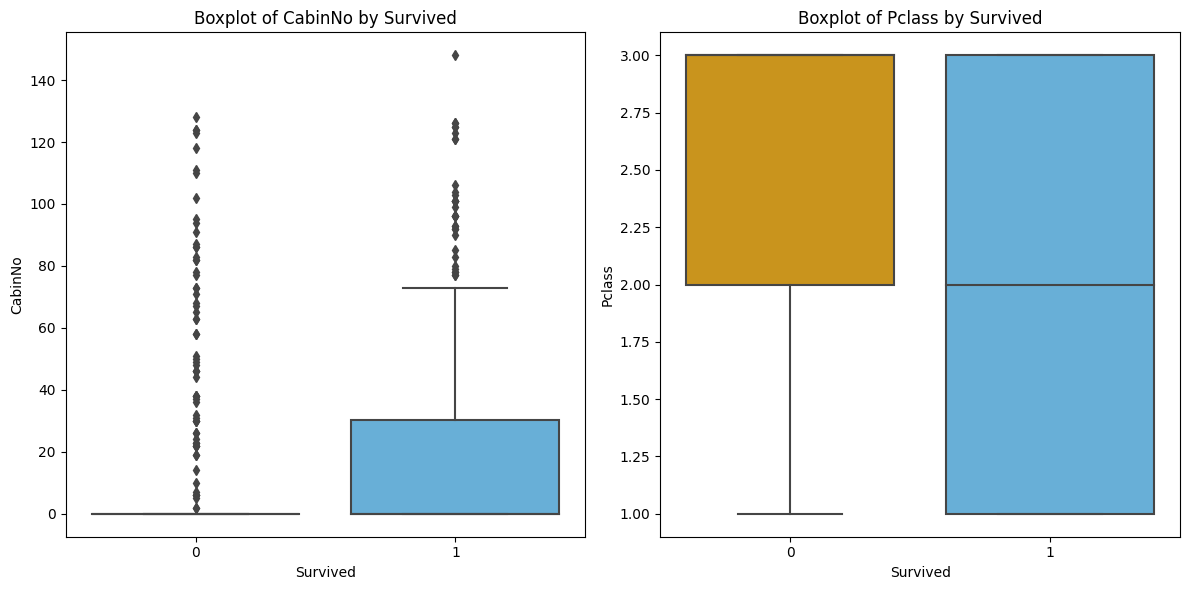

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

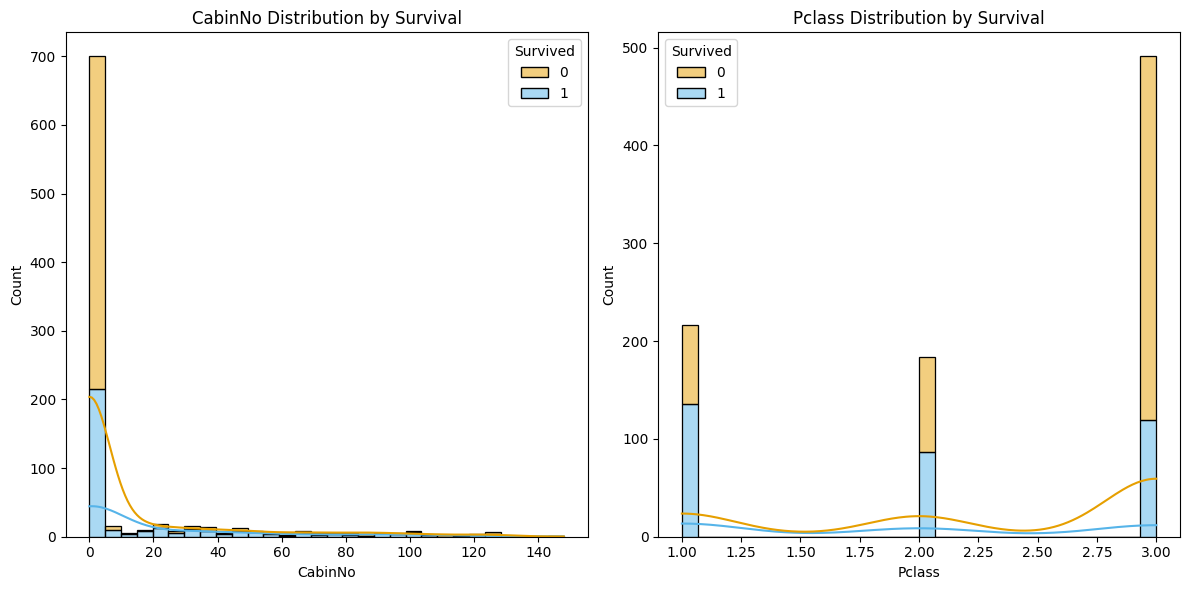

In [128]:
# Select numerical columns (CabinNo and Surname) from the dataset
numerical_cols = ['CabinNo', 'Pclass']

# Set the figure size for boxplots
plt.figure(figsize=(12, 6))

# Loop through numerical columns to create boxplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='Survived', y=col, data=train_cat_df, palette=cb_palette)
    plt.title(f'Boxplot of {col} by Survived')
    plt.xlabel('Survived')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Set the figure size for histograms
plt.figure(figsize=(12, 6))

# Loop through numerical columns to create histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=train_cat_df, x=col, hue='Survived', kde=True, bins=30, palette=cb_palette, multiple='stack')
    plt.title(f'{col} Distribution by Survival', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [129]:
# Create a crosstab (pivot-style) to count cabins across Pclass
cabin_pivot = pd.crosstab(train_cat_df['CabinNo'], train_cat_df['Survived'])

# Show only cabins with the highest total counts (top 10)
cabin_pivot['Total'] = cabin_pivot.sum(axis=1)
cabin_pivot_top10 = cabin_pivot.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column for cleaner display if needed
cabin_pivot_top10 = cabin_pivot_top10.drop(columns='Total')

# Display the result
print("\nTop 10 Cabin counts by Pclass (Pivot Table format):")
print(cabin_pivot_top10)


Top 10 Cabin counts by Pclass (Pivot Table format):
Survived    0    1
CabinNo           
0         483  208
33          0    7
6           3    3
101         0    5
49          1    4
2           2    3
23          2    3
22          3    2
20          0    5
36          1    3


In [130]:
# Create a crosstab (pivot-style) to count cabins across Pclass
cabin_pivot = pd.crosstab(train_cat_df['Surname'], train_cat_df['Survived'])

# Show only cabins with the highest total counts (top 10)
cabin_pivot['Total'] = cabin_pivot.sum(axis=1)
cabin_pivot_top10 = cabin_pivot.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column for cleaner display if needed
cabin_pivot_top10 = cabin_pivot_top10.drop(columns='Total')

# Display the result
print("\nTop 10 Cabin counts by Pclass (Pivot Table format):")
print(cabin_pivot_top10)


Top 10 Cabin counts by Pclass (Pivot Table format):
Survived   0  1
Surname        
Andersson  7  2
Sage       7  0
Panula     6  0
Carter     2  4
Goodwin    6  0
Johnson    3  3
Skoog      6  0
Rice       5  0
Palsson    4  0
Baclini    0  4


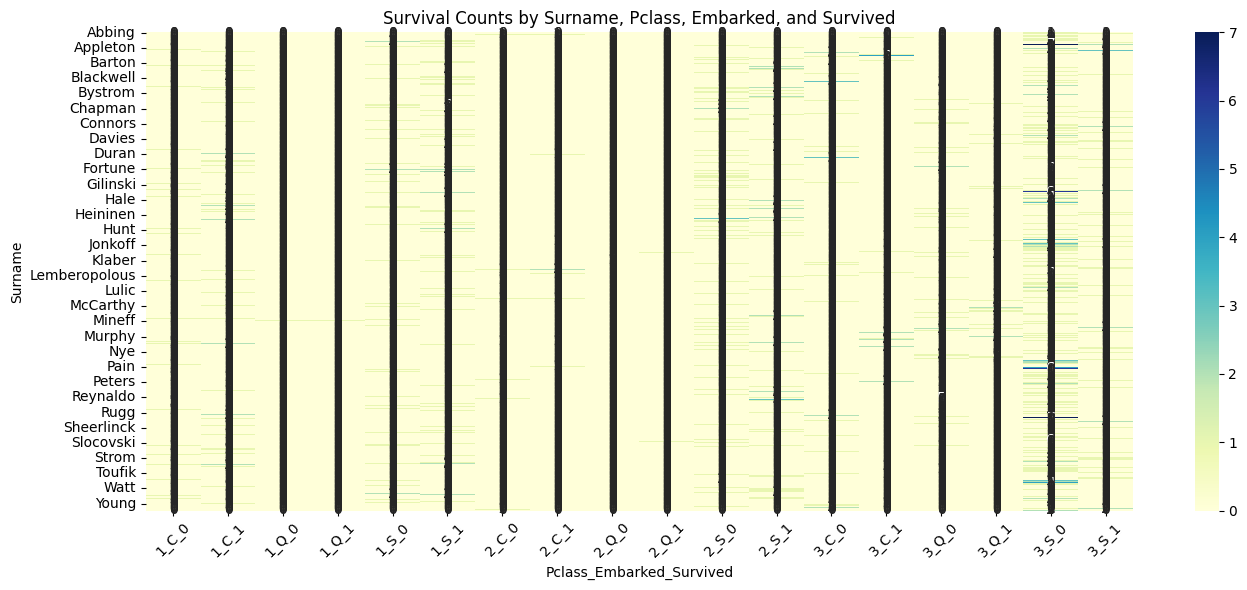

In [131]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['Surname'],
    columns=[train_cat_df['Pclass'], train_cat_df['Embarked'], train_cat_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Surname, Pclass, Embarked, and Survived')
plt.xlabel('Pclass_Embarked_Survived')
plt.ylabel('Surname')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
train_num_df.head(5)

Age  Survived  Fare_log
0  22.0         0  2.110213
1  38.0         1  4.280593
2  26.0         1  2.188856
3  35.0         1  3.990834
4  35.0         0  2.202765

In [133]:
train_df['Fare'].nunique()

248

In [134]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Fare group

In [135]:
# Create FareGroup column based on Fare ranges
train_cat_df['FareGroup'] = pd.cut(
    train_df['Fare'],
    bins=[-1, 50, 100, float('inf')],
    labels=['<50', '50-100', '>=100']
)

In [136]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['FareGroup'], train_cat_df['Survived']]
)
crosstab_survived.head(10)

FareGroup <50     50-100     >=100    
Survived    0   1      0   1     0   1
Title                                 
Capt        0   0      1   0     0   0
Col         1   1      0   0     0   0
Don         1   0      0   0     0   0
Dr          3   2      1   0     0   1
Jonkheer    1   0      0   0     0   0
Lady        0   1      0   0     0   0
Major       1   1      0   0     0   0
Master     16  20      1   1     0   2
Miss       51  88      3  18     1  21
Mlle        0   1      0   1     0   0

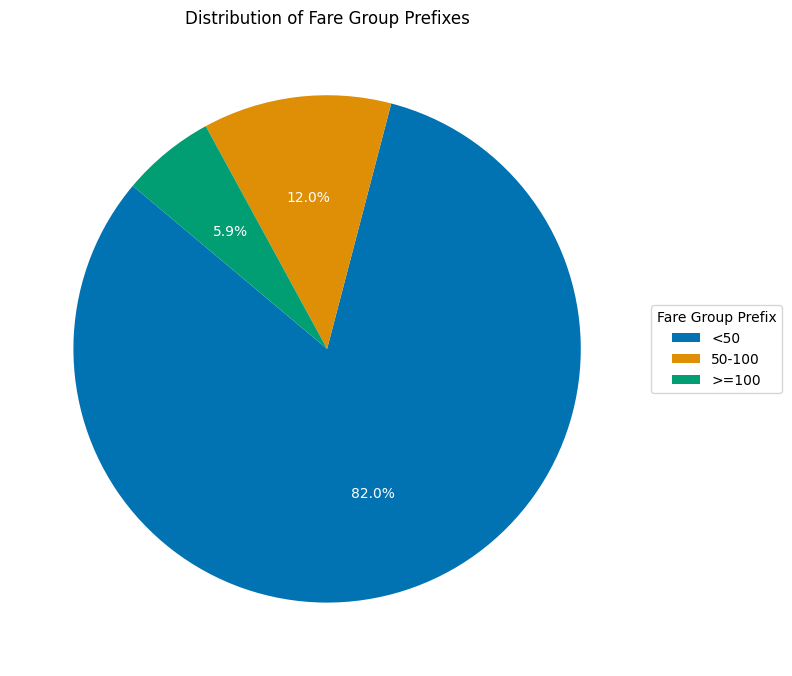

In [137]:
# Count the frequency of each Fare Group prefix
ticket_counts = train_cat_df['FareGroup'].value_counts()

# Prepare data for pie chart
labels = ticket_counts.index
sizes = ticket_counts.values

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color="w")
)

# Add annotations (legend for clarity)
plt.legend(wedges, labels, title="Fare Group Prefix", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Distribution of Fare Group Prefixes')

# Show chart
plt.tight_layout()
plt.show()

<ipython-input-138-cb25f61fd0e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_per_group = train_cat_df.groupby('FareGroup')['Survived'].count()
<ipython-input-138-cb25f61fd0e3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_per_group = train_cat_df.groupby('FareGroup')['Survived'].sum()


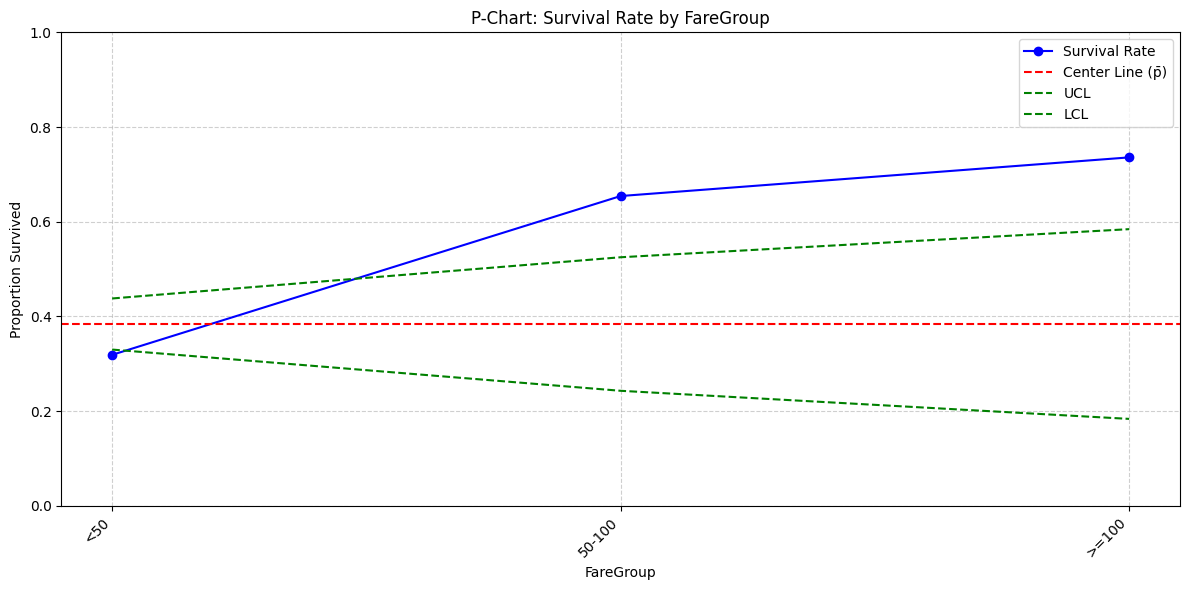

In [138]:
# Count total and survived per TicketGroup
count_per_group = train_cat_df.groupby('FareGroup')['Survived'].count()
survived_per_group = train_cat_df.groupby('FareGroup')['Survived'].sum()

# Proportion survived per group
p_hat = survived_per_group / count_per_group

# Overall survival rate (center line)
p_bar = train_cat_df['Survived'].mean()

# Control limits
ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
lcl = p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
lcl = lcl.clip(lower=0)  # No negative limits

# Plotting the P-chart
plt.figure(figsize=(12, 6))
plt.plot(range(len(p_hat)), p_hat.values, 'bo-', label='Survival Rate')
plt.axhline(p_bar, color='red', linestyle='--', label='Center Line (p̄)')
plt.plot(range(len(p_hat)), ucl.values, 'g--', label='UCL')
plt.plot(range(len(p_hat)), lcl.values, 'g--', label='LCL')

# X-axis labels
plt.xticks(range(len(p_hat)), p_hat.index.astype(str), rotation=45, ha='right')

# Labels and formatting
plt.title('P-Chart: Survival Rate by FareGroup')
plt.xlabel('FareGroup')
plt.ylabel('Proportion Survived')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

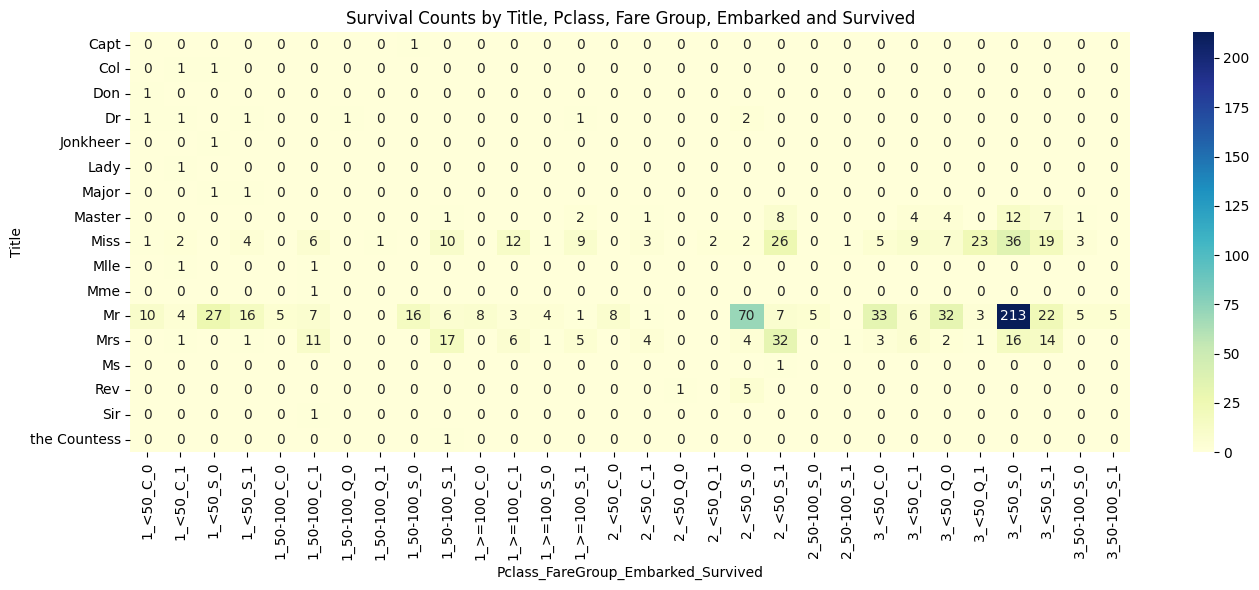

In [139]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['Pclass'], train_cat_df['FareGroup'], train_cat_df['Embarked'], train_cat_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Title, Pclass, Fare Group, Embarked and Survived')
plt.xlabel('Pclass_FareGroup_Embarked_Survived')
plt.ylabel('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Mining Count Values

In [140]:
train_cnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SibSp     891 non-null    int64
 1   Parch     891 non-null    int64
 2   CabinCnt  891 non-null    int64
 3   Survived  891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB


In [141]:
train_cnt_df.sample(10)

SibSp  Parch  CabinCnt  Survived
526      0      0         0         1
601      0      0         0         0
745      1      1         1         0
812      0      0         0         0
13       1      5         0         0
174      0      0         1         0
633      0      0         0         0
689      0      1         1         1
462      0      0         1         0
471      0      0         0         0

[go to top](#top)  

#### Create family size

In [142]:
# Create a feature for family size (SibSp + Parch + self)
train_cnt_df['FamilySize'] = train_cnt_df['SibSp'] + train_cnt_df['Parch'] + 1

# Categorize based on family size
#train_cat_df['Solo'] = train_cat_df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
#train_cat_df['SmallFamily'] = train_cat_df['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
#train_cat_df['LargeFamily'] = train_cat_df['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

train_cat_df['FamilyGroup'] = train_cnt_df['FamilySize'].apply(
    lambda x: 'Solo' if x == 1 else
              'Small Family' if 2 <= x <= 4 else
              'Large Family'
)

In [143]:
train_cnt_df.head(5)

SibSp  Parch  CabinCnt  Survived  FamilySize
0      1      0         0         0           2
1      1      0         1         1           2
2      0      0         0         1           1
3      1      0         1         1           2
4      0      0         0         0           1

In [144]:
train_cat_df.head(5)

AgeGroup    Cabin  CabinNo            Ticket  \
0  Young Adult  Unknown        0         A/5 21171   
1        Adult      C85       85          PC 17599   
2  Young Adult  Unknown        0  STON/O2. 3101282   
3        Adult     C123      123            113803   
4        Adult  Unknown        0            373450   

                                                Name CabinGroup  Survived  \
0                            Braund, Mr. Owen Harris          U         0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...          C         1   
2                             Heikkinen, Miss. Laina          U         1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)          C         1   
4                           Allen, Mr. William Henry          U         0   

  Embarked     Sex  Pclass Title    Surname FareGroup   FamilyGroup  
0        S    male       3    Mr     Braund       <50  Small Family  
1        C  female       1   Mrs    Cumings    50-100  Small Family  
2        S  female       3  Miss  Heikkinen       <50          Solo  
3        S  female       1   Mrs   Futrelle    50-100  Small Family  
4        S    male       3    Mr      Allen       <50          Solo

In [145]:
train_cnt_df.columns

Index(['SibSp', 'Parch', 'CabinCnt', 'Survived', 'FamilySize'], dtype='object')

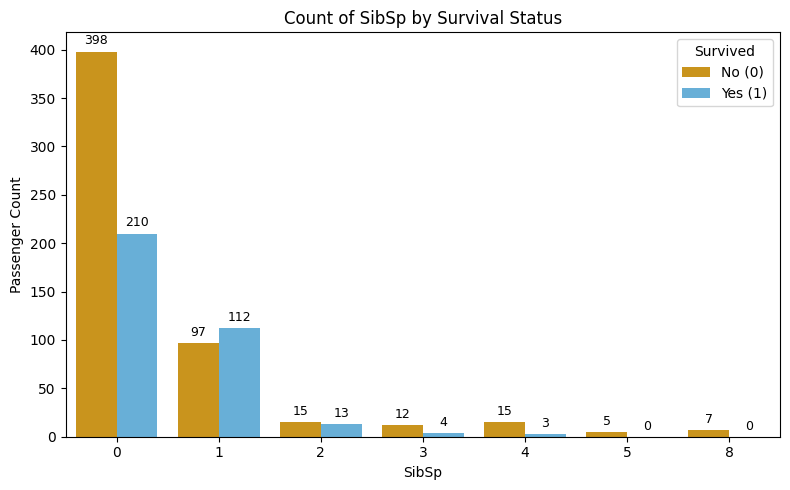

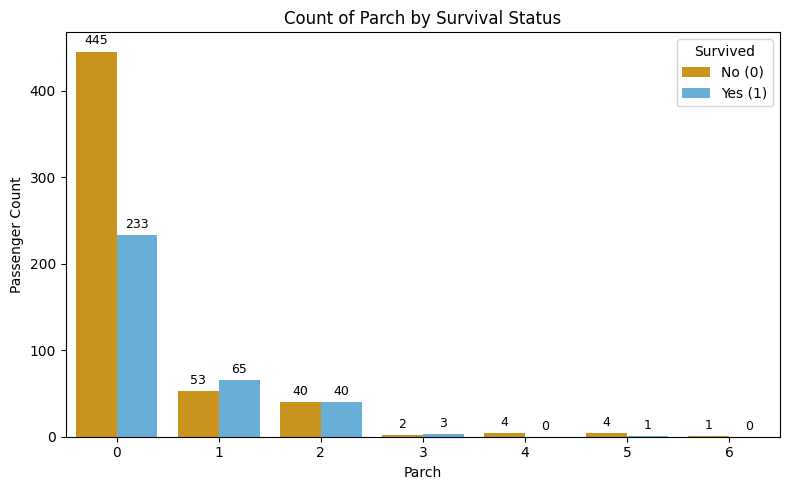

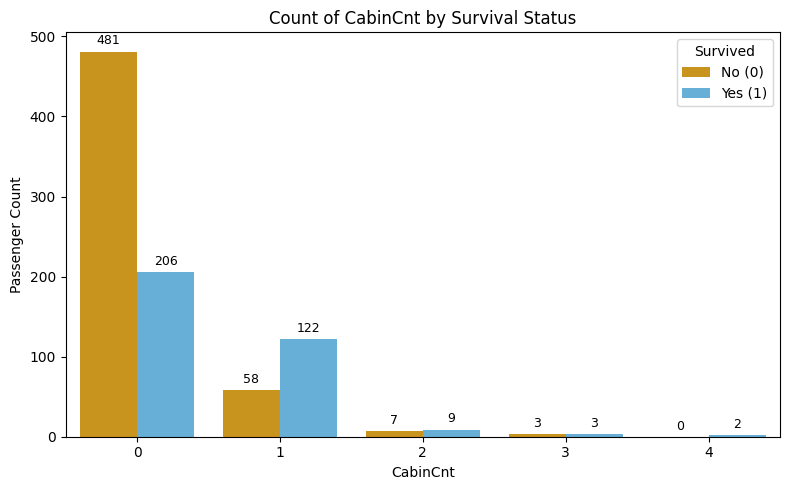

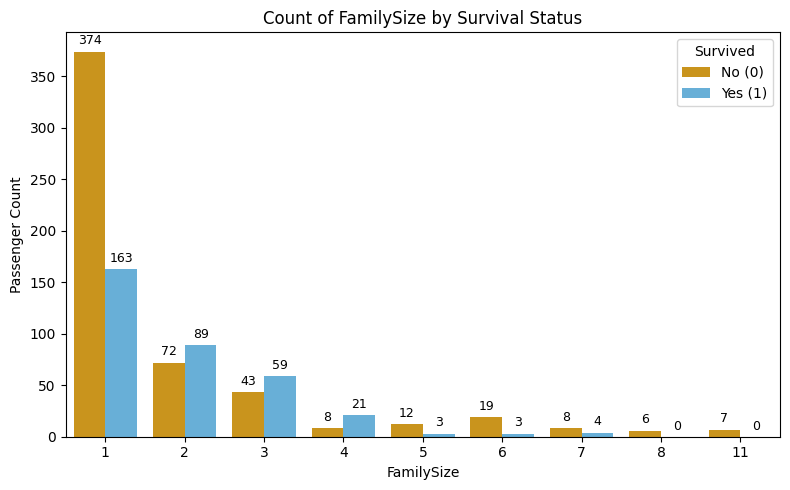

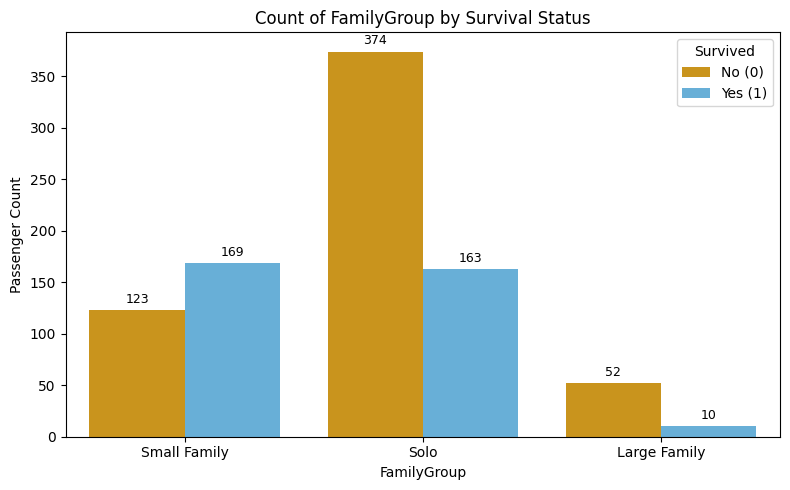

In [146]:
# Mapping of column to its corresponding DataFrame
col_sources = {
    'SibSp': train_cnt_df,
    'Parch': train_cnt_df,
    'CabinCnt': train_cnt_df,
    'FamilySize': train_cnt_df,
    'FamilyGroup': train_cat_df
}

# Loop through each column and plot from the appropriate DataFrame
for col, df in col_sources.items():
    plt.figure(figsize=(8, 5))
    
    # Countplot with hue for survival
    ax = sns.countplot(data=df, x=col, hue='Survived', palette=cb_palette)

    # Add count labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

    # Final plot formatting
    plt.title(f'Count of {col} by Survival Status')
    plt.xlabel(col)
    plt.ylabel('Passenger Count')
    plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
    plt.tight_layout()
    plt.show()

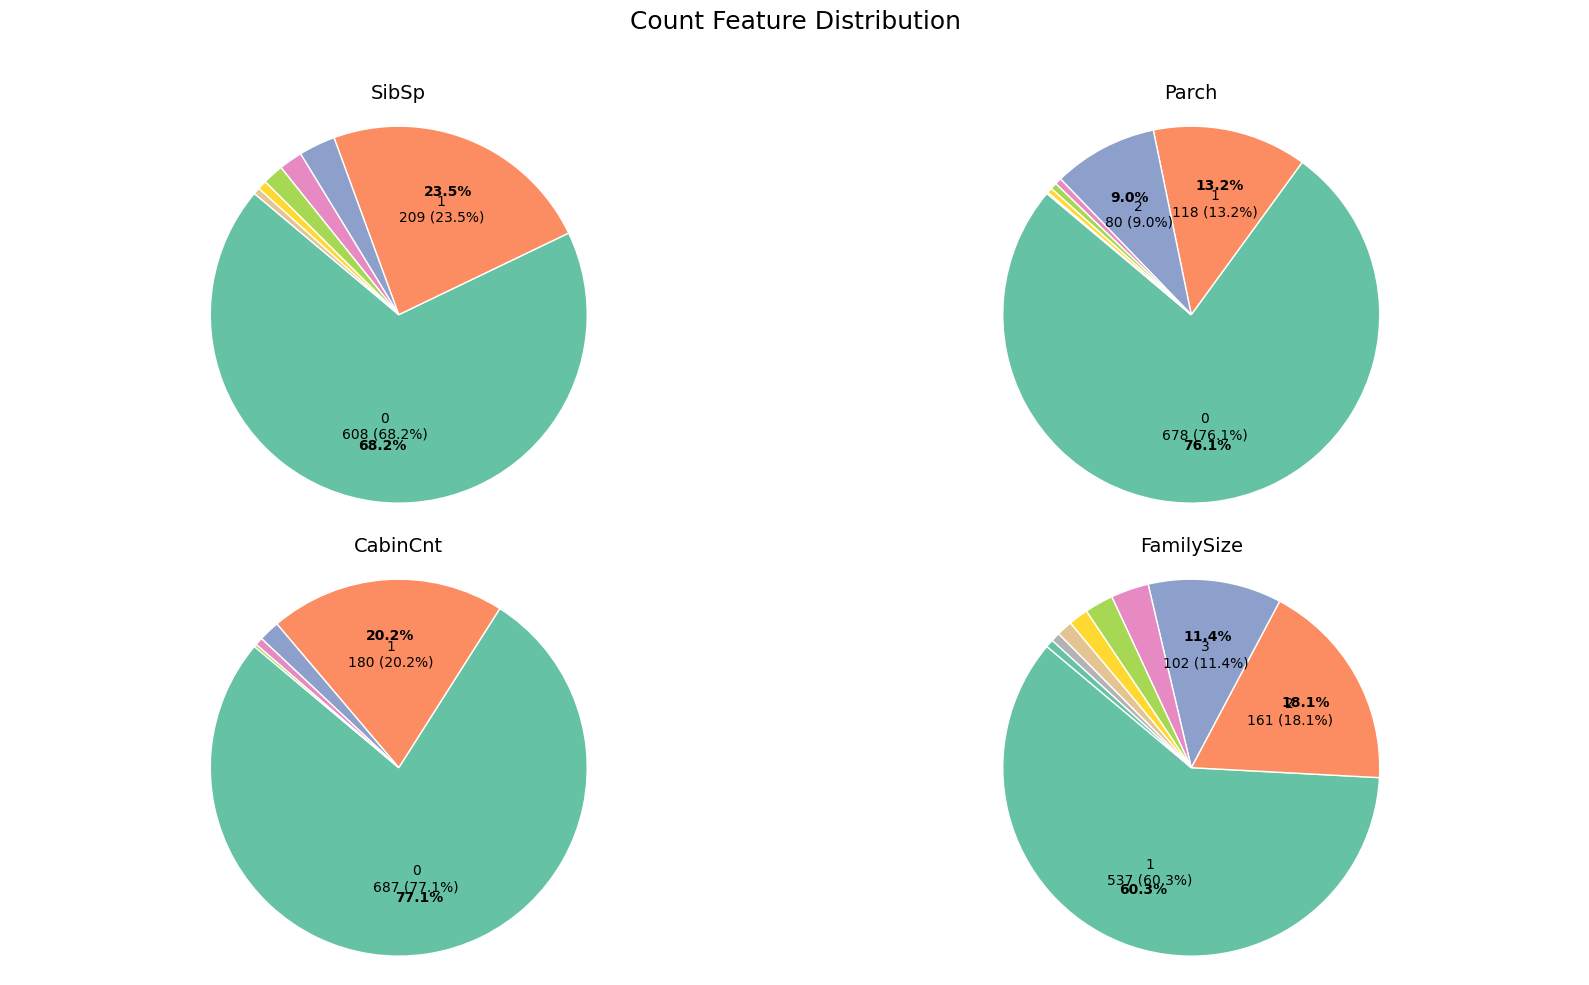

In [147]:
filtered_cnt_cols = train_cnt_df.drop(columns=['Survived']).columns
plot_cat_pie(train_cnt_df, filtered_cnt_cols, title='Count Feature Distribution')

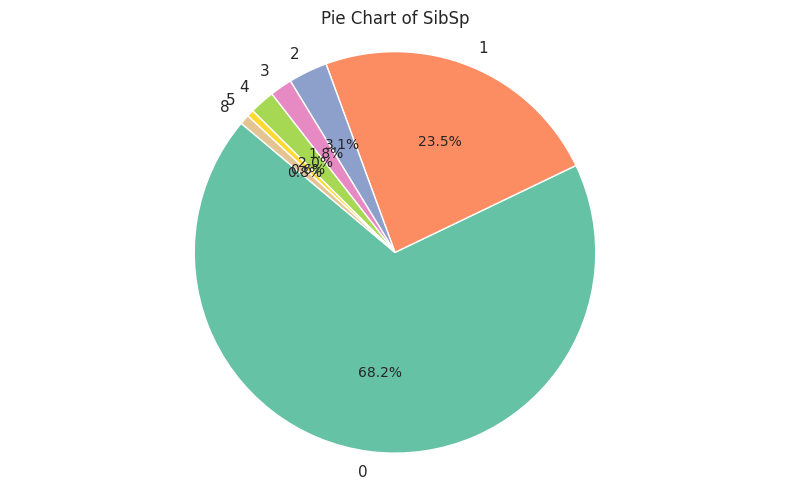

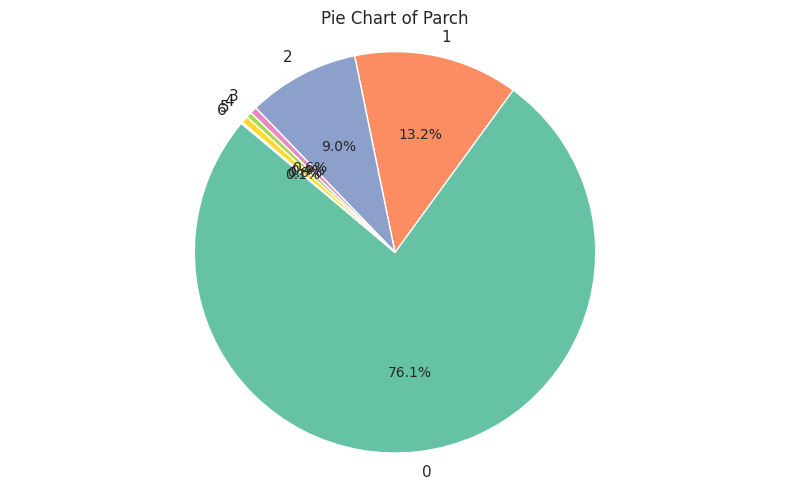

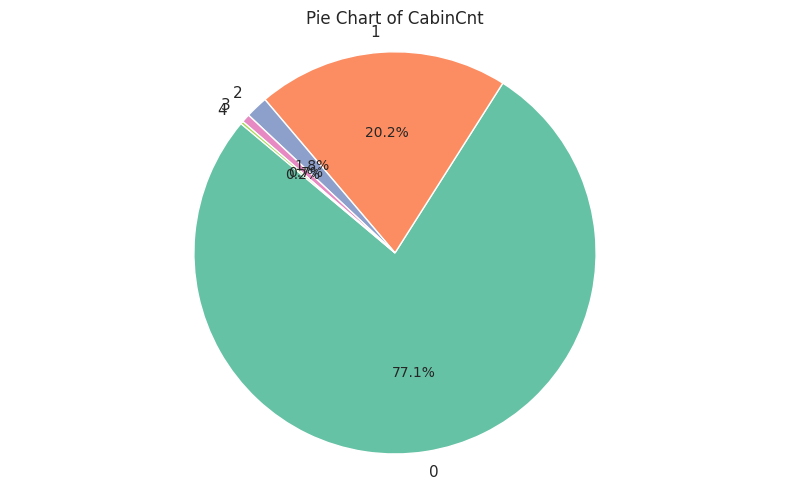

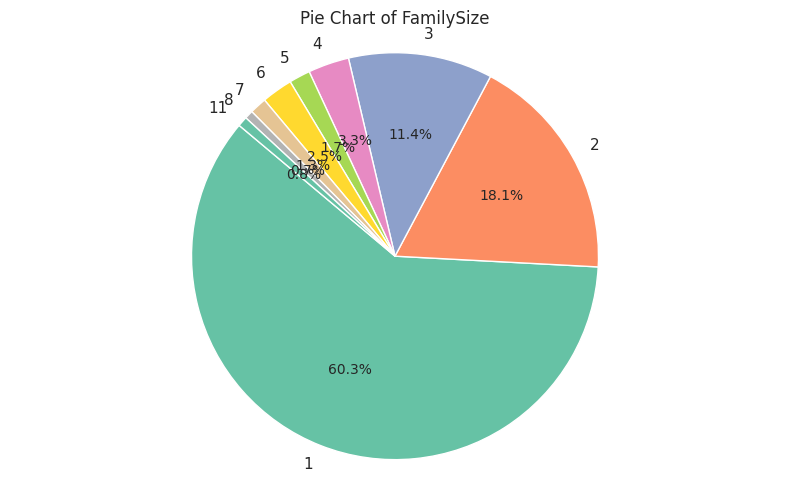

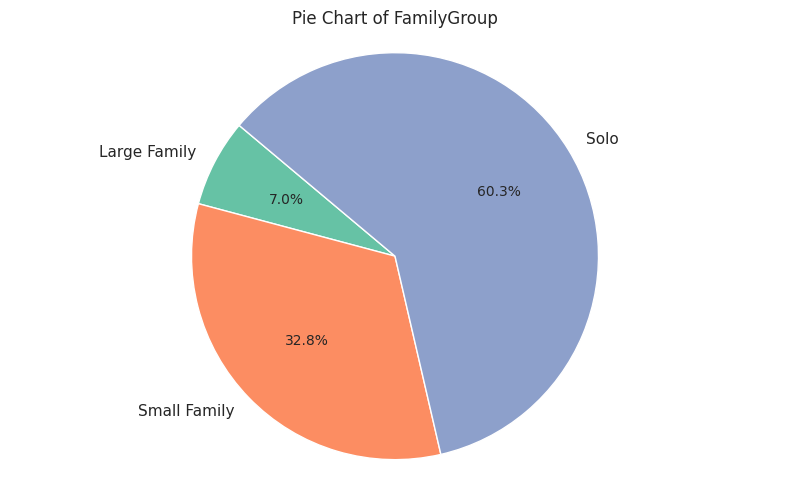

In [148]:
# Mapping of column to its corresponding DataFrame
col_sources = {
    'SibSp': train_cnt_df,
    'Parch': train_cnt_df,
    'CabinCnt': train_cnt_df,
    'FamilySize': train_cnt_df,
    'FamilyGroup': train_cat_df# this comes from a different DataFrame
}

# Set up plotting aesthetics
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

# Loop through each column and plot from the appropriate DataFrame
for col, df in col_sources.items():
    plt.figure(figsize=(8, 5))

    # Corrected line: use 'df' instead of 'train_cnt_df'
    counts = df[col].value_counts().sort_index()

    # Plot pie chart
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2'),
        wedgeprops=dict(edgecolor='w')
    )

    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  # Ensure pie is a circle
    plt.tight_layout()
    plt.show()

([<matplotlib.patches.Wedge at 0x79f25bf68a60>,
 [Text(-0.4034219356968509, -1.0233526966782303, ''),
  Text(0.6157550592117169, 0.9115073817886366, ''),
  Text(-0.6692529233479317, 0.8729836909073659, '')])

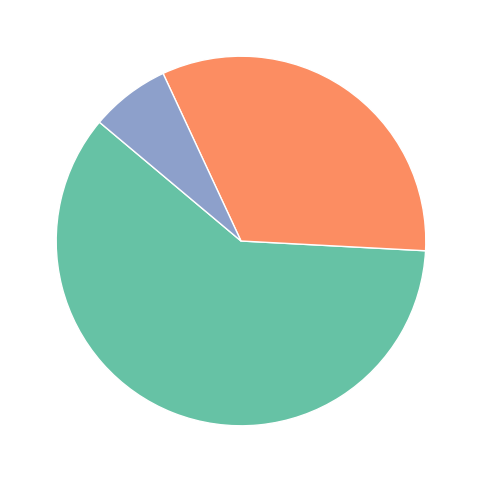

In [149]:
# Only plot pie chart for 'Cabin' group
cabin_counts = train_cat_df['FamilyGroup'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    cabin_counts,
    labels=None,  # No labels
    autopct=None,  # No percentages
    startangle=140,
    colors=sns.color_palette('Set2'),
    wedgeprops=dict(edgecolor='w')
)

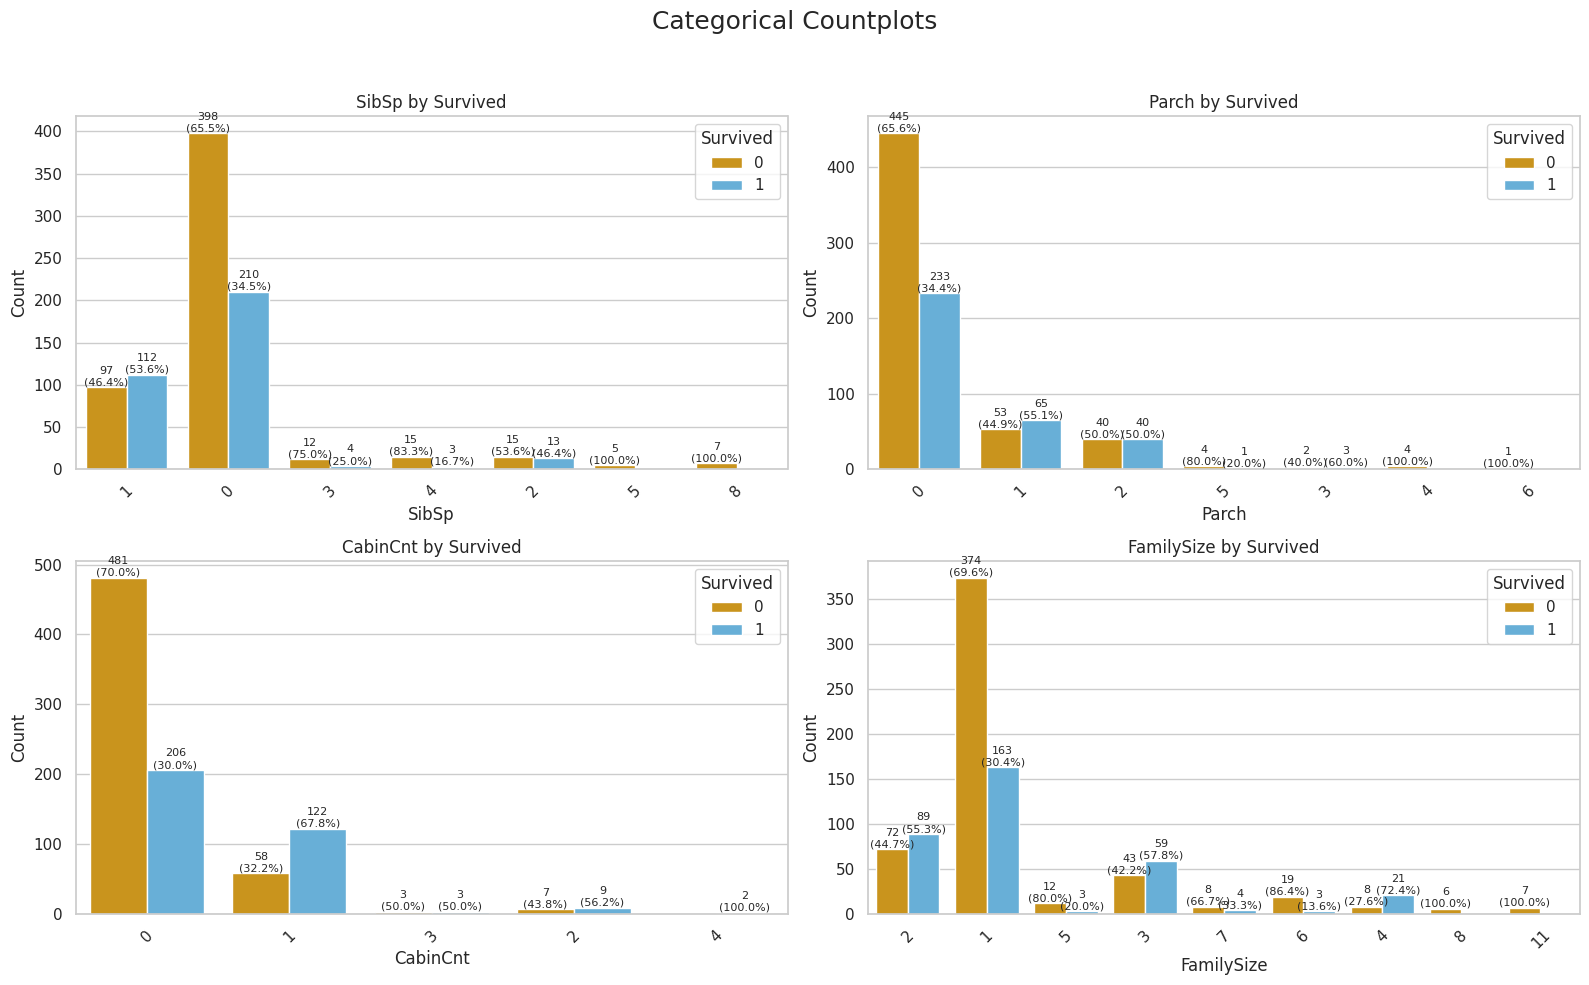

In [150]:
filtered_cnt_cols = [col for col in train_cnt_df.columns if col not in ['Survived']]
plot_cat_count(train_cnt_df, filtered_cnt_cols)

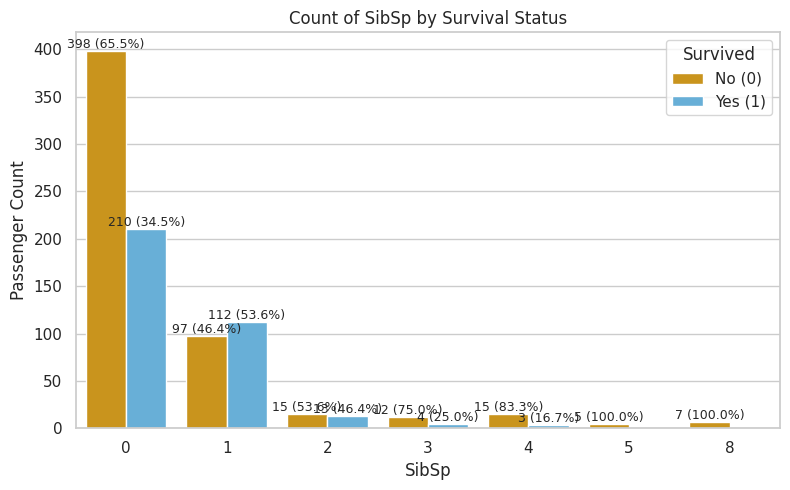

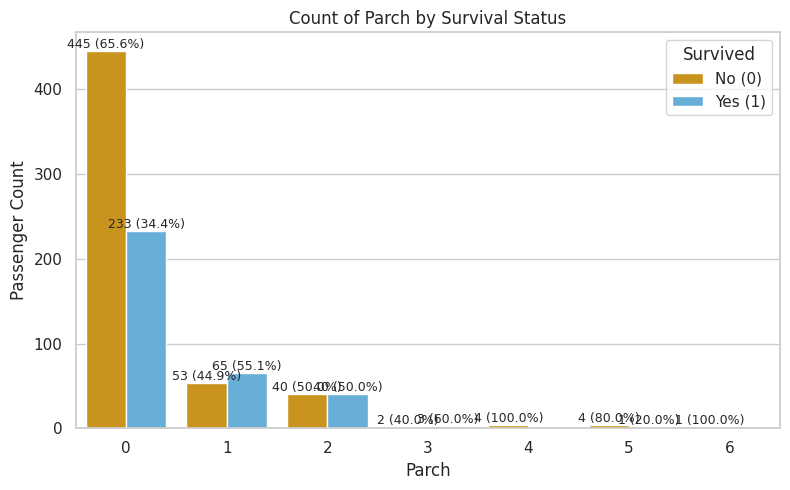

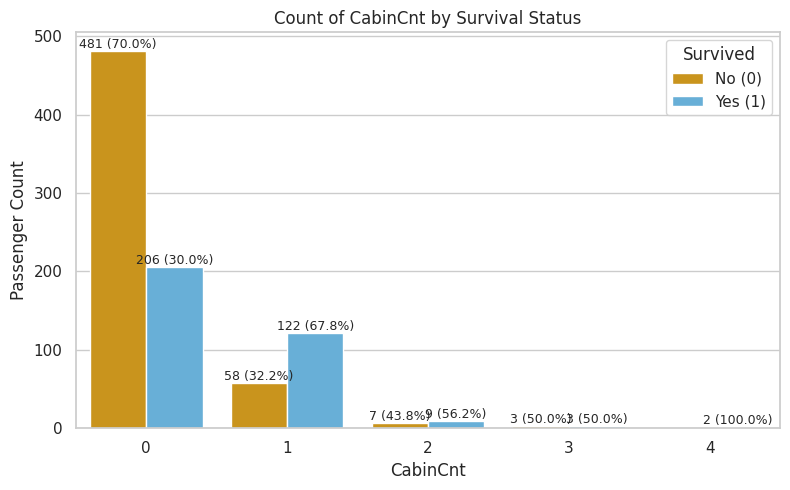

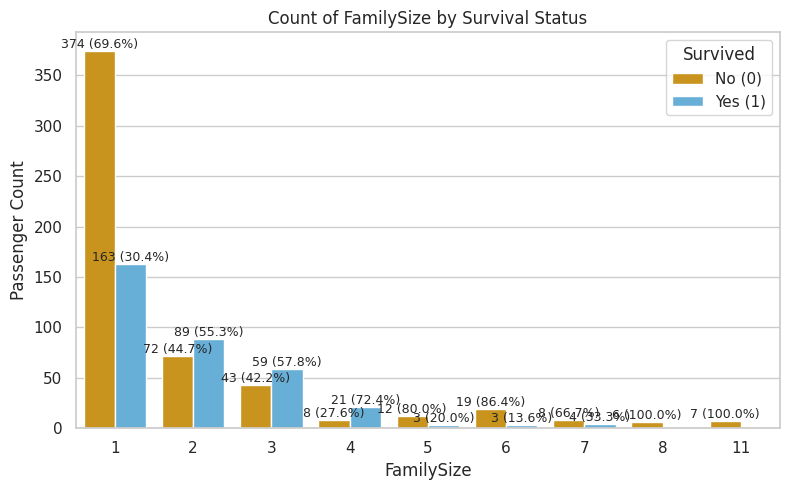

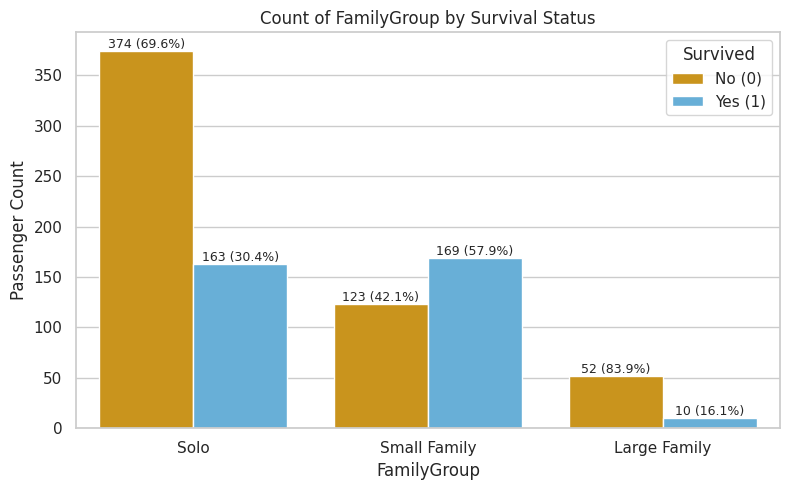

In [151]:
# Columns to visualize (count features)
count_cols = {
    'SibSp': train_cnt_df,
    'Parch': train_cnt_df,
    'CabinCnt': train_cnt_df,
    'FamilySize': train_cnt_df,
    'FamilyGroup': train_cat_df  # this comes from a different DataFrame
}

# Set up plotting aesthetics
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

for col, df in count_cols.items():
    plt.figure(figsize=(8, 5))

    # Sort values (optional, helps keep order clean)
    order_vals = sorted(df[col].unique()) if df[col].dtype != 'O' else df[col].value_counts().index

    # Count plot
    ax = sns.countplot(data=df, x=col, hue='Survived', palette=cb_palette, order=order_vals)

    # Annotate each bar
    for bar in ax.patches:
        height = bar.get_height()
        if height == 0:
            continue

        # Get category label from bar
        bar_x_center = bar.get_x() + bar.get_width() / 2
        category_label = bar.get_x() + bar.get_width() / 2

        # Extract the actual x label
        xticks = [tick.get_text() for tick in ax.get_xticklabels()]
        x_index = int(round(category_label))
        if x_index >= len(xticks):
            continue
        category_val = xticks[x_index]

        # Convert to int if necessary for numeric columns
        if df[col].dtype != 'O':
            try:
                category_val = float(category_val)
            except:
                pass

        # Filter total for that category
        category_total = len(df[df[col] == category_val])
        proportion = height / category_total if category_total > 0 else 0

        # Annotate
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)} ({proportion:.1%})',
            ha='center',
            va='bottom',
            fontsize=9
        )

    # Final touches
    plt.title(f'Count of {col} by Survival Status')
    plt.xlabel(col)
    plt.ylabel('Passenger Count')
    plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
    plt.tight_layout()
    plt.show()    


In [152]:
def plot_p_charts(df, feature_cols, target_col='Survived', data_type='num', title='P-Charts', max_categories=10, bins=5):
    """
    Plot P-Charts for numerical, categorical, or count-based features against a binary target.

    Parameters:
    - df: pandas DataFrame
    - feature_cols: list of column names to analyze
    - target_col: binary target variable (e.g., 'Survived')
    - data_type: 'num', 'cat', or 'count'
    - title: overall title of the plots
    - max_categories: max categories to show in categorical plots
    - bins: number of quantile bins for numerical features
    """
    n_cols = len(feature_cols)
    n_rows = int(np.ceil(n_cols / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(feature_cols):
        if col not in df.columns:
            print(f"Column '{col}' not found in the DataFrame.")
            continue

        ax = axes[idx]

        data = df[[col, target_col]].dropna().copy()

        if data_type == 'num':
            if pd.api.types.is_numeric_dtype(data[col]):
                data['binned'] = pd.qcut(data[col], q=bins, duplicates='drop')
            else:
                data['binned'] = data[col]
            group_col = 'binned'

        elif data_type == 'cat':
            if data[col].nunique() > max_categories:
                top_categories = data[col].value_counts().nlargest(max_categories).index
                data = data[data[col].isin(top_categories)]
            group_col = col

        elif data_type == 'cnt':
            group_col = col

        else:
            print("Invalid data_type. Use 'num', 'cat', or 'count'.")
            return

        count_per_group = data.groupby(group_col)[target_col].count()
        survived_per_group = data.groupby(group_col)[target_col].sum()
        p_hat = survived_per_group / count_per_group
        p_bar = data[target_col].mean()
        ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
        lcl = (p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)).clip(lower=0)

        x = range(len(p_hat))
        ax.plot(x, p_hat.values, 'bo-', label='Proportion')
        ax.plot(x, ucl.values, 'g--', label='UCL')
        ax.plot(x, lcl.values, 'g--', label='LCL')
        ax.axhline(p_bar, color='r', linestyle='--', label='CL')

        # Plot count (cnt) as a secondary axis
        ax2 = ax.twinx()
        ax2.bar(x, count_per_group.values, alpha=0.2, color='gray', label='Count')

        ax.set_xticks(x)
        ax.set_xticklabels(p_hat.index.astype(str), rotation=45, ha='right')
        ax.set_title(f'{col} vs {target_col}')
        ax.set_ylim(0, 1.1)
        ax.grid(True, linestyle='--', alpha=0.6)

        # Combine legends
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Remove extra axes
    for j in range(n_cols, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    fig.suptitle(title, fontsize=16, y=1.02)
    plt.show()

In [153]:
def plot_p_charts(df, feature_cols, target_col='Survived', data_type='num', title='P-Charts', max_categories=10, bins=5):
    """
    Plot P-Charts for numerical, categorical, or count-based features against a binary target.

    Parameters:
    - df: pandas DataFrame
    - feature_cols: list of column names to analyze
    - target_col: binary target variable (e.g., 'Survived')
    - data_type: 'num', 'cat', or 'count'
    - title: overall title of the plots
    - max_categories: max categories to show in categorical plots
    - bins: number of quantile bins for numerical features
    """
    n_cols = len(feature_cols)
    n_rows = int(np.ceil(n_cols / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(feature_cols):
        if col not in df.columns:
            print(f"Column '{col}' not found in the DataFrame.")
            continue

        ax = axes[idx]

        data = df[[col, target_col]].dropna().copy()

        if data_type == 'num':
            if pd.api.types.is_numeric_dtype(data[col]):
                data['binned'] = pd.qcut(data[col], q=bins, duplicates='drop')
            else:
                data['binned'] = data[col]
            group_col = 'binned'

        elif data_type == 'cat':
            if data[col].nunique() > max_categories:
                top_categories = data[col].value_counts().nlargest(max_categories).index
                data = data[data[col].isin(top_categories)]
            group_col = col

        elif data_type == 'cnt':
            group_col = col

        else:
            print("Invalid data_type. Use 'num', 'cat', or 'count'.")
            return

        count_per_group = data.groupby(group_col)[target_col].count()
        survived_per_group = data.groupby(group_col)[target_col].sum()
        p_hat = survived_per_group / count_per_group
        p_bar = data[target_col].mean()
        ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
        lcl = (p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)).clip(lower=0)

        x = range(len(p_hat))
        ax.plot(x, p_hat.values, 'bo-', label='Proportion')
        ax.plot(x, ucl.values, 'g--', label='UCL')
        ax.plot(x, lcl.values, 'g--', label='LCL')
        ax.axhline(p_bar, color='r', linestyle='--', label='CL')

        ax.set_xticks(x)
        ax.set_xticklabels(p_hat.index.astype(str), rotation=45, ha='right')
        ax.set_title(f'{col} vs {target_col}')
        ax.set_ylim(0, 1.1)
        ax.grid(True, linestyle='--', alpha=0.6)

        ax.legend(loc='upper right')

    # Remove extra axes
    for j in range(n_cols, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    fig.suptitle(title, fontsize=16, y=1.02)
    plt.show()

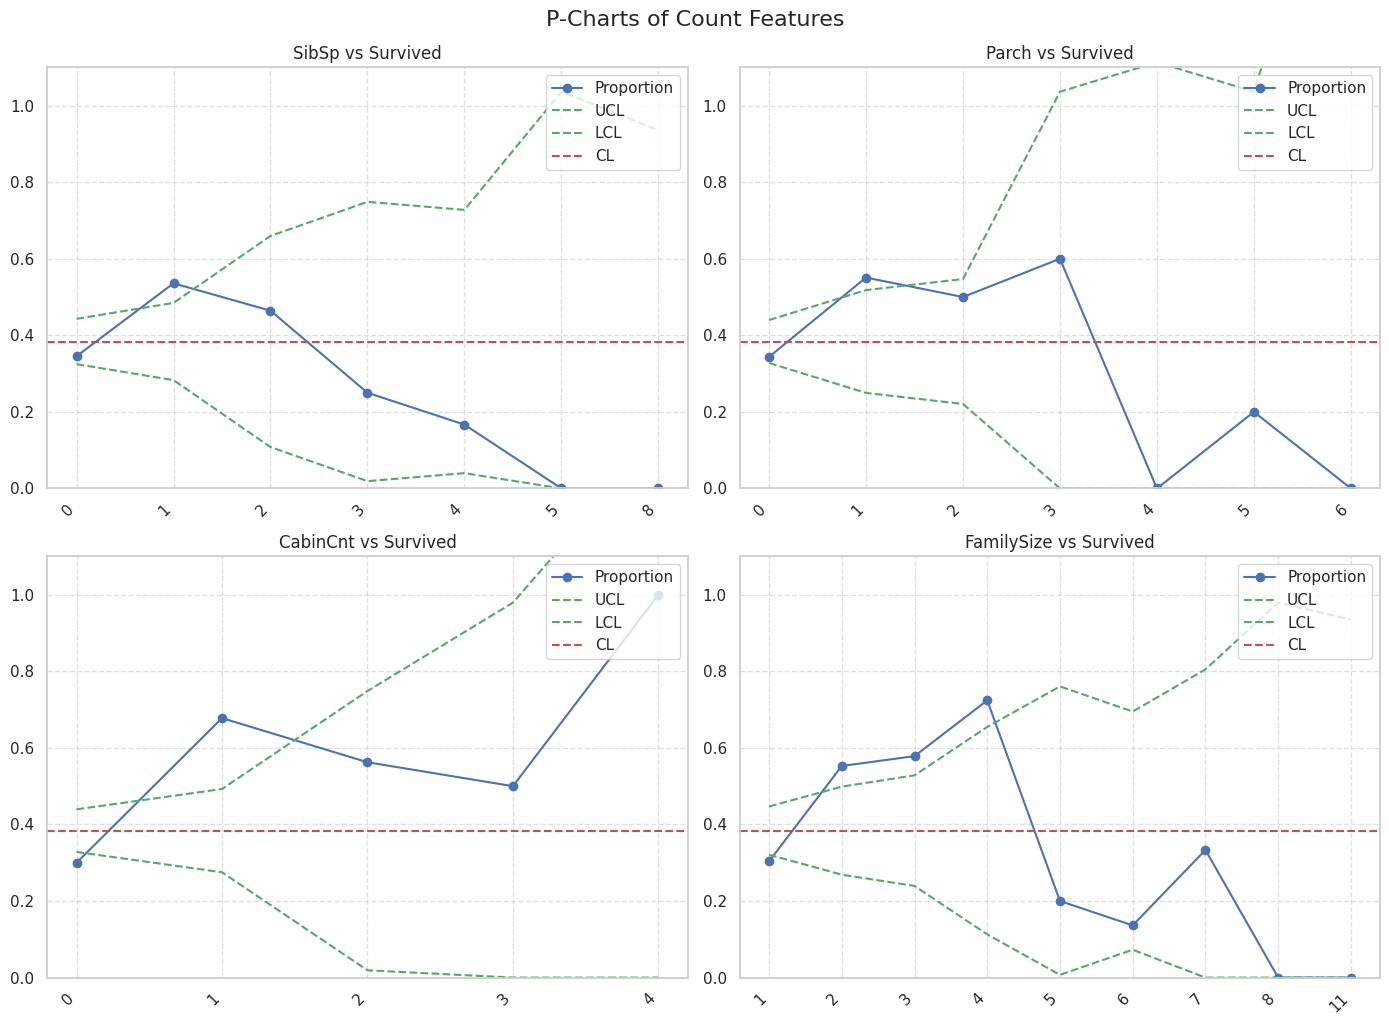

In [154]:
cnt_cols = [col for col in train_cnt_df.columns if col not in ['Survived']]
plot_p_charts(train_cnt_df, cnt_cols, target_col='Survived', data_type='cnt', title='P-Charts of Count Features')

In [155]:
# Loop through count columns and correct dataframe source
#for col, df in count_cols.items():
    # Skip if the column doesn't exist in the DataFrame
    #if col not in df.columns:
        #print(f"Column '{col}' not found in its assigned DataFrame.")
        #continue

    # Group by the column
    #count_per_group = df.groupby(col)['Survived'].count()
    #survived_per_group = df.groupby(col)['Survived'].sum()

    # Proportion of survivors
    #p_hat = survived_per_group / count_per_group

    # Overall survival rate
    #p_bar = df['Survived'].mean()

    # Standard error
    #se = np.sqrt(p_bar * (1 - p_bar) / count_per_group)

    # Control limits
    #ucl = p_bar + 3 * se
    #lcl = (p_bar - 3 * se).clip(lower=0)

    # Plot
    #plt.figure(figsize=(10, 6))
    #plt.plot(p_hat.index.astype(str), p_hat, 'bo-', label='Survival Rate (p̂)')
    #plt.axhline(p_bar, color='red', linestyle='--', label='Center Line (p̄)')
    #plt.plot(p_hat.index.astype(str), ucl, 'g--', label='UCL (+3σ)')
    #plt.plot(p_hat.index.astype(str), lcl, 'g--', label='LCL (-3σ)')

    #plt.title(f'P-Chart: Survival Rate by {col}')
    #plt.xlabel(f'{col} (Group)')
    #plt.ylabel('Proportion Survived')
    #plt.ylim(0, 1.05)
    #plt.grid(True, linestyle='--', alpha=0.6)
    #plt.legend()
    #plt.tight_layout()
    #plt.show()

In [156]:
# Create a crosstab (pivot-style) to count cabins across Pclass
cabin_pivot = pd.crosstab(train_cnt_df['CabinCnt'], train_cat_df['Survived'])

# Show only cabins with the highest total counts (top 10)
cabin_pivot['Total'] = cabin_pivot.sum(axis=1)
cabin_pivot_top10 = cabin_pivot.sort_values(by='Total', ascending=False).head(10)

# Drop the 'Total' column for cleaner display if needed
cabin_pivot_top10 = cabin_pivot_top10.drop(columns='Total')

# Display the result
print("\nTop 10 Cabin counts by Pclass (Pivot Table format):")
print(cabin_pivot_top10)


Top 10 Cabin counts by Pclass (Pivot Table format):
Survived    0    1
CabinCnt          
0         481  206
1          58  122
2           7    9
3           3    3
4           0    2


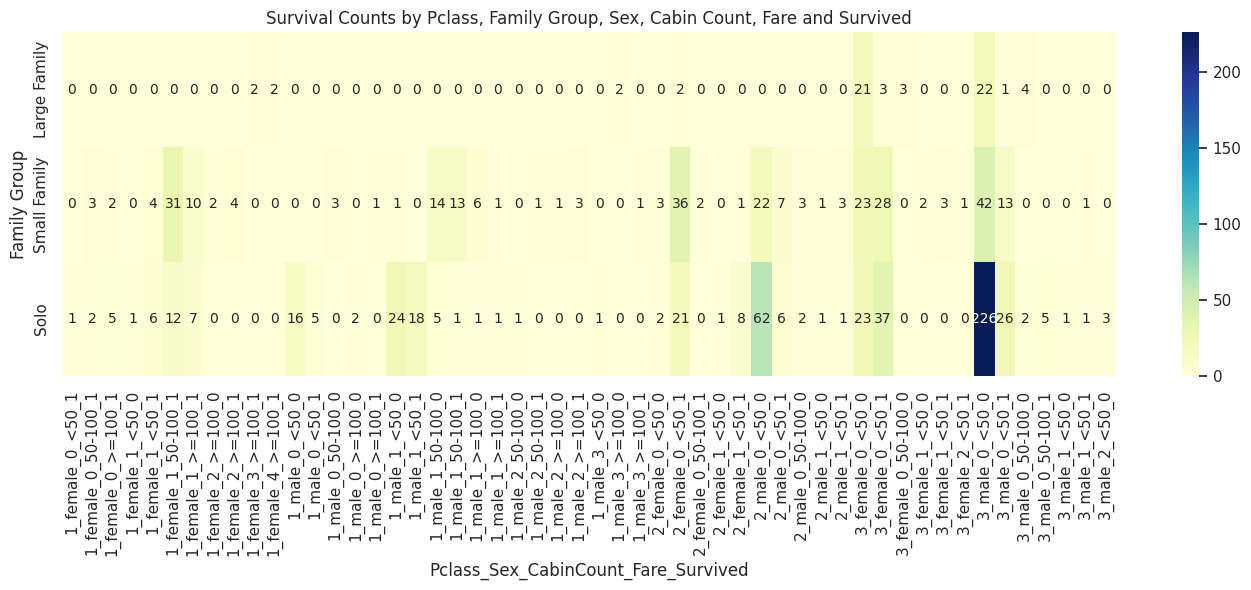

In [157]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['FamilyGroup'],
    columns=[train_cat_df['Pclass'],train_cat_df['Sex'], train_cnt_df['CabinCnt'], train_cat_df['FareGroup'],train_cnt_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Pclass, Family Group, Sex, Cabin Count, Fare and Survived')
plt.xlabel('Pclass_Sex_CabinCount_Fare_Survived')
plt.ylabel('Family Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

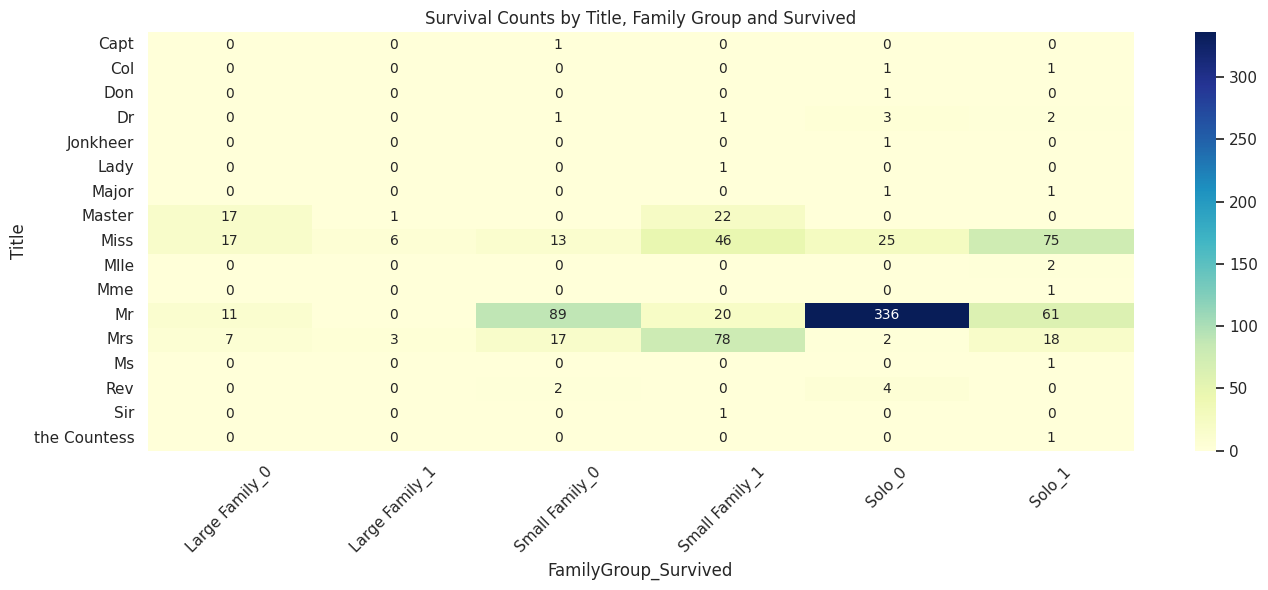

In [158]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['FamilyGroup'], train_cat_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Title, Family Group and Survived')
plt.xlabel('FamilyGroup_Survived')
plt.ylabel('Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

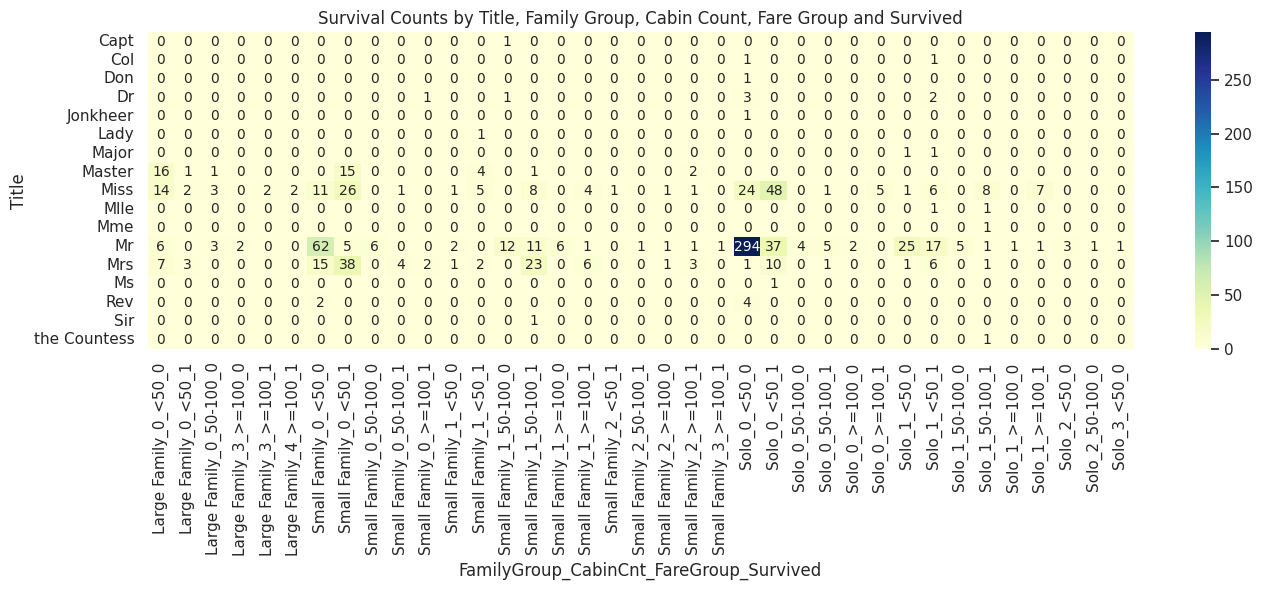

In [159]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=train_cat_df['Title'],
    columns=[train_cat_df['FamilyGroup'],train_cnt_df['CabinCnt'], train_cat_df['FareGroup'],train_cnt_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Title, Family Group, Cabin Count, Fare Group and Survived')
plt.xlabel('FamilyGroup_CabinCnt_FareGroup_Survived')
plt.ylabel('Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

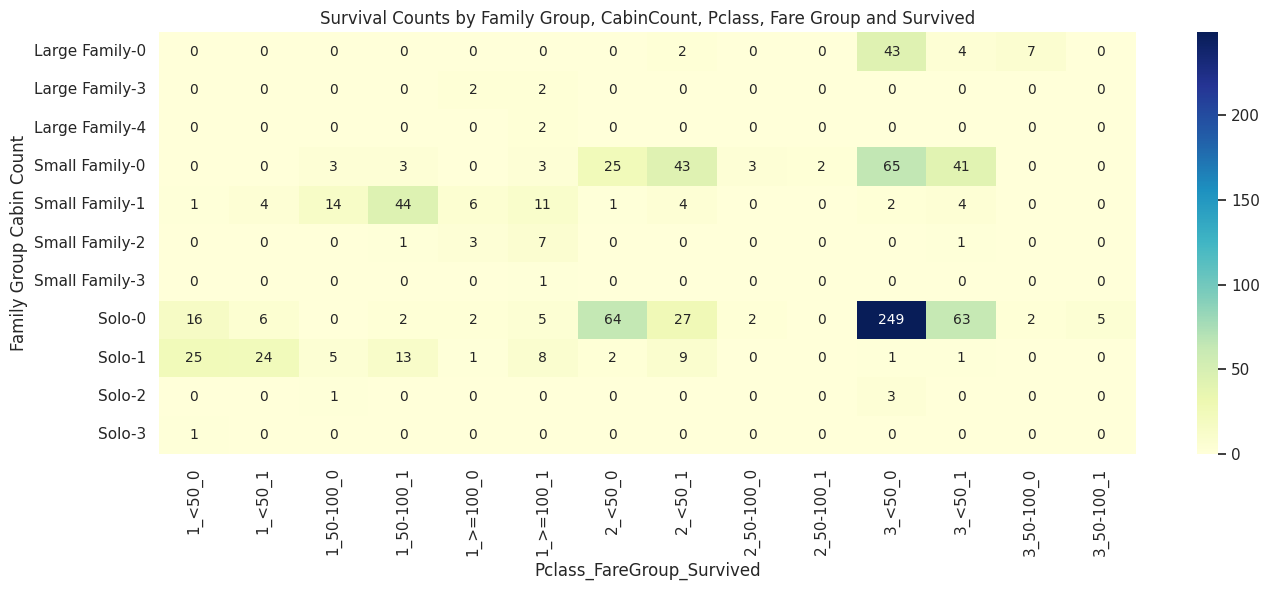

In [160]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=[train_cat_df['FamilyGroup'],train_cnt_df['CabinCnt']],
    columns=[train_cat_df['Pclass'], train_cat_df['FareGroup'],train_cnt_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Family Group, CabinCount, Pclass, Fare Group and Survived')
plt.xlabel('Pclass_FareGroup_Survived')
plt.ylabel('Family Group Cabin Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Handling ticket

In [161]:
def clean_ticket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = list(map(lambda t: t.strip(), ticket))
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

train_cat_df['TicketGroup'] = train_cat_df['Ticket'].apply(clean_ticket)

In [162]:
train_cat_df.head(5)

AgeGroup    Cabin  CabinNo            Ticket  \
0  Young Adult  Unknown        0         A/5 21171   
1        Adult      C85       85          PC 17599   
2  Young Adult  Unknown        0  STON/O2. 3101282   
3        Adult     C123      123            113803   
4        Adult  Unknown        0            373450   

                                                Name CabinGroup  Survived  \
0                            Braund, Mr. Owen Harris          U         0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...          C         1   
2                             Heikkinen, Miss. Laina          U         1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)          C         1   
4                           Allen, Mr. William Henry          U         0   

  Embarked     Sex  Pclass Title    Surname FareGroup   FamilyGroup  \
0        S    male       3    Mr     Braund       <50  Small Family   
1        C  female       1   Mrs    Cumings    50-100  Small Family   
2        S  female       3  Miss  Heikkinen       <50          Solo   
3        S  female       1   Mrs   Futrelle    50-100  Small Family   
4        S    male       3    Mr      Allen       <50          Solo   

  TicketGroup  
0          A5  
1          PC  
2      STONO2  
3         XXX  
4         XXX

In [163]:
train_cat_df['TicketGroup'].nunique()

31

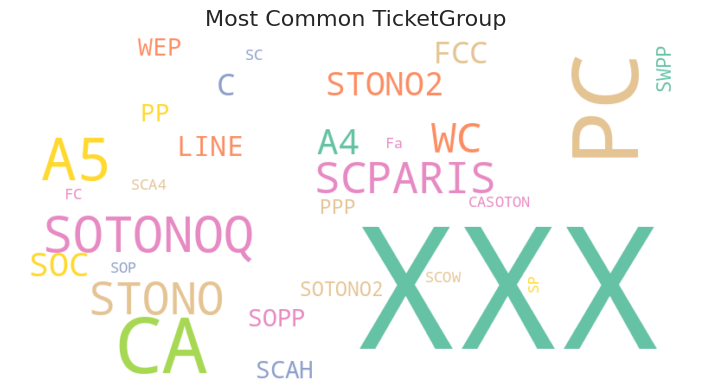

In [164]:
# Combine all values in 'TicketGroup' into one string
ticket_text = ' '.join(train_cat_df['TicketGroup'].dropna().astype(str))

# Create WordCloud object
ticket_wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(ticket_text)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(ticket_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common TicketGroup', fontsize=16)
plt.tight_layout()
plt.show()

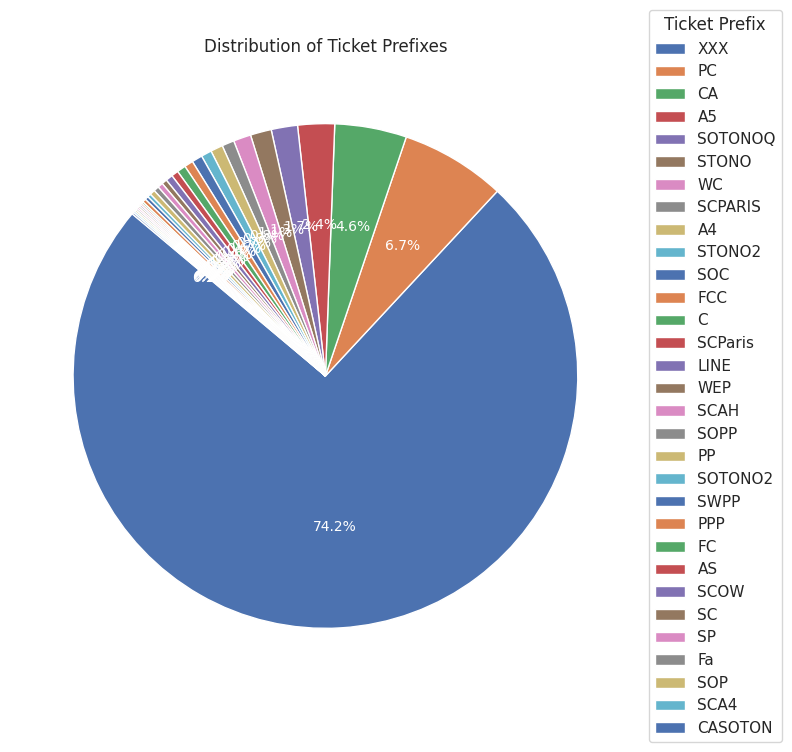

In [165]:
# Count the frequency of each ticket prefix
ticket_counts = train_cat_df['TicketGroup'].value_counts()

# Prepare data for pie chart
labels = ticket_counts.index
sizes = ticket_counts.values

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color="w")
)

# Add annotations (legend for clarity)
plt.legend(wedges, labels, title="Ticket Prefix", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Distribution of Ticket Prefixes')

# Show chart
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x79f25bfc6b90>,
 [Text(0.3340113495124289, -1.0480631748119416, ''),
  Text(-0.1334786526568775, 1.091871535156451, ''),
  Text(-0.6966137695029602, 0.8513103171810364, '')])

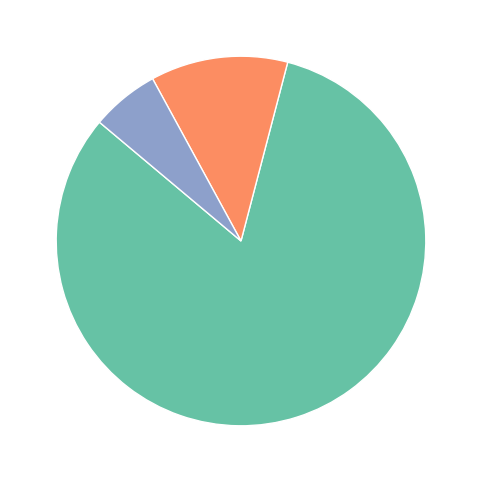

In [166]:
# Only plot pie chart for 'Cabin' group
cabin_counts = train_cat_df['FareGroup'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    cabin_counts,
    labels=None,  # No labels
    autopct=None,  # No percentages
    startangle=140,
    colors=sns.color_palette('Set2'),
    wedgeprops=dict(edgecolor='w')
)

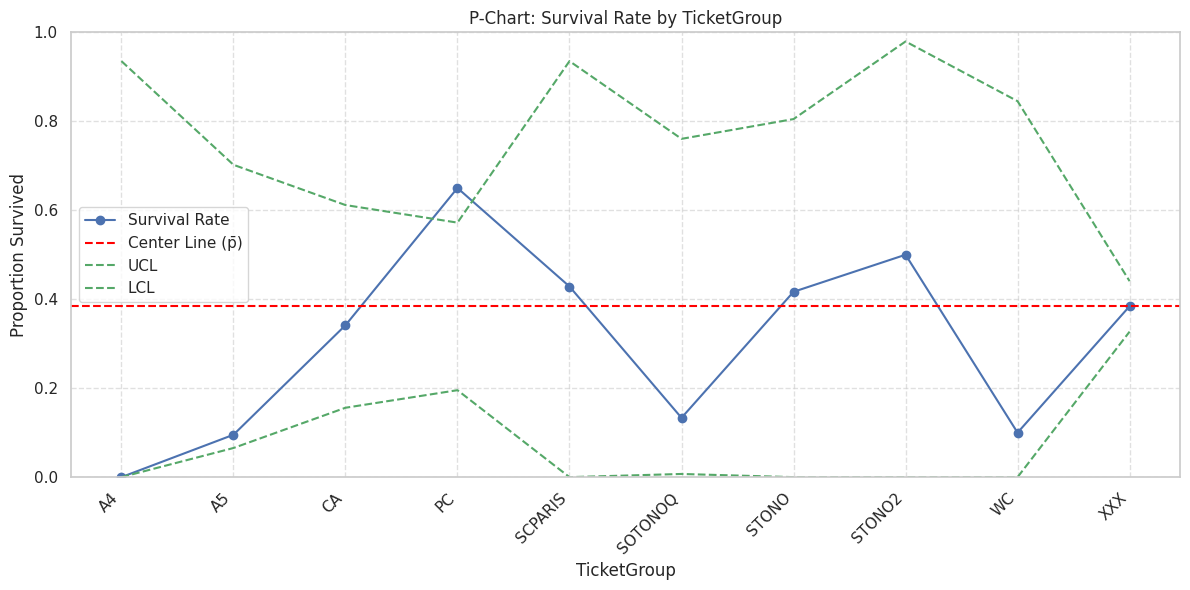

In [167]:
# Filter top 10 TicketGroup values if high cardinality
if train_cat_df['TicketGroup'].nunique() > 10:
    top_groups = train_cat_df['TicketGroup'].value_counts().nlargest(10).index
    filtered_df = train_cat_df[train_cat_df['TicketGroup'].isin(top_groups)]
else:
    filtered_df = train_cat_df.copy()

# Count total and survived per TicketGroup
count_per_group = filtered_df.groupby('TicketGroup')['Survived'].count()
survived_per_group = filtered_df.groupby('TicketGroup')['Survived'].sum()

# Proportion survived per group
p_hat = survived_per_group / count_per_group

# Overall survival rate (center line)
p_bar = train_cat_df['Survived'].mean()

# Control limits
ucl = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
lcl = p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / count_per_group)
lcl = lcl.clip(lower=0)  # No negative limits

# Plotting the P-chart
plt.figure(figsize=(12, 6))
plt.plot(range(len(p_hat)), p_hat.values, 'bo-', label='Survival Rate')
plt.axhline(p_bar, color='red', linestyle='--', label='Center Line (p̄)')
plt.plot(range(len(p_hat)), ucl.values, 'g--', label='UCL')
plt.plot(range(len(p_hat)), lcl.values, 'g--', label='LCL')

# X-axis labels
plt.xticks(range(len(p_hat)), p_hat.index.astype(str), rotation=45, ha='right')

# Labels and formatting
plt.title('P-Chart: Survival Rate by TicketGroup')
plt.xlabel('TicketGroup')
plt.ylabel('Proportion Survived')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

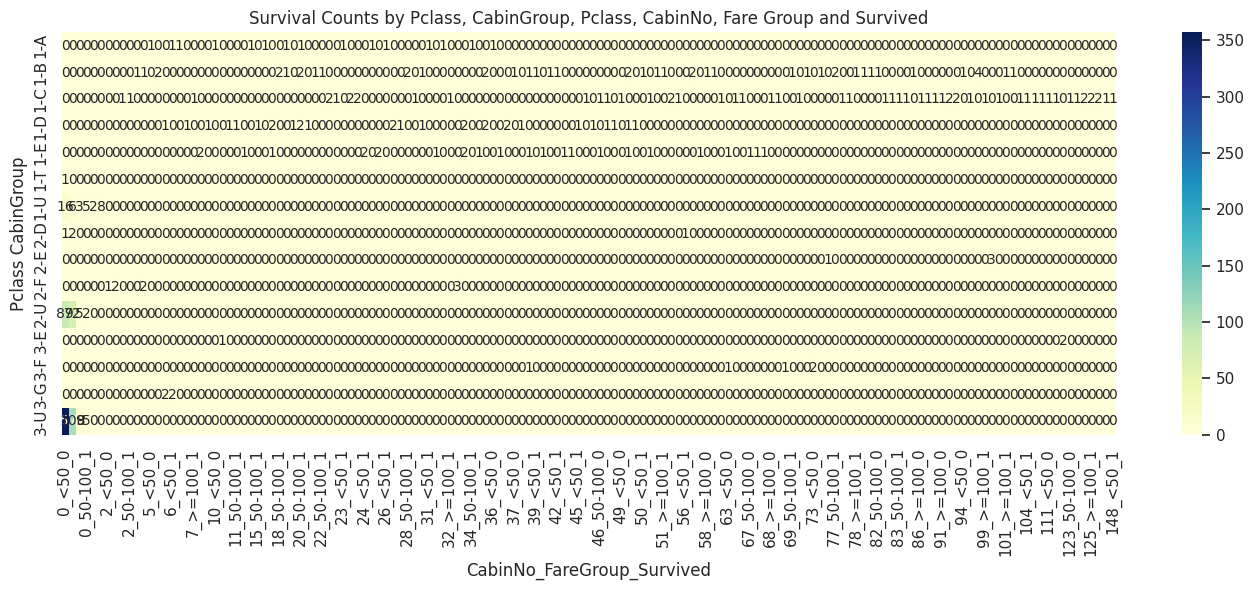

In [168]:
# Crosstab with multiple levels in columns
crosstab_survived = pd.crosstab(
    index=[train_cat_df['Pclass'],train_cat_df['CabinGroup']],
    columns=[train_cat_df['CabinNo'], train_cat_df['FareGroup'],train_cnt_df['Survived']]
)

# Flatten the column MultiIndex for visualization
crosstab_survived.columns = ['_'.join([str(i) for i in col]) for col in crosstab_survived.columns]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(crosstab_survived, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Counts by Pclass, CabinGroup, Pclass, CabinNo, Fare Group and Survived')
plt.xlabel('CabinNo_FareGroup_Survived')
plt.ylabel('Pclass CabinGroup')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Check-up before construct

In [169]:
all_data_df.head(5)

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  train_set     AgeGroup  \
0      0         A/5 21171   7.2500        S          1  Young Adult   
1      0          PC 17599  71.2833        C          1        Adult   
2      0  STON/O2. 3101282   7.9250        S          1  Young Adult   
3      0            113803  53.1000        S          1        Adult   
4      0            373450   8.0500        S          1        Adult   

  CabinGroup  CabinNo  CabinCnt  Fare_log Title    Surname  
0          U        0         0  2.110213    Mr     Braund  
1          C       85         1  4.280593   Mrs    Cumings  
2          U        0         0  2.188856  Miss  Heikkinen  
3          C      123         1  3.990834   Mrs   Futrelle  
4          U        0         0  2.202765    Mr      Allen

 #### Add the remaining added features to all_data_df

In [170]:
# Ensure the index alignment is correct across DataFrames
all_data_df = all_data_df.copy()  # Optional: to avoid overwriting original if needed

# Merge categorical columns
all_data_df[['TicketGroup', 'FamilyGroup','FareGroup']] = train_cat_df[['TicketGroup', 'FamilyGroup','FareGroup']]

# Merge numerical column
all_data_df['FamilySize'] = train_cnt_df['FamilySize']

In [171]:
# Ensure all dataframes have the same index (usually done already during preprocessing)
# Then join them using `concat` along columns (axis=1)

# Extract 'Survived' column from only one DataFrame (e.g., train_num_df)
survived_col = train_num_df[['Survived']].copy()

# Drop 'Survived' from the other two DataFrames if present
train_num_clean = train_num_df.drop(columns=['Name','Cabin','Survived'], errors='ignore')
train_cat_clean = train_cat_df.drop(columns=['Name','Cabin','Survived'], errors='ignore')
train_cnt_clean = train_cnt_df.drop(columns=['Name','Cabin','Survived', ], errors='ignore')

# Concatenate all features and then re-attach 'Survived'
train_df_1 = pd.concat([train_num_clean, train_cat_clean, train_cnt_clean, survived_col], axis=1)

# Preview result
print(train_df_1.shape)
train_df_1.head()

(891, 19)


Age  Fare_log     AgeGroup  CabinNo            Ticket CabinGroup Embarked  \
0  22.0  2.110213  Young Adult        0         A/5 21171          U        S   
1  38.0  4.280593        Adult       85          PC 17599          C        C   
2  26.0  2.188856  Young Adult        0  STON/O2. 3101282          U        S   
3  35.0  3.990834        Adult      123            113803          C        S   
4  35.0  2.202765        Adult        0            373450          U        S   

      Sex  Pclass Title    Surname FareGroup   FamilyGroup TicketGroup  SibSp  \
0    male       3    Mr     Braund       <50  Small Family          A5      1   
1  female       1   Mrs    Cumings    50-100  Small Family          PC      1   
2  female       3  Miss  Heikkinen       <50          Solo      STONO2      0   
3  female       1   Mrs   Futrelle    50-100  Small Family         XXX      1   
4    male       3    Mr      Allen       <50          Solo         XXX      0   

   Parch  CabinCnt  FamilySize  Survived  
0      0         0           2         0  
1      0         1           2         1  
2      0         0           1         1  
3      0         1           2         1  
4      0         0           1         0

In [172]:
print(all_data_df.shape)
all_data_df.head(5)

(1309, 23)


PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  train_set     AgeGroup  \
0      0         A/5 21171   7.2500        S          1  Young Adult   
1      0          PC 17599  71.2833        C          1        Adult   
2      0  STON/O2. 3101282   7.9250        S          1  Young Adult   
3      0            113803  53.1000        S          1        Adult   
4      0            373450   8.0500        S          1        Adult   

  CabinGroup  CabinNo  CabinCnt  Fare_log Title    Surname TicketGroup  \
0          U        0         0  2.110213    Mr     Braund          A5   
1          C       85         1  4.280593   Mrs    Cumings          PC   
2          U        0         0  2.188856  Miss  Heikkinen      STONO2   
3          C      123         1  3.990834   Mrs   Futrelle         XXX   
4          U        0         0  2.202765    Mr      Allen         XXX   

    FamilyGroup FareGroup  FamilySize  
0  Small Family       <50           2  
1  Small Family    50-100           2  
2          Solo       <50           1  
3  Small Family    50-100           2  
4          Solo       <50           1

In [173]:
# Save as CSV files
train_df_1.to_csv('train_df_1.csv', index=False)
all_data_df.to_csv('all_data_df.csv', index=False)

<img style="float:left" src="https://i.imgur.com/J4M3HKM.png" width="50">

<h1><a id="Construct">Construct - model</a></h1>  

In Part 1 (P01), we conducted the P and A phase. <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p02-ml-titanic-20250416">Part 2 (P02)</a>, we explored 11 machine learning models, including initial tuning for Random Forest. Subsequently,  <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p03-ml-titanic-20250506">part 3 (P03)</a> focused on further exploration and tuning of Random Forest and Support Vector Classifier (SVC) models and also we add some back to part 2.Finally,  <a href="https://www.kaggle.com/code/wahyuardhitama/task001-p04-ml-titanic-20250507">part 4 (P04) investigated boosting techniques and a Voting Classifier incorporating Boosting and Random Forest.</a>

[go to top](#top)  

<div class="alert alert-block alert-info">
<img style="float: left" src="https://i.imgur.com/HVpiyd6.png[/img" width="60">
<b style = "font-family: Arial; font-size: 16px">Inference:</b><p style = "font-family:Verdana; font-size:14px">

<ol>
    <li><b>Most female (75%) survived while men only a small portion (20%)
    <li><b>We select fare log to normalize data with the highest fare had the highest survival rate. 
    <li><b>Passenger class 1 had the highest survival rate indicates as the fare show priority to the upper level class.
    <li><b>There is a lot of unidentified cabin's group (U) and cabin's number (0) who had little chance of survival.
    <li><b>All inference available in presentation.
</ol>
</div>

[go to top](#top)  

<img style="float:left" src="https://i.imgur.com/wpcEXQC.png" width="50"><div style = "font-family: Arial; font-size: 16px">
    <h1>Execute - share</h1></div>

In [174]:
from IPython.display import display, HTML
# Link HTML files for pages
output_file_02 = "https://www.kaggle.com/code/wahyuardhitama/task001-p02-ml-titanic-20250416"
output_file_03 = "https://www.kaggle.com/code/wahyuardhitama/task001-p03-ml-titanic-20250506"
output_file_04 = "https://www.kaggle.com/code/wahyuardhitama/task001-p04-ml-titanic-20250507"

# Display links to the saved HTML files
display(HTML(f"<p style='font-size: 18px;'>Go to <a href='{output_file_02}' target='_blank' style='font-size: 18px;'>P02 </a></p>"))
display(HTML(f"<p style='font-size: 18px;'>Go to <a href='{output_file_03}' target='_blank' style='font-size: 18px;'>P03 </a></p>"))
display(HTML(f"<p style='font-size: 18px;'>Go to <a href='{output_file_04}' target='_blank' style='font-size: 18px;'>P04 </a></p>"))

<h1><a id="Ex">Summary</a></h1>  

We have explore and select our baseline features.
<hr>

<div class="alert alert-block alert-success" style="font-family:verdana; font-size:14px">
<ol>The Plan and Analyze phase results
    <li>Provide insights into which features select as the baseline.
    <li> We will compare how the machine learning models' performance in Task001-P02.</li>
</ol>

[go to top](#top)  